# <div align="center"> Exploratory Analysis of NHS Data

# <div align="center">GitHub repository

## <div align="center">[My gitHub Repository](https://github.com/MylesTrimble/Trimble_Myles_DA201_Assignment)

# <div align="center">Import

#### Libraries

In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import warnings to ignore output warnings.
import warnings
warnings.filterwarnings('ignore')

#### Data

In [3]:
# Import relevant .csv  and excel files as DataFrames.
ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
tweets = pd.read_csv('tweets.csv')

# <div align="center">Sense-Check the DataFrames

## <div align="center">Actual Duration (ad)

In [4]:
# Determine the shape of the DataFrame.
print(ad.shape)

# Show the first 5 rows of the DataFrame.
ad.head()

(137793, 8)


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [5]:
# Show the last 5 rows of the DataFrame
ad.tail()

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

In [6]:
# Create list of column names.
ad_column_names = ad.columns.values.tolist()

# View the column name list.
ad_column_names

['sub_icb_location_code',
 'sub_icb_location_ons_code',
 'sub_icb_location_name',
 'icb_ons_code',
 'region_ons_code',
 'appointment_date',
 'actual_duration',
 'count_of_appointments']

In [7]:
# Determine the data types.
# (Output also shown in ad.info).
ad.dtypes

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object

In [8]:
# Retreive metadata for the DataFrame.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


### <div align="center">Determine Missing Values

In [9]:
# Create a new DataFrame and use the .isna() function to find missing values.
                  # .any(axis=1) tells Python to count instances of NaN values.
                       # axis=1 indicates column.
ad_na = ad[ad.isna().any(axis=1)]

# View the shape of the DataFrame.
ad_na.shape

(0, 8)

The output shows that there are 0 rows with NaN values within the 8 columns.

In [10]:
# Determine the sum of missing values in 'icb_ons_code' column.
ad['icb_ons_code'].isnull().sum()

0

Looking at the metadata output **(ad.info)** we can see that there are **137793 non_null entries** in each of the columns out of the index range **(RangeIndex: 137793 entries, 0 to 137792)**.

This, along with the alternative code methods above, we can safely assume there are no missing values in the **Actual Duration (ad)** DataFrame.

### <div align="center"> Descriptive Statistics

In [11]:
# Perform descriptive statistics on DataFrame.
# This will only retrive descriptive statistics on the 'count_of_appointments'
# column as it is the only column that contains int64 values.
ad.describe()

count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

**Max, Min, Sum**

In [12]:
# Create a title for context.
print("Count of Appointments")

# Max number of appointments
print("Min: ", ad['count_of_appointments'].min())

# Min number of appointments
print("Max: ", ad['count_of_appointments'].max())

# Sum of count of appointments
print("Sum: ", ad['count_of_appointments'].sum())

Count of Appointments
Min:  1
Max:  15400
Sum:  167980692


**IQR**

In [13]:
# Determine the first and third quartiles.
ad_Q1 = ad['count_of_appointments'].quantile(0.25)
ad_Q3 = ad['count_of_appointments'].quantile(0.75)

# Determine the interquartile range (IQR).
ad_IQR_count_of_appointments = ad_Q3 - ad_Q1

# View the output.
print("IQR: ", ad_IQR_count_of_appointments)

IQR:  1427.0


**Variance**

In [14]:
# Variance of the DataFrame.
print("Count of Appointment Variance:",
      ad['count_of_appointments'].var())

Count of Appointment Variance: 2392908.7556670536


## <div align="center">Appointments Regional

In [15]:
# Determine the shape of the DataFrame.
print(ar.shape)

# Show the first 5 rows of the DataFrame.
ar.head()

(596821, 7)


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [16]:
# Retreive metadata for the DataFrame.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


### <div align="center"> Determine Missing Values

In [17]:
# Check for missing values.
# Create a new DataFrame and use the isna() function to find missing values.
                  # .any(axis=1) tells Python to count instances of NaN values
                       # axis=1 indicates column.
ar_na = ar[ar.isna().any(axis=1)]

# View the shape of the DataFrame.
ar_na.shape

(0, 7)

The output shows that there are 0 rows with NaN values within the 7 columns.

In [18]:
# Show the sum of missing values in 'icb_ons_code' column.
ar['icb_ons_code'].isnull().sum()

0

Looking at the metadata output **(ar.info)** we can see that there are **596821 non_null entries** in each of the columns out of the index range **(RangeIndex: 596821 entries, 0 to 596820)**.

This, along with the alternative code methods above, we can safely assume there are no missing values in the **Appointments Regional (ar)** DataFrame.

### <div align="center"> Descriptive Statistics

In [19]:
# Perform descriptive statistics on DataFrame.
# This will only retrive descriptive statistics on the 'count_of_appointments'
# column as it is the only column that contains int64 values.
ar.describe()

count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

**Max, Min, Sum**

In [20]:
# Create a title for context.
print("Count of Appointments")

# Min number of appointments.
print("Min: ", ar['count_of_appointments'].min())

# Max number of appointments.
print("Max: ", ar['count_of_appointments'].max())

# Sum of count of appointments.
print("Sum: ", ar['count_of_appointments'].sum())

Count of Appointments
Min:  1
Max:  211265
Sum:  742804525


**IQR**

In [21]:
# Determine the first and third quartiles.
ar_Q1 = ar['count_of_appointments'].quantile(0.25)
ar_Q3 = ar['count_of_appointments'].quantile(0.75)

# Determine the interquartile range (IQR).
ar_IQR_count_of_appointments = ar_Q3 - ar_Q1

# View the output.
print("IQR: ", ar_IQR_count_of_appointments)

IQR:  301.0


**Variance**

In [22]:
# Determine the variance of the DataFrame.
print("Count of Appointment Variance:",
      ar['count_of_appointments'].var())

Count of Appointment Variance: 34303125.82334034


## <div align="center"> National Categories

In [23]:
# Determine the shape of the DataFrame.
print(nc.shape)

# Show the first 5 rows of the DataFrame.
nc.head()

(817394, 8)


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [24]:
# Retreive metadata for the DataFrame.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


### <div align="center"> Determine Missing Values

In [25]:
# Check for missing values.
# Create a new DataFrame and use the isna() function to find missing values.
                  # .any(axis=1) tells Python to count instances of NaN values.
                       # axis=1 indicates column.
nc_na = nc[nc.isna().any(axis=1)]

# View the shape of the DataFrame.
nc_na.shape

(0, 8)

The output shows that there are 0 rows with NaN values within the 8 columns.

In [26]:
# Show the sum of missing values in 'icb_ons_code' column.
nc['icb_ons_code'].isnull().sum()

0

Looking at the metadata output **(nc.info)** we can see that there are **817394 non_null entries** in each of the columns out of the index range **(RangeIndex: 817394 entries, 0 to 817393)**.

This, along with the alternative code methods above, we can safely assume there are no missing values in the **National Categories (nc)** DataFrame.

We can now conclude that there are no missing values in any of the imported DataFrames.

### <div align="center"> Descriptive Statistics

In [27]:
# Perform descriptive statistics on DataFrame.
# This will only retrive descriptive statistics on 'count_of_appointments'
# as it is the only int64.
nc.describe()

count_of_appointments
count          817394.000000
mean              362.183684
std              1084.576600
min                 1.000000
25%                 7.000000
50%                25.000000
75%               128.000000
max             16590.000000

**Max, Min, Sum**

In [28]:
# Create title for context.
print("Count of Appointments")

# Min number of appointments.
print("Min: ", nc['count_of_appointments'].min())

# Max number of appointments.
print("Max: ", nc['count_of_appointments'].max())

# Sum of count of appointments.
print("Sum: ", nc['count_of_appointments'].sum())

Count of Appointments
Min:  1
Max:  16590
Sum:  296046770


**IQR**

In [29]:
# Determine the first and third quartiles.
nc_Q1 = nc['count_of_appointments'].quantile(0.25)
nc_Q3 = nc['count_of_appointments'].quantile(0.75)

# Determine the interquartile range (IQR).
nc_IQR_count_of_appointments = nc_Q3 - nc_Q1

# View the output.
print("IQR: ", nc_IQR_count_of_appointments)

IQR:  121.0


**Variance**

In [30]:
# Determine the variance of the DataFrame.
print(nc['count_of_appointments'].var())

1176306.4006560275


# <div align="center"> Analyse the data

## <div align="center"> Initial Research

## <div align="center"> Between what dates were appointments scheduled?

In [31]:
# View the data types and first five rows of appointment_date
# for the ad DataFrame to determine the date format.
print(ad.dtypes)
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [32]:
# Change the date format of ad['appointment_date'] to datetime.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the data types and DataFrame.
print(ad.dtypes)
ad.head()

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0       2021-12-01           31-60 Minutes                    364  
1       2021-12-01           21-30 Minutes                    619  
2       2021-12-01            6-10 Minutes                   1698  
3       2021-12-01  Unknown / Data Quality                   1277  
4       2021-12-01           16-20 Minutes                    730

In [33]:
# View the data types and first five rows of appointment_month
# for the ar DataFrame to determine the date format.
print(ar.dtypes)
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [34]:
# View the data types and first five rows of appointment_date
# for the nc DataFrame to determine the date format.
print(nc.dtypes)
nc.head()

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [35]:
# Determine the minimum and maximum dates in the nc DataFrame.
print("The earliest appointment was scheduled for:",
      nc['appointment_date'].min())

print("The latest appointment was scheduled for:",
      nc['appointment_date'].max())

The earliest appointment was scheduled for: 2021-08-01 00:00:00
The latest appointment was scheduled for: 2022-06-30 00:00:00


In [36]:
# Determine the minimum and maximum dates in the ad DataFrame.
print("The earliest appointment was scheduled for:",
      ad['appointment_date'].min())

print("The latest appointment was scheduled for:",
      ad['appointment_date'].max())

The earliest appointment was scheduled for: 2021-12-01 00:00:00
The latest appointment was scheduled for: 2022-06-30 00:00:00


In [37]:
# Determine the minimum and maximum dates in the ar DataFrame.
print("The earliest appointment was scheduled in the month:",
      ar['appointment_month'].min())

print("The latest appointment was scheduled in the month:",
      ar['appointment_month'].max())

The earliest appointment was scheduled in the month: 2020-01
The latest appointment was scheduled in the month: 2022-06


After checking each DataFrame, we can be sure that the earliest appointment was scheduled in **January 2020** and the latest appointment was scheduled on **30th June 2022**.

# <div align = "center"> Which month had the highest number of appointments?

In [38]:
# Use groupby() to subset the ar DataFrame with
# appointment_month and count_of_appointments.
                                                  # Incorporate .agg() function
                                                  # to add the appointments.
nc_gpby_app = nc.groupby(['appointment_month'])\
                         ['count_of_appointments'].agg('sum').reset_index()

# Sort the subset to see the highest number of appointments.
nc_gpby_app.sort_values(by = 'count_of_appointments', ascending=False)

appointment_month  count_of_appointments
3            2021-11               30405070
2            2021-10               30303834
7            2022-03               29595038
1            2021-09               28522501
9            2022-05               27495508
10           2022-06               25828078
5            2022-01               25635474
6            2022-02               25355260
4            2021-12               25140776
8            2022-04               23913060
0            2021-08               23852171

The month with the highest number of appointments was **November (2021)**.

The lead up to Christmas 2021 (**Oct-Nov**) have the most amount of appointments by a significant margin.

## <div align = "center"> What was the total number of records per month?

In [39]:
# Use .value_counts() to determine the number of records per month.
nc['appointment_month'].value_counts(ascending = False)

2022-03    82822
2021-11    77652
2022-05    77425
2021-09    74922
2022-06    74168
2021-10    74078
2021-12    72651
2022-01    71896
2022-02    71769
2022-04    70012
2021-08    69999
Name: appointment_month, dtype: int64

Each month appears to have a similar number of records, but **March 2022** has the most (**82,822**) by a siginificant margin (**5,170**).

# <div align="center"> How many locations are there in the data sets?

In [40]:
# Determine the number of unique locations.
print("The number of locations in the National Categories DataFrame is:",
      len(nc['sub_icb_location_name'].unique()))

The number of locations in the National Categories DataFrame is: 106


In [41]:
# Determine the umber of unique locations using the 'sub_icb_location_code' column.
print("The number of locations in the Actual Duration DataFrame is:",
      len(ad['sub_icb_location_code'].unique()))

The number of locations in the Actual Duration DataFrame is: 106


There are the same amount of locations **(106)** for the **Actual Duration** and **National Categories** data sets.

The result **(106)** also shown in the **.describe(include=['object', 'bool'])** code below.

**Object & Boolean Types**

In [42]:
# Perform descriptive statistics, including object and boolean types.
nc.describe(include=['object', 'bool'])

icb_ons_code              sub_icb_location_name   service_setting  \
count        817394                             817394            817394   
unique           42                                106                 5   
top       E54000057  NHS North West London ICB - W2U3Z  General Practice   
freq          59180                              13007            359274   

                  context_type     national_category appointment_month  
count                   817394                817394            817394  
unique                       3                    18                11  
top     Care Related Encounter  Inconsistent Mapping           2022-03  
freq                    700481                 89494             82822

In [43]:
# Perform descriptive statistics, including object and boolean types.
ad.describe(include=['object', 'bool'])

sub_icb_location_code sub_icb_location_ons_code  \
count                 137793                    137793   
unique                   106                       106   
top                      26A                 E38000239   
freq                    1484                      1484   

                    sub_icb_location_name icb_ons_code region_ons_code  \
count                              137793       137793          137793   
unique                                106           42               7   
top     NHS Norfolk and Waveney ICB - 26A    E54000057       E40000010   
freq                                 1484        12668           33112   

               actual_duration  
count                   137793  
unique                       7  
top     Unknown / Data Quality  
freq                     20161

Here, we can also see that there are:
- **5 unique service settings**
- **3 unique conntext types**
- **18 unique national categories**

# <div align="center"> What are the five locations with the highest number of records?

In [44]:
# Determine which location in nc has the highest number of records using .value_counts().
nc['sub_icb_location_name'].value_counts(ascending=False)

NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
                                               ...  
NHS North East and North Cumbria ICB - 00N      4210
NHS Lancashire and South Cumbria ICB - 02G      4169
NHS Cheshire and Merseyside ICB - 01V           3496
NHS Cheshire and Merseyside ICB - 01T           3242
NHS Greater Manchester ICB - 00V                2170
Name: sub_icb_location_name, Length: 106, dtype: int64

In [45]:
# Determine which location in ad has the highest number of records using .value_counts().
ad['sub_icb_location_name'].value_counts(ascending=False)

NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
                                                        ... 
NHS Staffordshire and Stoke-on-Trent ICB - 05D          1051
NHS South Yorkshire ICB - 03L                           1028
NHS North East and North Cumbria ICB - 00P              1025
NHS South Yorkshire ICB - 02P                           1022
NHS Cheshire and Merseyside ICB - 01F                   1013
Name: sub_icb_location_name, Length: 106, dtype: int64

We can see that the locations with the highest number of records are:
- **North West London**
- **Kent and Medway**
- **Devon**
- **Hampshire and Isle Of Wight**
- **North East London**

# <div align="center"> Which location had the highest number of appointments?

Using **.groupby()** is an efficient and effective way to filter, group, and aggregate data.

In [46]:
# Group by the location name and sum the 'count_of_appointments' data.
nc_loc = nc.groupby(['sub_icb_location_name', 'icb_ons_code'])\
             ['count_of_appointments'].agg('sum').reset_index()

# Sort the subset to see the highest number of appointments.
nc_loc.sort_values(by = 'count_of_appointments', ascending=False)

sub_icb_location_name icb_ons_code  \
76             NHS North West London ICB - W2U3Z    E54000027   
67             NHS North East London ICB - A3A8R    E54000029   
47                 NHS Kent and Medway ICB - 91Q    E54000032   
36   NHS Hampshire and Isle Of Wight ICB - D9Y0V    E54000042   
82               NHS South East London ICB - 72Q    E54000030   
..                                           ...          ...   
12         NHS Cheshire and Merseyside ICB - 01V    E54000008   
78  NHS Nottingham and Nottinghamshire ICB - 02Q    E54000060   
26              NHS Greater Manchester ICB - 00V    E54000057   
11         NHS Cheshire and Merseyside ICB - 01T    E54000008   
54    NHS Lancashire and South Cumbria ICB - 02G    E54000048   

    count_of_appointments  
76               12142390  
67                9588891  
47                9286167  
36                8288102  
82                7850170  
..                    ...  
12                 641149  
78                 639660  
26                 639211  
11                 606606  
54                 554694  

[106 rows x 3 columns]

The location with the highest number of appointments was:
- **North West London** with **12142390** appointments.

Perhaps unsurprisingly, three of the top five locations with the highest number of recorded appointments were in London, which has the highest population density of anywhere in England (**14,500 people per square mile** at time of data collection).

# <div align="center"> How many service settings, context types, national categories, and appointment statuses are there?

In [47]:
# Determine the number of unique service settings.
print("The number of service settings is:",
      len(nc['service_setting'].unique()))

# List the unique service settings.
print("They are:", nc['service_setting'].unique())

The number of service settings is: 5
They are: ['Primary Care Network' 'Other' 'General Practice' 'Unmapped'
 'Extended Access Provision']


In [48]:
# Determine the number of unique context types.
print("The number of context types is:",
      len(nc['context_type'].unique()))

# List the unique context types.
print("They are:", nc['context_type'].unique())

The number of context types is: 3
They are: ['Care Related Encounter' 'Unmapped' 'Inconsistent Mapping']


In [49]:
# Determine the number of unique national categories.
print("The number of national categories is:",
      len(nc['national_category'].unique()))

# List the unique national categories.
print("They are:", nc['national_category'].unique())

The number of national categories is: 18
They are: ['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


In [50]:
# Determine the number of unique appointment statuses.
print("The number of appointment statuses is:",
      len(ar['appointment_status'].unique()))

# List the unique appointment statuses.
print("They are:", ar['appointment_status'].unique())

The number of appointment statuses is: 3
They are: ['Attended' 'DNA' 'Unknown']


## <div align="center"> Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

Creating a new, subsetted DataFrame with **.groupby()** allows for more detailed filtering, as shown here with filtering for particular dates and location name.

In [51]:
# Create a subset of the nc DataFrame.
nc_NWL = nc.groupby(['sub_icb_location_name', 'service_setting',
                     'appointment_date'])\
                    ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific date range.
nc_NWL = nc_NWL[(nc_NWL['appointment_date'] > "2022-01-01") 
                      & (nc_NWL['appointment_date'] < "2022-06-01")]

# Filter subset for specific location.
nc_NWL = nc_NWL[nc_NWL['sub_icb_location_name']\
         .str.contains("NHS North West London ICB - W2U3Z")]

# Sort the subset DataFrame to view which service setting
# reported the most appointments.
nc_NWL.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name       service_setting  \
101786  NHS North West London ICB - W2U3Z      General Practice   
101779  NHS North West London ICB - W2U3Z      General Practice   
101780  NHS North West London ICB - W2U3Z      General Practice   
101787  NHS North West London ICB - W2U3Z      General Practice   
101772  NHS North West London ICB - W2U3Z      General Practice   
...                                   ...                   ...   
102324  NHS North West London ICB - W2U3Z  Primary Care Network   
102394  NHS North West London ICB - W2U3Z  Primary Care Network   
101995  NHS North West London ICB - W2U3Z                 Other   
101988  NHS North West London ICB - W2U3Z                 Other   
102002  NHS North West London ICB - W2U3Z                 Other   

       appointment_date  count_of_appointments  
101786       2022-05-23                  51505  
101779       2022-05-16                  51297  
101780       2022-05-17                  50611  
101787       2022-05-24                  50320  
101772       2022-05-09                  49990  
...                 ...                    ...  
102324       2022-02-20                      6  
102394       2022-05-02                      6  
101995       2022-01-23                      2  
101988       2022-01-16                      1  
102002       2022-01-30                      1  

[726 rows x 4 columns]

## <div align="center"> Further Exploration

I included the **appointment-date** column in the **.groupby()** initially so as to glean an understanding of which dates and months had more appointments with each **service setting**, but I also wanted to see an overview of exactly how many appointments each **service setting** had overall, as shown with the code below.

#### Overall

In [52]:
# Create a subset of the nc DataFrame.
nc_NWL_ss = nc.groupby(['sub_icb_location_name', 'service_setting'])\
                       ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_NWL_ss = nc_NWL_ss[nc_NWL_ss['sub_icb_location_name']\
            .str.contains("NHS North West London ICB - W2U3Z")]

# Sort the subset DataFrame to view which service setting
# reported the most appointments.
nc_NWL_ss.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name            service_setting  \
381  NHS North West London ICB - W2U3Z           General Practice   
384  NHS North West London ICB - W2U3Z                   Unmapped   
382  NHS North West London ICB - W2U3Z                      Other   
383  NHS North West London ICB - W2U3Z       Primary Care Network   
380  NHS North West London ICB - W2U3Z  Extended Access Provision   

     count_of_appointments  
381               10432225  
384                 904234  
382                 343642  
383                 240283  
380                 222006

In order to understand the data in more detail, I decided to expand the date selection and investigate the prevalence of **Context Types** and **National Categories**.

### <div align="center"> Which context type reported the most appointments in North West London from 1 August 2021 to 30 June 2022?

In [53]:
# Create a subset of the nc DataFrame.
nc_NWL_ct = nc.groupby(['sub_icb_location_name', 'context_type'])\
                       ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_NWL_ct = nc_NWL_ct[nc_NWL_ct['sub_icb_location_name']\
            .str.contains("NHS North West London ICB - W2U3Z")]

# Sort the subset DataFrame to view which context type
# reported the most appointments.
nc_NWL_ct.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name            context_type  \
228  NHS North West London ICB - W2U3Z  Care Related Encounter   
229  NHS North West London ICB - W2U3Z    Inconsistent Mapping   
230  NHS North West London ICB - W2U3Z                Unmapped   

     count_of_appointments  
228                9988582  
229                1249574  
230                 904234

### <div align="center"> Which national category reported the most appointments in North West London from 1 August 2021 to 30 June 2022?

In [54]:
# Create a subset of the nc DataFrame.
nc_NWL_nc = nc.groupby(['sub_icb_location_name', 'national_category'])\
                       ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_NWL_nc = nc_NWL_nc[nc_NWL_nc['sub_icb_location_name']\
            .str.contains("NHS North West London ICB - W2U3Z")]

# Sort the subset DataFrame to view which national category
# reported the most appointments.
nc_NWL_nc.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name  \
1319  NHS North West London ICB - W2U3Z   
1326  NHS North West London ICB - W2U3Z   
1317  NHS North West London ICB - W2U3Z   
1318  NHS North West London ICB - W2U3Z   
1322  NHS North West London ICB - W2U3Z   
1330  NHS North West London ICB - W2U3Z   
1325  NHS North West London ICB - W2U3Z   
1331  NHS North West London ICB - W2U3Z   
1329  NHS North West London ICB - W2U3Z   
1332  NHS North West London ICB - W2U3Z   
1321  NHS North West London ICB - W2U3Z   
1327  NHS North West London ICB - W2U3Z   
1316  NHS North West London ICB - W2U3Z   
1328  NHS North West London ICB - W2U3Z   
1323  NHS North West London ICB - W2U3Z   
1324  NHS North West London ICB - W2U3Z   
1315  NHS North West London ICB - W2U3Z   
1320  NHS North West London ICB - W2U3Z   

                                      national_category  count_of_appointments  
1319                       General Consultation Routine                3228687  
1326                                    Planned Clinics                2340773  
1317                                    Clinical Triage                1850292  
1318                         General Consultation Acute                1548639  
1322                               Inconsistent Mapping                1249574  
1330                                           Unmapped                 904234  
1325                         Planned Clinical Procedure                 643581  
1331                        Unplanned Clinical Activity                 134933  
1329                       Structured Medication Review                  99412  
1332                                            Walk-in                  48089  
1321                                         Home Visit                  33856  
1327  Service provided by organisation external to t...                  16733  
1316                                    Care Home Visit                  16011  
1328                         Social Prescribing Service                  13104  
1323                    Non-contractual chargeable work                   5573  
1324             Patient contact during Care Home Round                   4480  
1315  Care Home Needs Assessment & Personalised Care...                   3297  
1320             Group Consultation and Group Education                   1122

I decided to investigate some of the other locations with the highest number of appointments to see if there were any national trends in prevelance of **service setting, context type, and national category**.

### <div align = "center"> Which service setting / context type / national category reported the most appointments in North East London from 1 August 2021 to 30 June 2022?

#### Service Setting

In [55]:
# Create a subset of the nc DataFrame.
nc_NEL_ss = nc.groupby(['sub_icb_location_name', 'service_setting'])\
                       ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_NEL_ss = nc_NEL_ss[nc_NEL_ss['sub_icb_location_name']\
            .str.contains("NHS North East London ICB - A3A8R")]

# Sort the subset DataFrame to view which service setting
# reported the most appointments.
nc_NEL_ss.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name            service_setting  \
336  NHS North East London ICB - A3A8R           General Practice   
338  NHS North East London ICB - A3A8R       Primary Care Network   
335  NHS North East London ICB - A3A8R  Extended Access Provision   
337  NHS North East London ICB - A3A8R                      Other   
339  NHS North East London ICB - A3A8R                   Unmapped   

     count_of_appointments  
336                9174258  
338                 139415  
335                 113881  
337                  98415  
339                  62922

#### Context Type

In [56]:
# Create a subset of the nc DataFrame.
nc_NEL_ct = nc.groupby(['sub_icb_location_name', 'context_type'])\
                       ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_NEL_ct = nc_NEL_ct[nc_NEL_ct['sub_icb_location_name']\
            .str.contains("NHS North East London ICB - A3A8R")]

# Sort the subset DataFrame to view which context type
# reported the most appointments.
nc_NEL_ct.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name            context_type  \
201  NHS North East London ICB - A3A8R  Care Related Encounter   
202  NHS North East London ICB - A3A8R    Inconsistent Mapping   
203  NHS North East London ICB - A3A8R                Unmapped   

     count_of_appointments  
201                8266731  
202                1259238  
203                  62922

#### National Category

In [57]:
# Create a subset of the nc DataFrame.
nc_NEL_nc = nc.groupby(['sub_icb_location_name', 'national_category'])\
                       ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_NEL_nc = nc_NEL_nc[nc_NEL_nc['sub_icb_location_name']\
            .str.contains("NHS North East London ICB - A3A8R")]

# Sort the subset DataFrame to view which national category
# reported the most appointments.
nc_NEL_nc.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name  \
1163  NHS North East London ICB - A3A8R   
1161  NHS North East London ICB - A3A8R   
1162  NHS North East London ICB - A3A8R   
1166  NHS North East London ICB - A3A8R   
1170  NHS North East London ICB - A3A8R   
1169  NHS North East London ICB - A3A8R   
1174  NHS North East London ICB - A3A8R   
1175  NHS North East London ICB - A3A8R   
1165  NHS North East London ICB - A3A8R   
1171  NHS North East London ICB - A3A8R   
1173  NHS North East London ICB - A3A8R   
1172  NHS North East London ICB - A3A8R   
1160  NHS North East London ICB - A3A8R   
1159  NHS North East London ICB - A3A8R   
1168  NHS North East London ICB - A3A8R   
1167  NHS North East London ICB - A3A8R   
1164  NHS North East London ICB - A3A8R   
1176  NHS North East London ICB - A3A8R   

                                      national_category  count_of_appointments  
1163                       General Consultation Routine                3295610  
1161                                    Clinical Triage                1735384  
1162                         General Consultation Acute                1681192  
1166                               Inconsistent Mapping                1259238  
1170                                    Planned Clinics                 695997  
1169                         Planned Clinical Procedure                 611519  
1174                                           Unmapped                  62922  
1175                        Unplanned Clinical Activity                  56675  
1165                                         Home Visit                  44688  
1171  Service provided by organisation external to t...                  34282  
1173                       Structured Medication Review                  33715  
1172                         Social Prescribing Service                  24416  
1160                                    Care Home Visit                  22407  
1159  Care Home Needs Assessment & Personalised Care...                  12315  
1168             Patient contact during Care Home Round                  10132  
1167                    Non-contractual chargeable work                   5509  
1164             Group Consultation and Group Education                   1820  
1176                                            Walk-in                   1070

### <div align = "center"> Which service setting / context type / national category reported the most appointments in Kent and Medway from 1 January 2021 to 30 June 2022?

#### Service Setting

In [58]:
# Create a subset of the nc DataFrame.
nc_KM_ss = nc.groupby(['sub_icb_location_name', 'service_setting'])\
                      ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_KM_ss = nc_KM_ss[nc_KM_ss['sub_icb_location_name']\
           .str.contains('NHS Kent and Medway ICB - 91Q')]

# Sort the subset DataFrame to view which service setting
# reported the most appointments.
nc_KM_ss.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name            service_setting  \
236  NHS Kent and Medway ICB - 91Q           General Practice   
239  NHS Kent and Medway ICB - 91Q                   Unmapped   
237  NHS Kent and Medway ICB - 91Q                      Other   
238  NHS Kent and Medway ICB - 91Q       Primary Care Network   
235  NHS Kent and Medway ICB - 91Q  Extended Access Provision   

     count_of_appointments  
236                8645534  
239                 239990  
237                 215991  
238                 124175  
235                  60477

#### Context Type

In [59]:
# Create a subset of the nc DataFrame.
nc_KM_ct = nc.groupby(['sub_icb_location_name', 'context_type'])\
                      ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_KM_ct = nc_KM_ct[nc_KM_ct['sub_icb_location_name']\
           .str.contains('NHS Kent and Medway ICB - 91Q')]

# Sort the subset DataFrame to view which context type
# reported the most appointments.
nc_KM_ct.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name            context_type  \
141  NHS Kent and Medway ICB - 91Q  Care Related Encounter   
142  NHS Kent and Medway ICB - 91Q    Inconsistent Mapping   
143  NHS Kent and Medway ICB - 91Q                Unmapped   

     count_of_appointments  
141                7874913  
142                1171264  
143                 239990

#### National Category

In [60]:
# Create a subset of the nc DataFrame.
nc_KM_nc = nc.groupby(['sub_icb_location_name', 'national_category'])\
                      ['count_of_appointments'].agg('sum').reset_index()

# Filter subset for specific location.
nc_KM_nc = nc_KM_nc[nc_KM_nc['sub_icb_location_name']\
           .str.contains('NHS Kent and Medway ICB - 91Q')]

# Sort the subset DataFrame to view which national category
# reported the most appointments.
nc_KM_nc.sort_values(by = ['count_of_appointments'], ascending=False)

sub_icb_location_name  \
817  NHS Kent and Medway ICB - 91Q   
816  NHS Kent and Medway ICB - 91Q   
815  NHS Kent and Medway ICB - 91Q   
820  NHS Kent and Medway ICB - 91Q   
823  NHS Kent and Medway ICB - 91Q   
824  NHS Kent and Medway ICB - 91Q   
828  NHS Kent and Medway ICB - 91Q   
825  NHS Kent and Medway ICB - 91Q   
819  NHS Kent and Medway ICB - 91Q   
829  NHS Kent and Medway ICB - 91Q   
827  NHS Kent and Medway ICB - 91Q   
814  NHS Kent and Medway ICB - 91Q   
822  NHS Kent and Medway ICB - 91Q   
813  NHS Kent and Medway ICB - 91Q   
821  NHS Kent and Medway ICB - 91Q   
826  NHS Kent and Medway ICB - 91Q   
818  NHS Kent and Medway ICB - 91Q   
830  NHS Kent and Medway ICB - 91Q   

                                     national_category  count_of_appointments  
817                       General Consultation Routine                2907503  
816                         General Consultation Acute                1710113  
815                                    Clinical Triage                1322607  
820                               Inconsistent Mapping                1171264  
823                         Planned Clinical Procedure                1109739  
824                                    Planned Clinics                 517413  
828                                           Unmapped                 239990  
825  Service provided by organisation external to t...                  68774  
819                                         Home Visit                  64661  
829                        Unplanned Clinical Activity                  48909  
827                       Structured Medication Review                  46888  
814                                    Care Home Visit                  23957  
822             Patient contact during Care Home Round                  23787  
813  Care Home Needs Assessment & Personalised Care...                  16109  
821                    Non-contractual chargeable work                   6668  
826                         Social Prescribing Service                   5791  
818             Group Consultation and Group Education                   1666  
830                                            Walk-in                    328

The 3 locations with the highest number of appointments all show to have the most appointments occurring within:
- Service Setting
    - **GP**
- Context Type
    - **Care Related Encounter**
- National Category
    - **General Consultation Routine**

# <div align = "center"> Visualise and Identify Initial Trends

### <div align = "center"> Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

I chose to use a similar design throughout all of my visualisations so as to maintain an aesthetic consistency.
- For example, the spines of each plot has been removed for decluttering purposes and the **colorblind** palette was used throughout so as to increase accessibility.

### <div align = "center"> Service Setting (nc_ss)

In [61]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])\
                   ['count_of_appointments'].agg('sum').reset_index()

In [62]:
# Import matplotlib.ticker for tick formatting capabilities.
import matplotlib.ticker as ticker

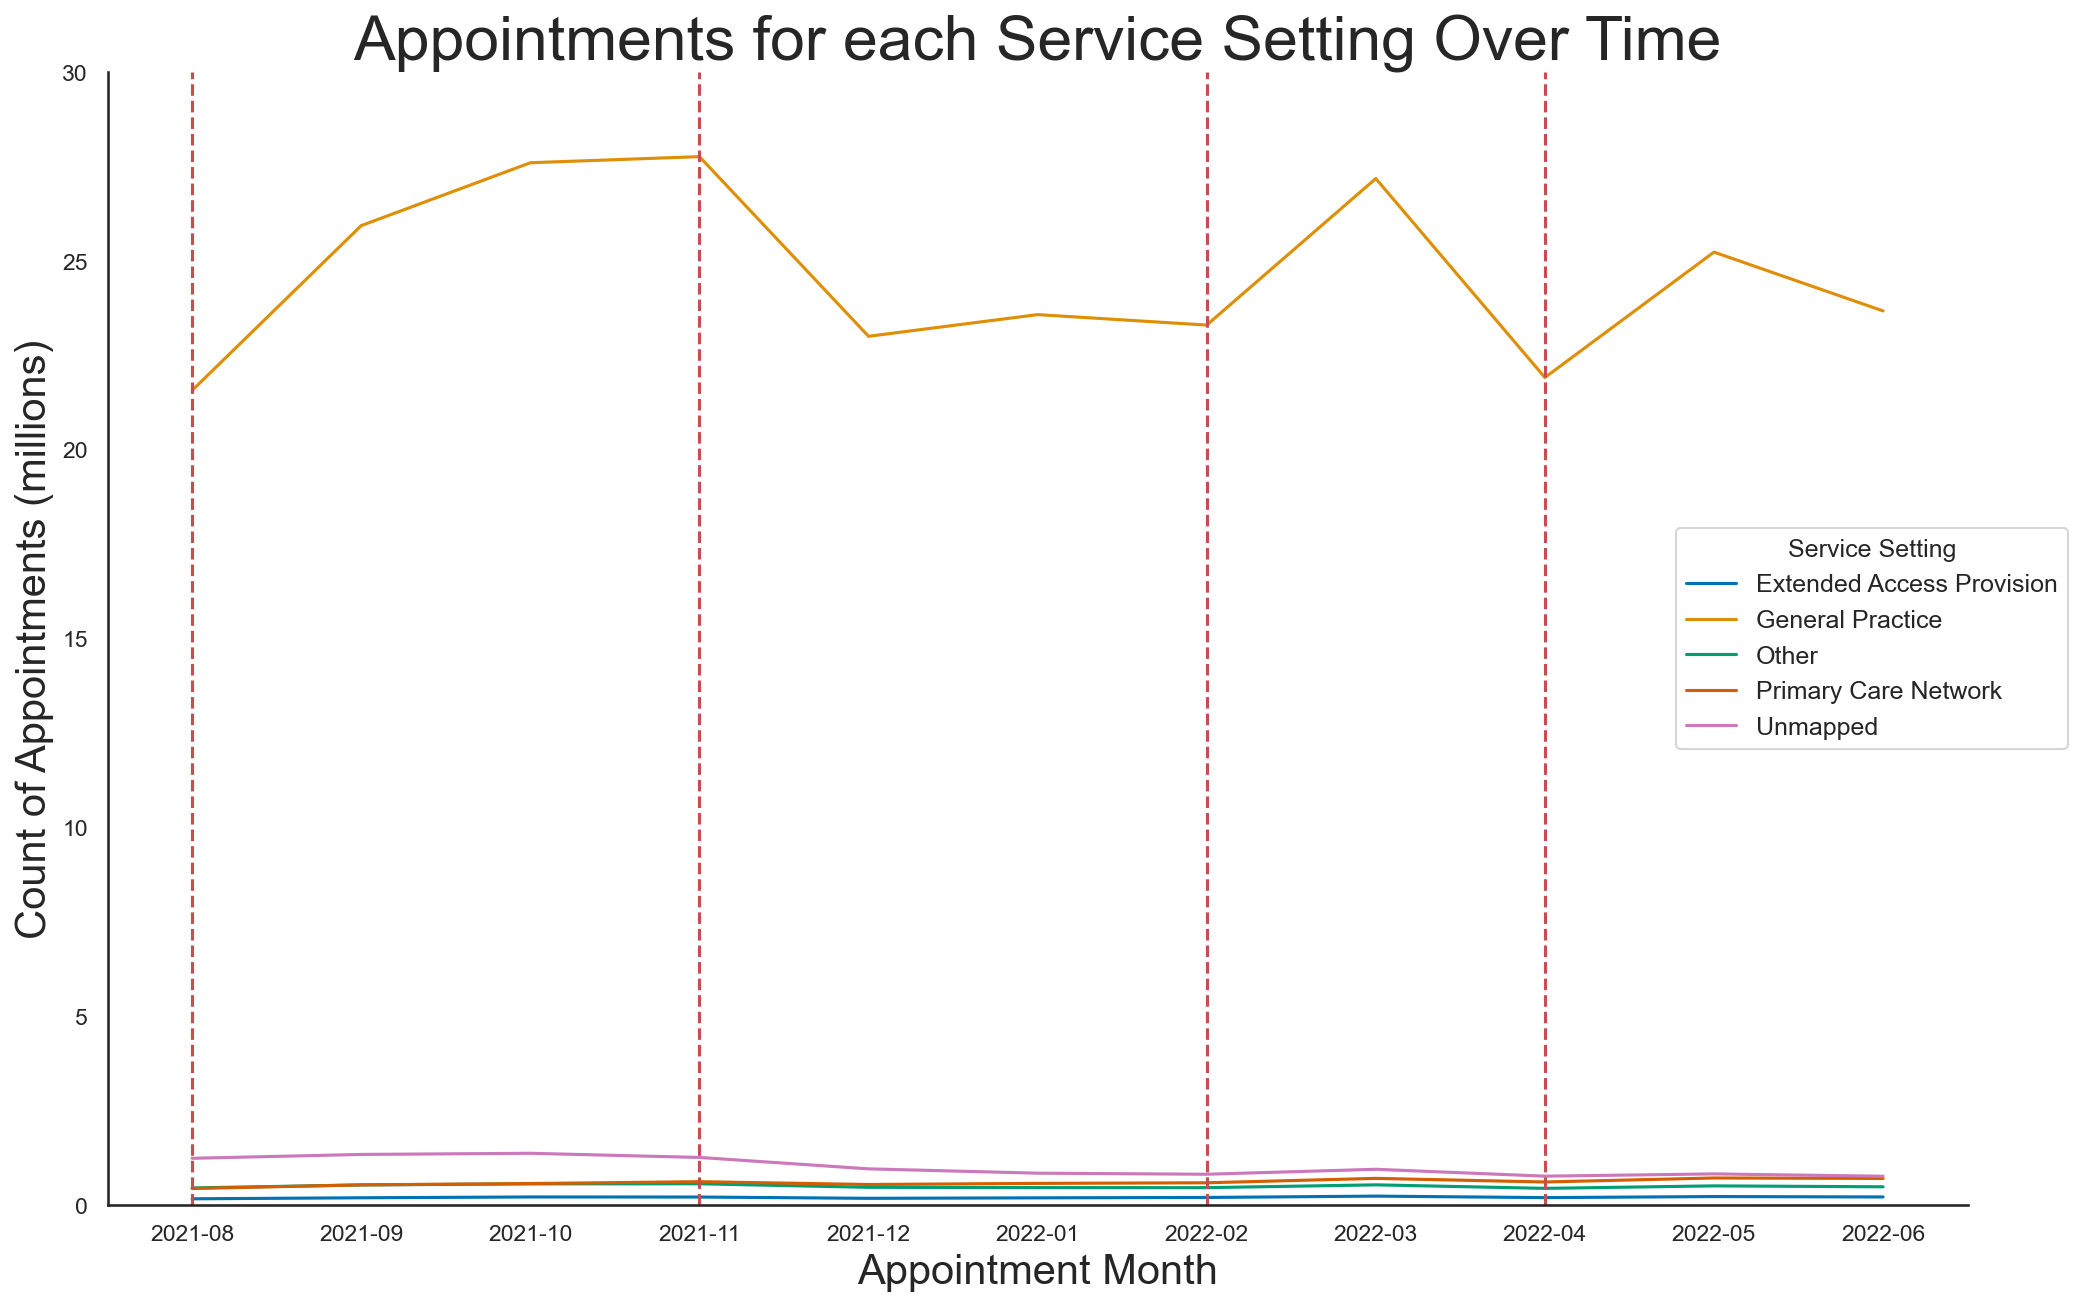

In [121]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Set figure size.
sns.set(rc = {'figure.figsize':(16, 10)})


# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'service_setting', ci = None,
             palette = 'colorblind', data = nc_ss)


# Format figure attributes:

# Set plot style.
sns.set_style('white')

#Set title.
plt.title('Appointments for each Service Setting Over Time', fontsize = 30)

# Set x and y axis headers.
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Count of Appointments (millions)', fontsize = 20)

# Set a higher y-axis limit for clearer understanding of the plot.
ax.set_ylim(0, 30000000)

# Ensure axis ticks are present.
sns.set_style('ticks')

# Create a legend indicating the different Service Settings.
plt.legend(title = 'Service Setting', fontsize = 12,
           bbox_to_anchor = (1, .5), loc = 'center right', borderaxespad = -4)

# Add annotation lines at significant obserrvations.
plt.axvline(x = '2021-08', color = 'r', linestyle = '--')
plt.axvline(x = '2021-11', color = 'r', linestyle = '--')
plt.axvline(x = '2022-02', color = 'r', linestyle = '--')
plt.axvline(x = '2022-04', color = 'r', linestyle = '--')

# Define the scale of the y-axis for clarity.
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x / scale_y))
ax.yaxis.set_major_formatter(ticks_y)

# Despine the plot.
sns.despine()


# View the plot.
plt.show()

# Save the plot.
fig.savefig('Appointments for each Service Setting Over Time.jpg')

We can clearly see spikes in appointments for each **Service Setting**, particularly **General Practice**, in the run-up to Chrismtas 2021 and in **March 2022** (as marked by the vertical dash annotation lines).

This is consistent with the previous finding that **March 2022** had the highest number of records out of every month.

There are also dips in appointments during **December 2021** up until **Febuary 2022**, and in **April 2022**.

As the **general practice** service setting shows to have a significantly higher number of appointments compared to the rest of the service settings, I chose to view it in isolation and the others together so as to see a clearer picture of how each changed over time.

#### General Practice Alone

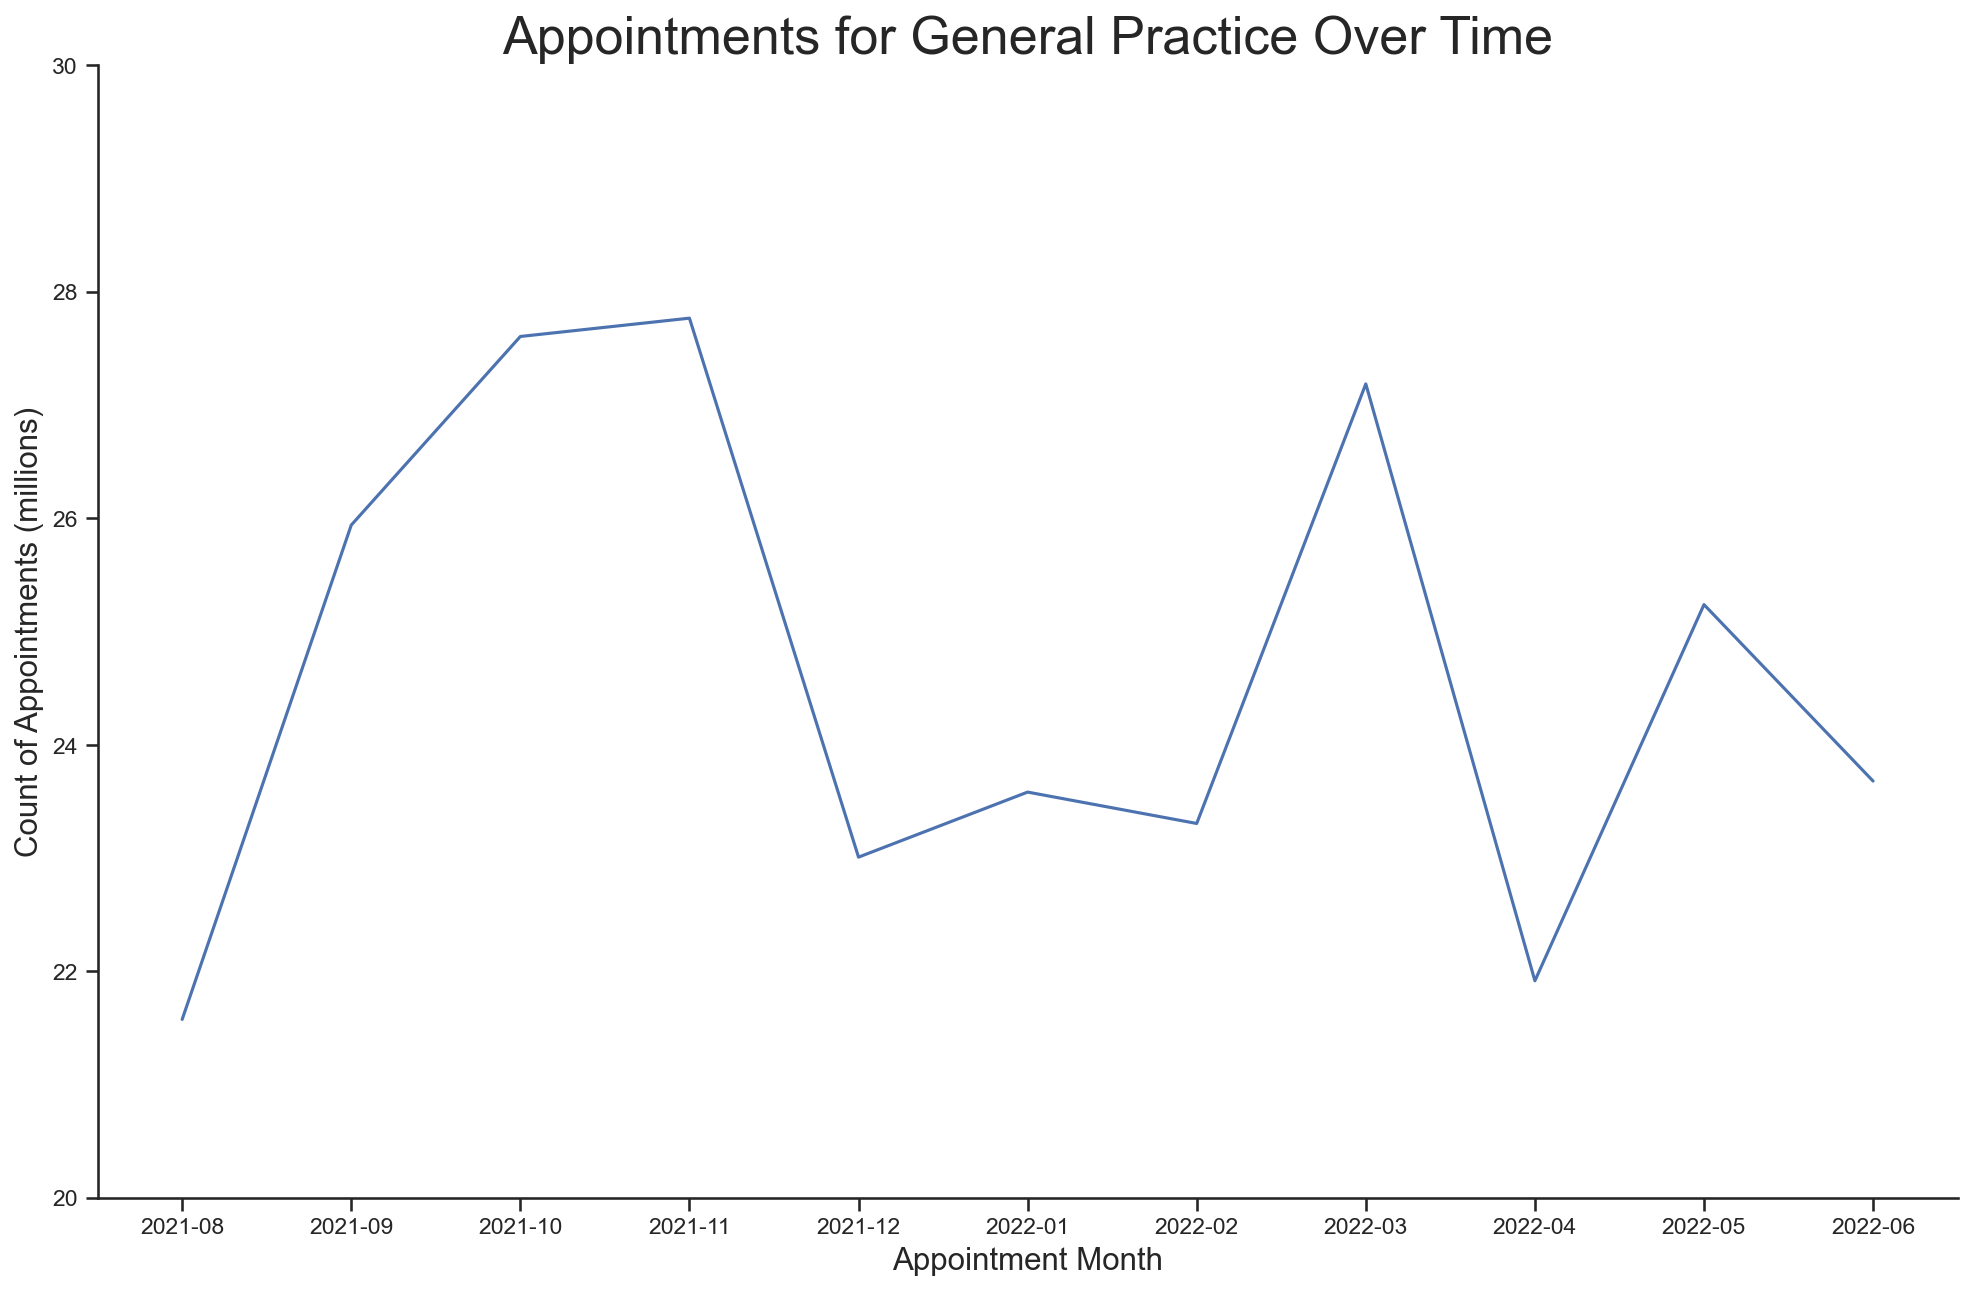

In [64]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             ci = None, palette = 'colorblind',
             data = nc_ss[nc_ss['service_setting'] == 'General Practice'])

# Format figure attributes.
plt.title('Appointments for General Practice Over Time', fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
ax.set_ylim(20000000, 30000000)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# View the plot.
plt.show()

# Save the plot.
fig.savefig('Appointments for General Practice Over Time.png')

#### Other Service Settings

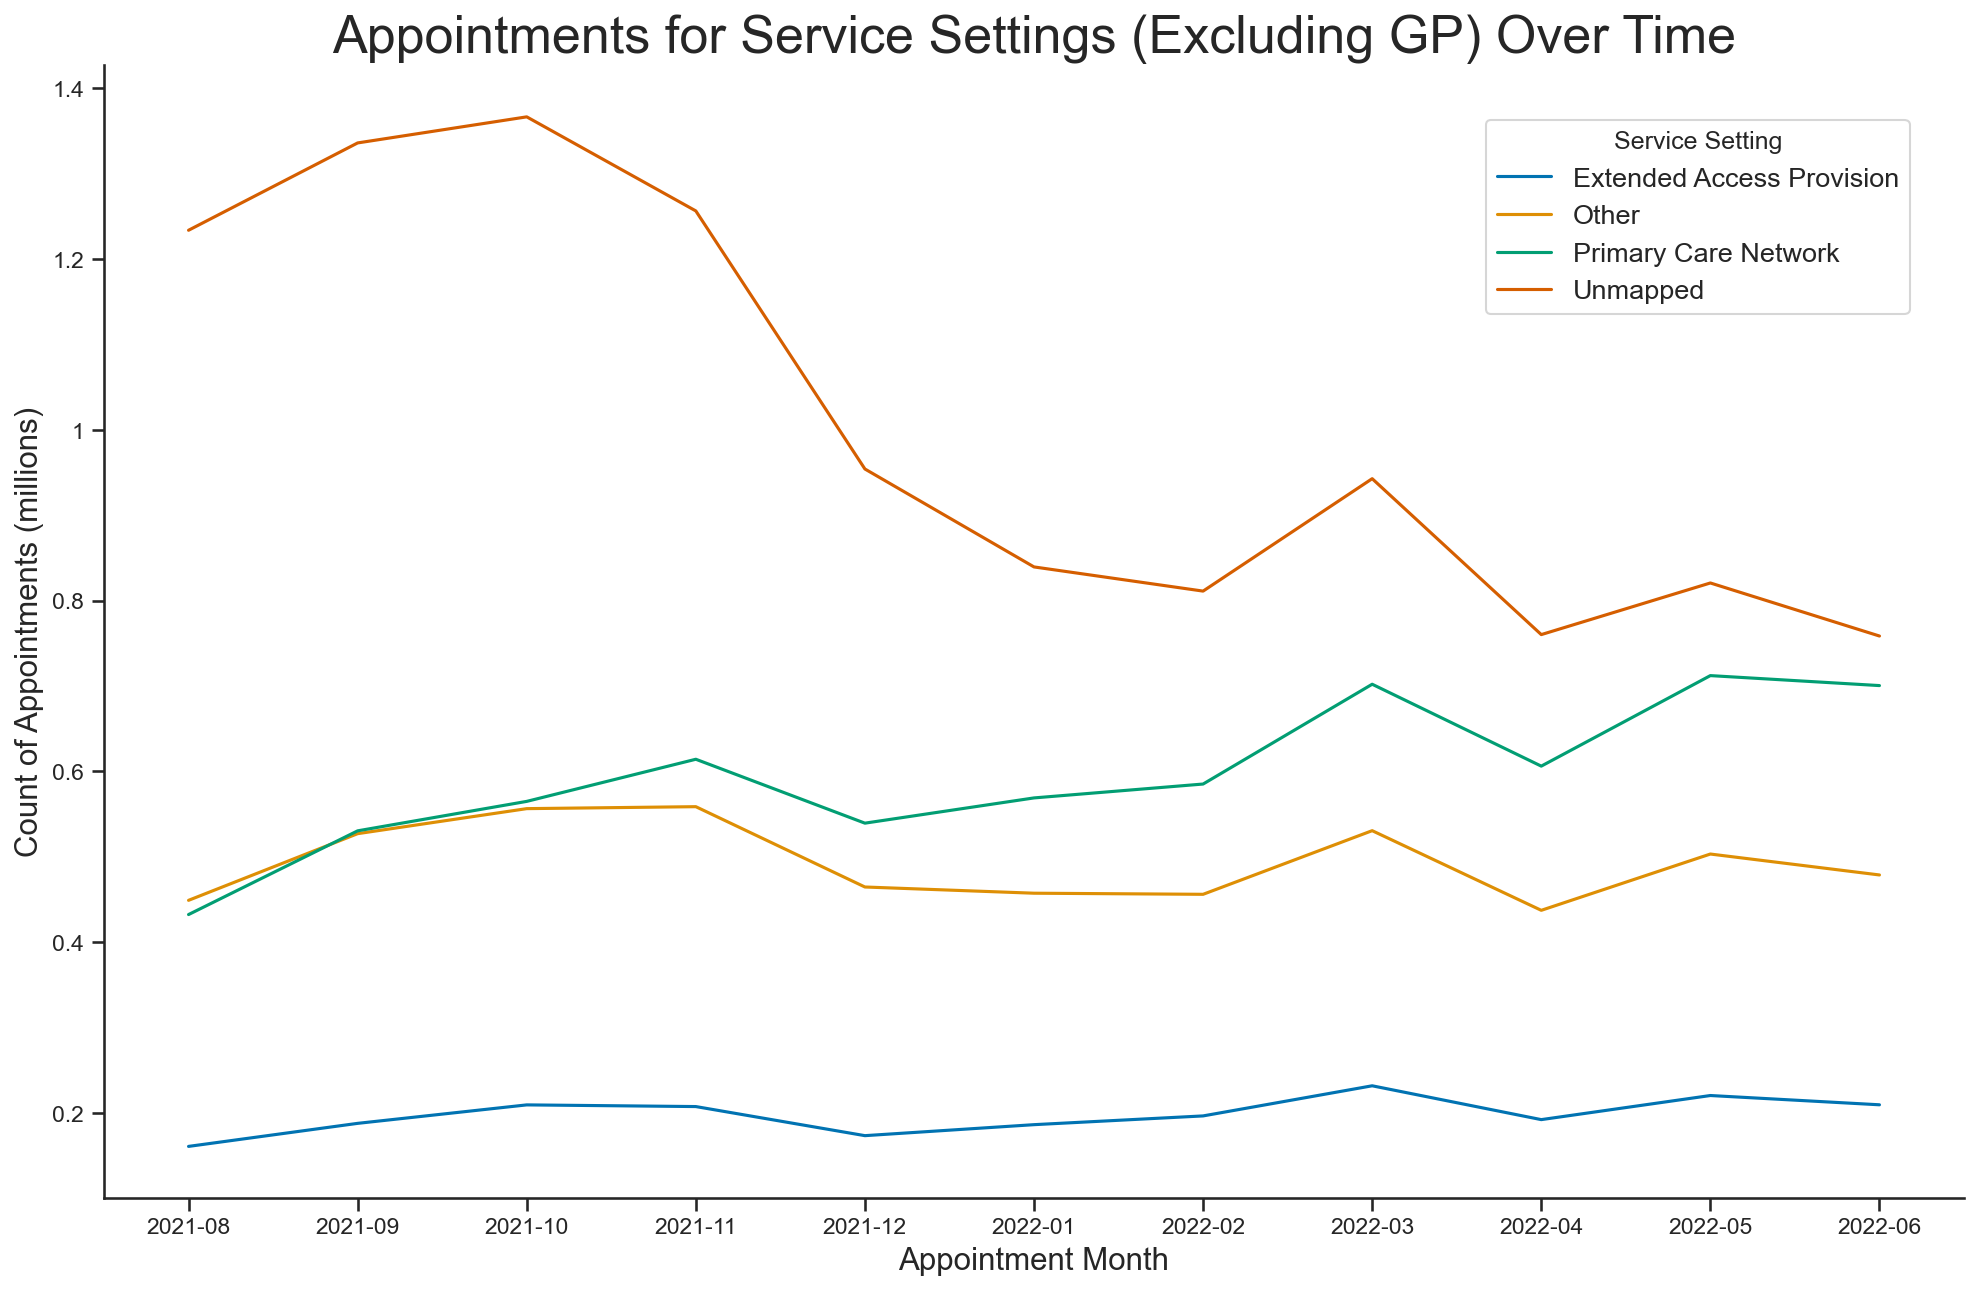

In [65]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'service_setting', ci = None, palette = 'colorblind',
             data = nc_ss[nc_ss['service_setting'].isin(['Extended Access Provision',
                                                         'Primary Care Network',
                                                         'Other',
                                                         'Unmapped'])])

# Format figure attributes.
plt.title('Appointments for Service Settings (Excluding GP) Over Time', fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
plt.legend(title = 'Service Setting', fontsize = 13,
           bbox_to_anchor = (1, 1),
           loc = 'upper right', borderaxespad = 2)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('Appointments for each Service Setting (Excluding GP) Over Time.jpg')

On closer inspection, we can see that the rise in number of appointments for service settings other than **general practice** are, in relative terms, also significant increases.

While it is useful to view these variables over time, it would also be beneficial to get a sense of the spread of appointments across each **Service Setting** (excluding **GP**).

In [66]:
# # Create a new DataFrame excluding General Practice.
nc_ss_2 = nc_ss[-(nc_ss['service_setting'] == 'General Practice')]

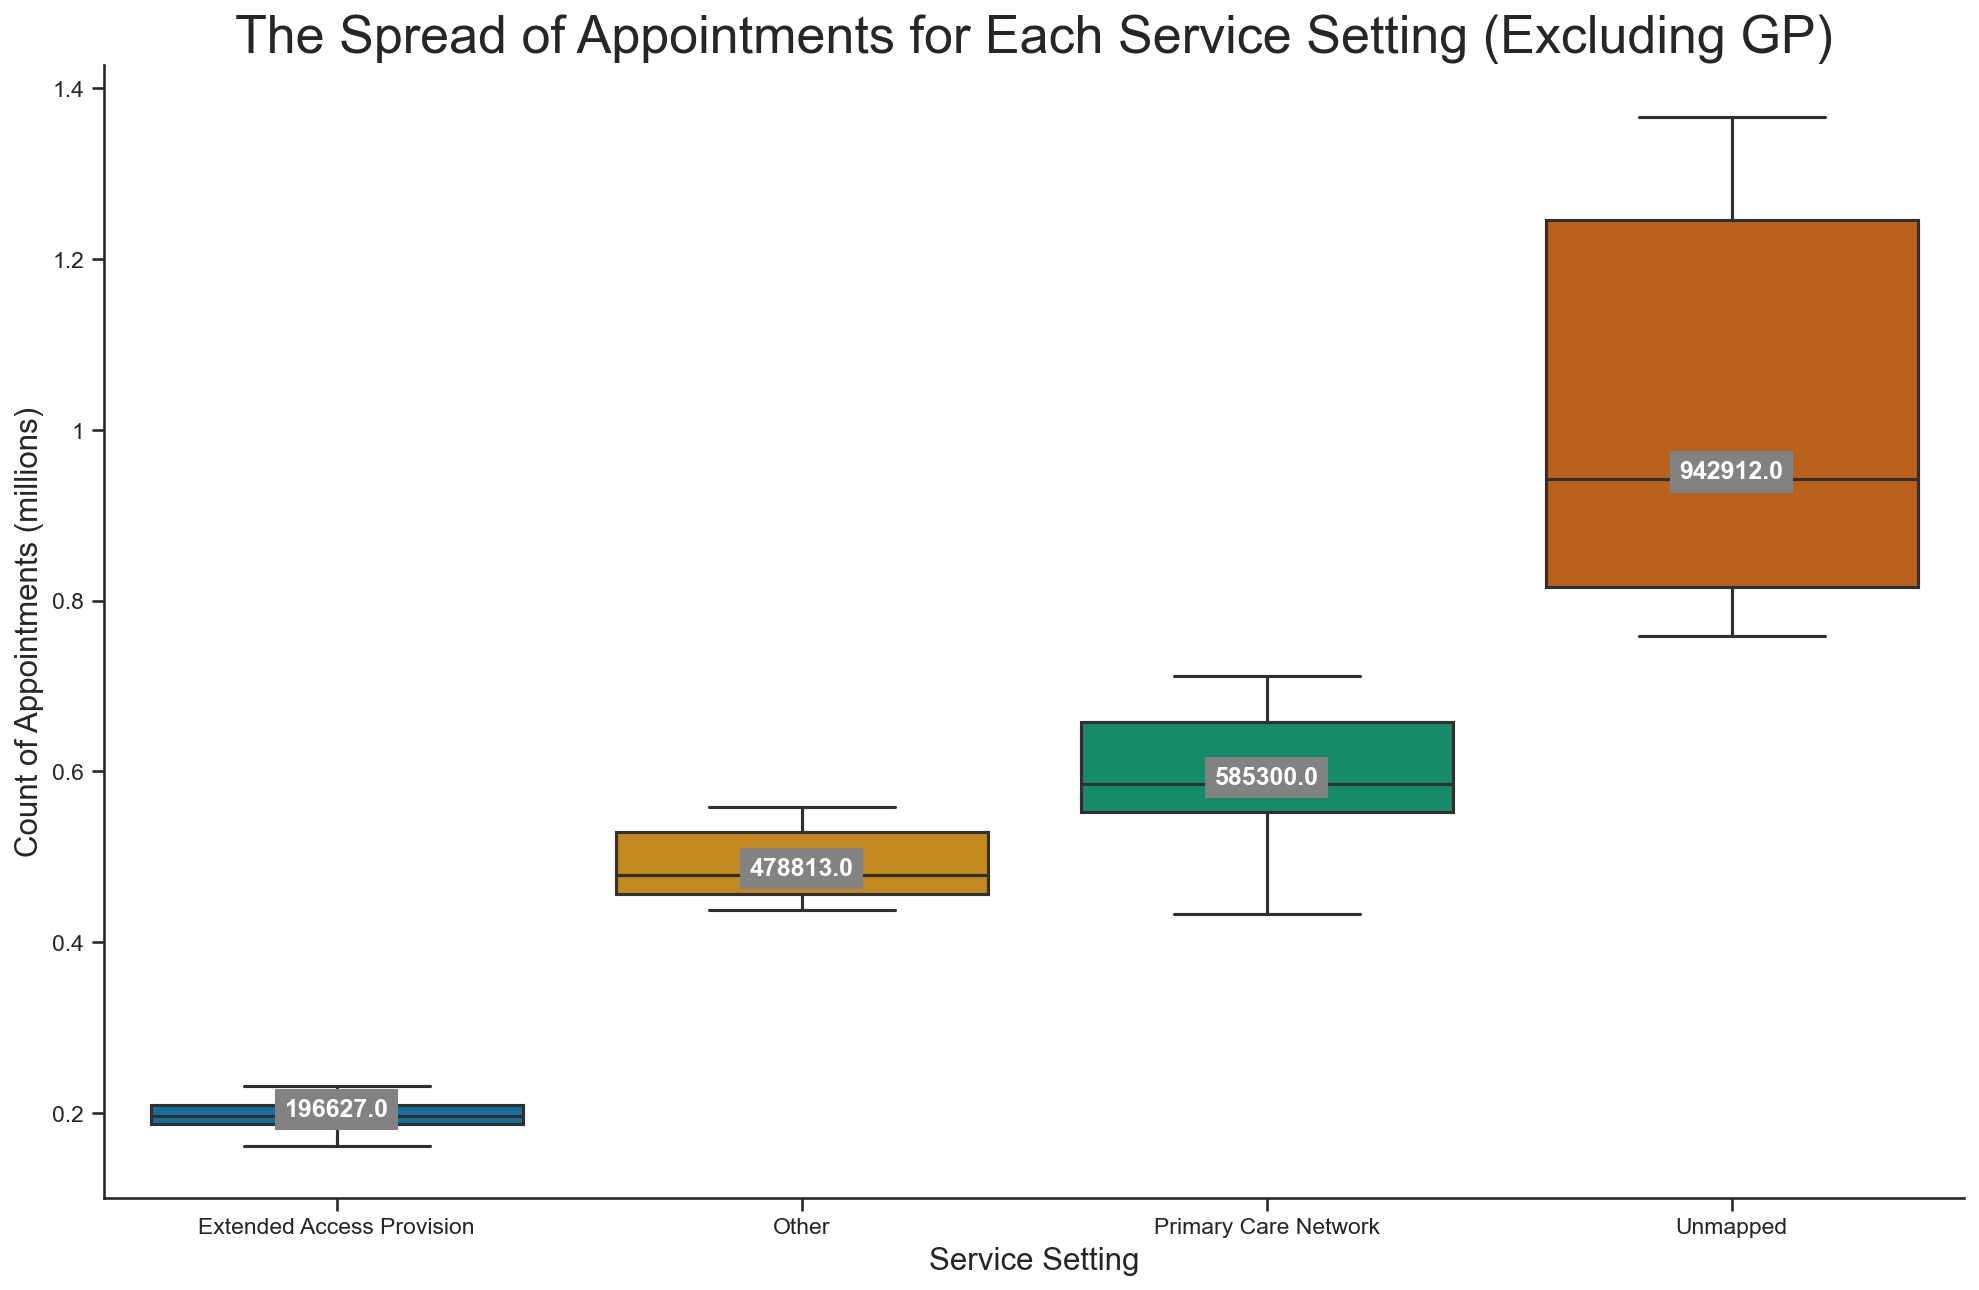

In [67]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

box_plot = sns.boxplot(x = 'service_setting', y = 'count_of_appointments',
                       palette = 'colorblind', data = nc_ss_2)

# Format figure attributes.
plt.title('The Spread of Appointments for Each Service Setting (Excluding GP)',
          fontsize = 25)
plt.xlabel('Service Setting', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Create a Series of the median appointments for each Service Setting.
medians = nc_ss_2.groupby('service_setting')['count_of_appointments'].median()

# Annotate the boxplot with the median values.
for i in range(len(medians)):
    box_plot.annotate(str(medians[i]), xy = (i, medians[i]),
                      horizontalalignment = 'center', color = 'white',
                      fontweight = 'semibold', size = 12,
                      bbox = dict(facecolor = '#828280', edgecolor = '#828282'))

# Save the plot.
fig.savefig('The Spread of Each Service Settings (Excluding GP).jpg')

The **Unmapped** category contains more records than the others.
   - It would be useful to try to understand why this is the case as the true mapping of these data points may change the distribution significantly.
        - Could it be due to poor data collection?
        - Was data collection only poor during the months recorded in these datasets?
            - Perhaps analysing data from preceding and succeeding months could answer this question.

### <div align = "center"> Context Types (nc_ct)

In [68]:
# Aggregate on monthly level and determine the sum of records per month.
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments']\
        .agg('sum').reset_index()

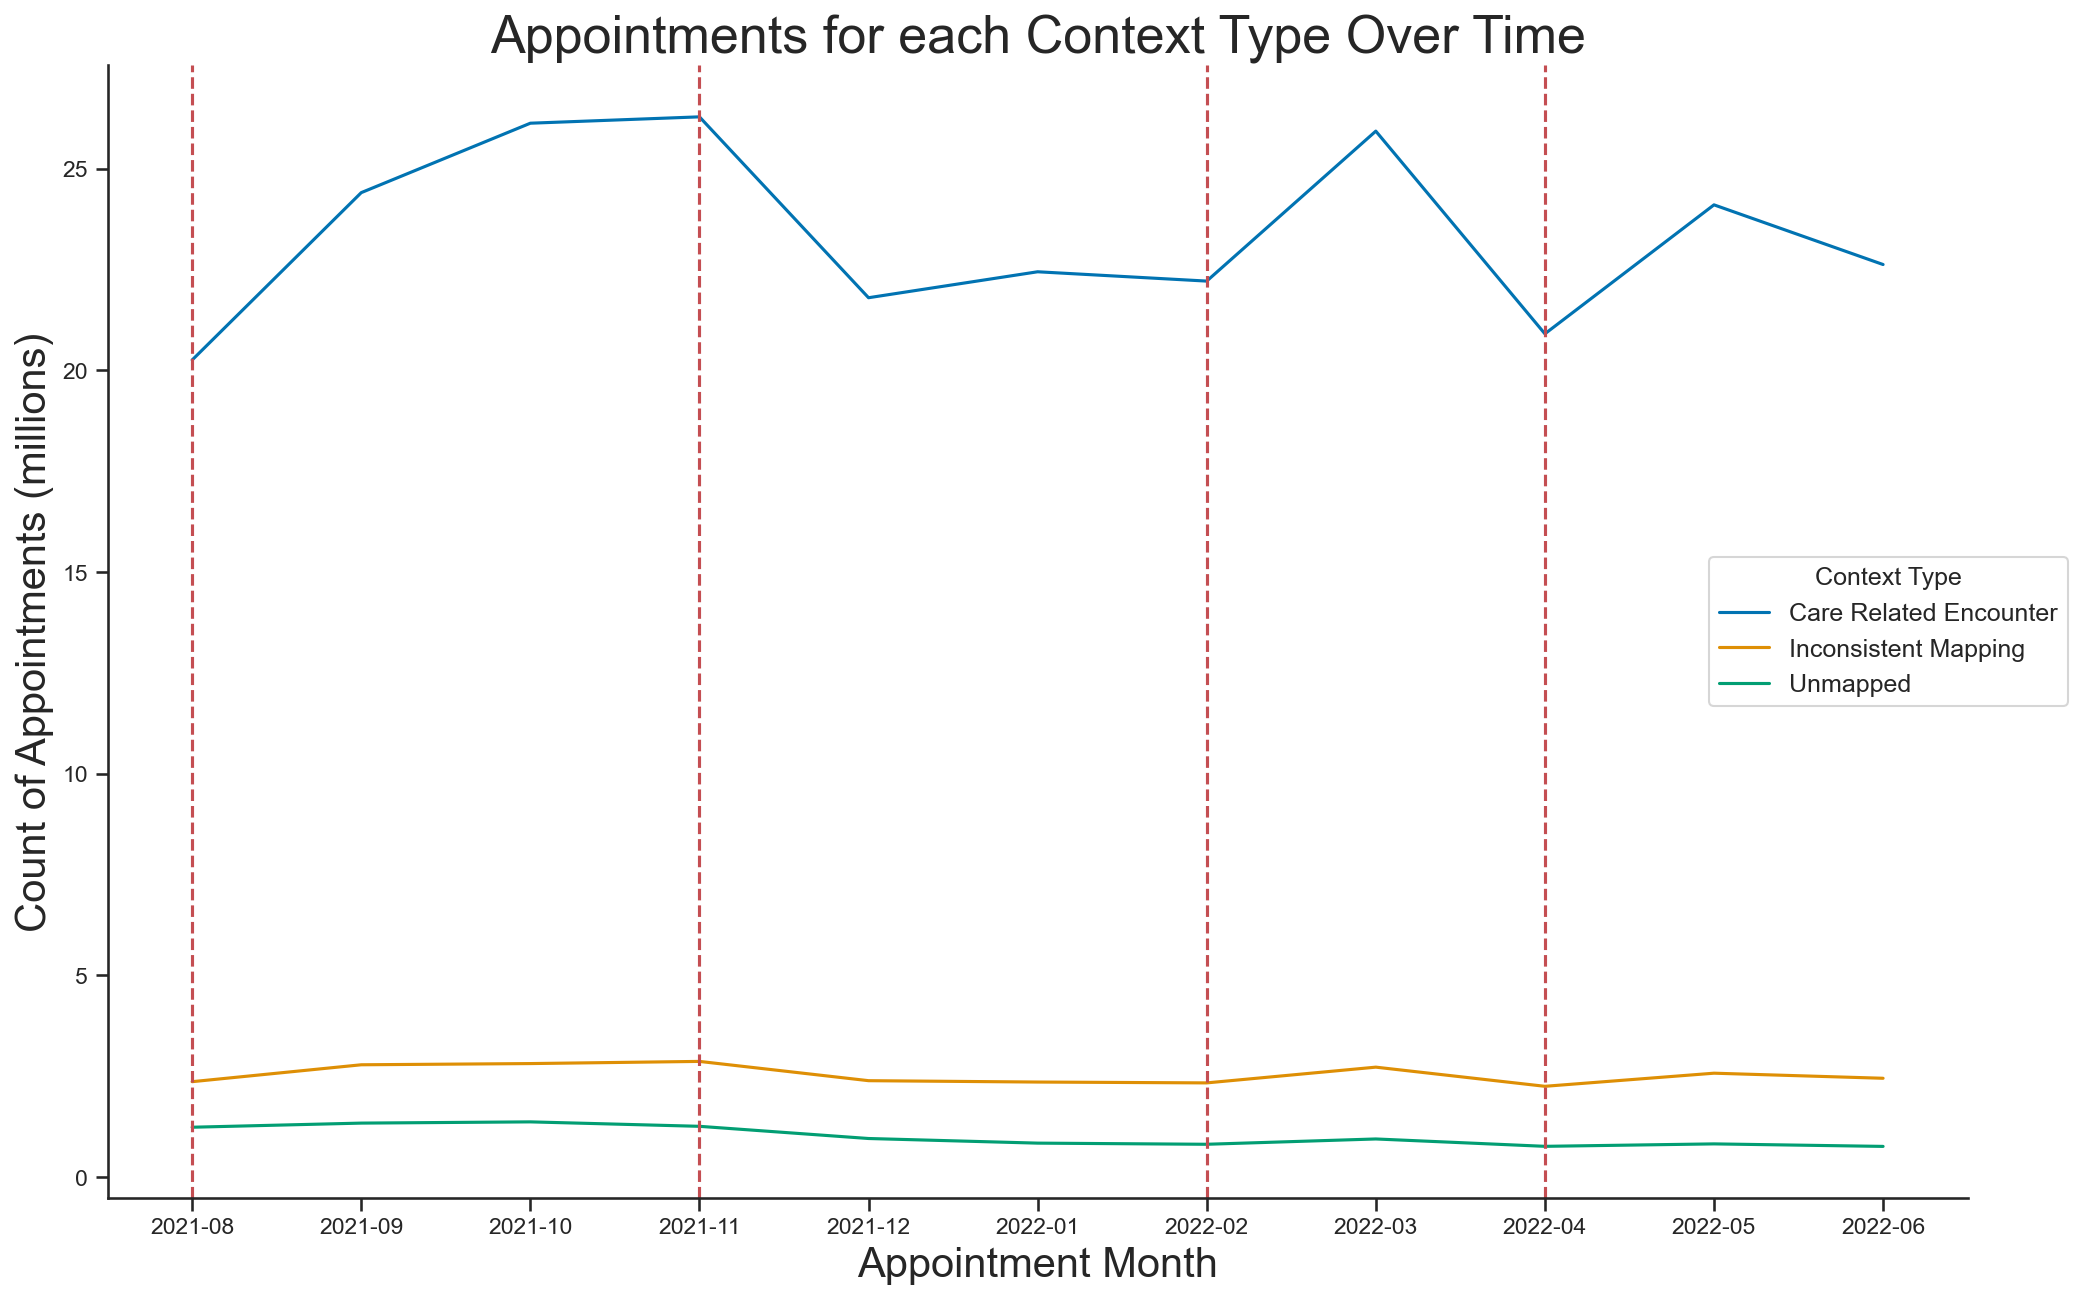

In [69]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'context_type', ci = None, palette = 'colorblind',
             data = nc_ct)

# Format figure attributes.
plt.title('Appointments for each Context Type Over Time', fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Count of Appointments (millions)', fontsize = 20)
plt.legend(title = 'Context Type', fontsize = 12,
           bbox_to_anchor = (1, .5), loc = 'center right',
           borderaxespad = -4)
plt.axvline(x = '2021-08', color = 'r', linestyle = '--')
plt.axvline(x = '2021-11', color = 'r', linestyle = '--')
plt.axvline(x = '2022-02', color = 'r', linestyle = '--')
plt.axvline(x = '2022-04', color = 'r', linestyle = '--')
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('Appointments for each Context Type Over Time.jpg')

We can clearly see spikes in appointments for the **Care Related Encounter** context type in the run-up to Chrismtas 2021 and in **March 2022**.

This is a similar trend to that of the service settings.

### <div align = "center"> National Categories (nc_nc)

In [70]:
# Aggregate on monthly level and determine the sum of records per month.
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments']\
        .agg('sum').reset_index()

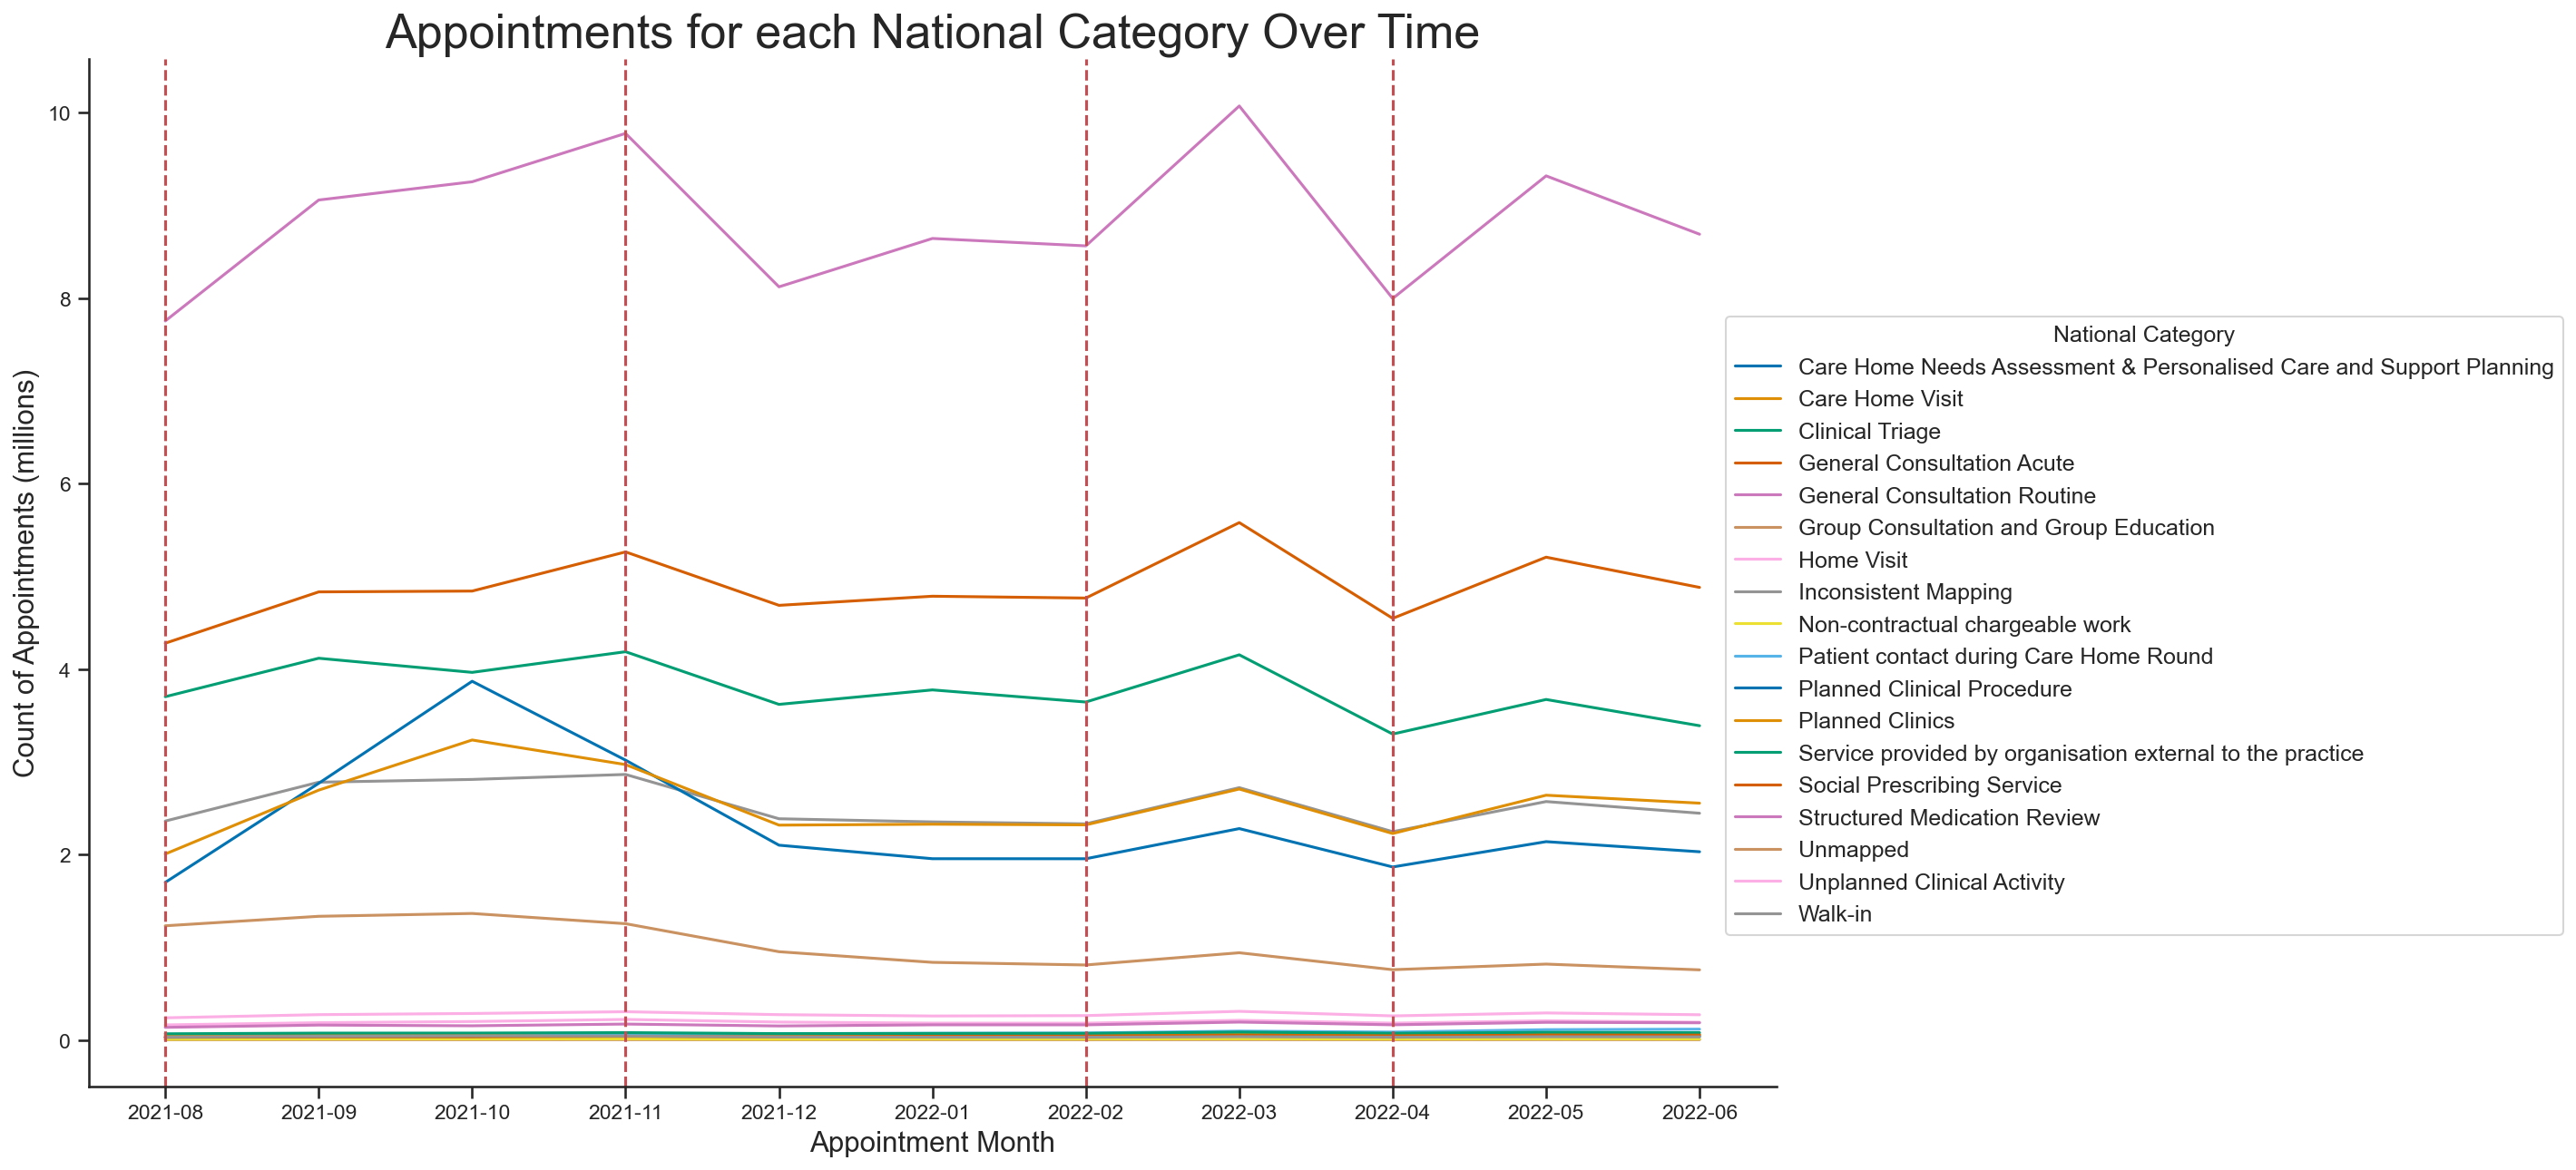

In [71]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'national_category', ci = None,
             palette = 'colorblind', data = nc_nc)

# Format figure attributes.
plt.title('Appointments for each National Category Over Time', fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
plt.legend(title = 'National Category', fontsize = 12,
           bbox_to_anchor = (.97, .75), loc = 'upper left', borderaxespad = 0)
plt.axvline(x = '2021-08', color = 'r', linestyle = '--')
plt.axvline(x = '2021-11', color = 'r', linestyle = '--')
plt.axvline(x = '2022-02', color = 'r', linestyle = '--')
plt.axvline(x = '2022-04', color = 'r', linestyle = '--')
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

While the above plot is informative in a broad sense, it is rather "busy" aesthetically, and so it may be more beneficial from the analytical perspective of looking to see where resources have been most utilised, to filter for the **National Categories** that have higher appointments.

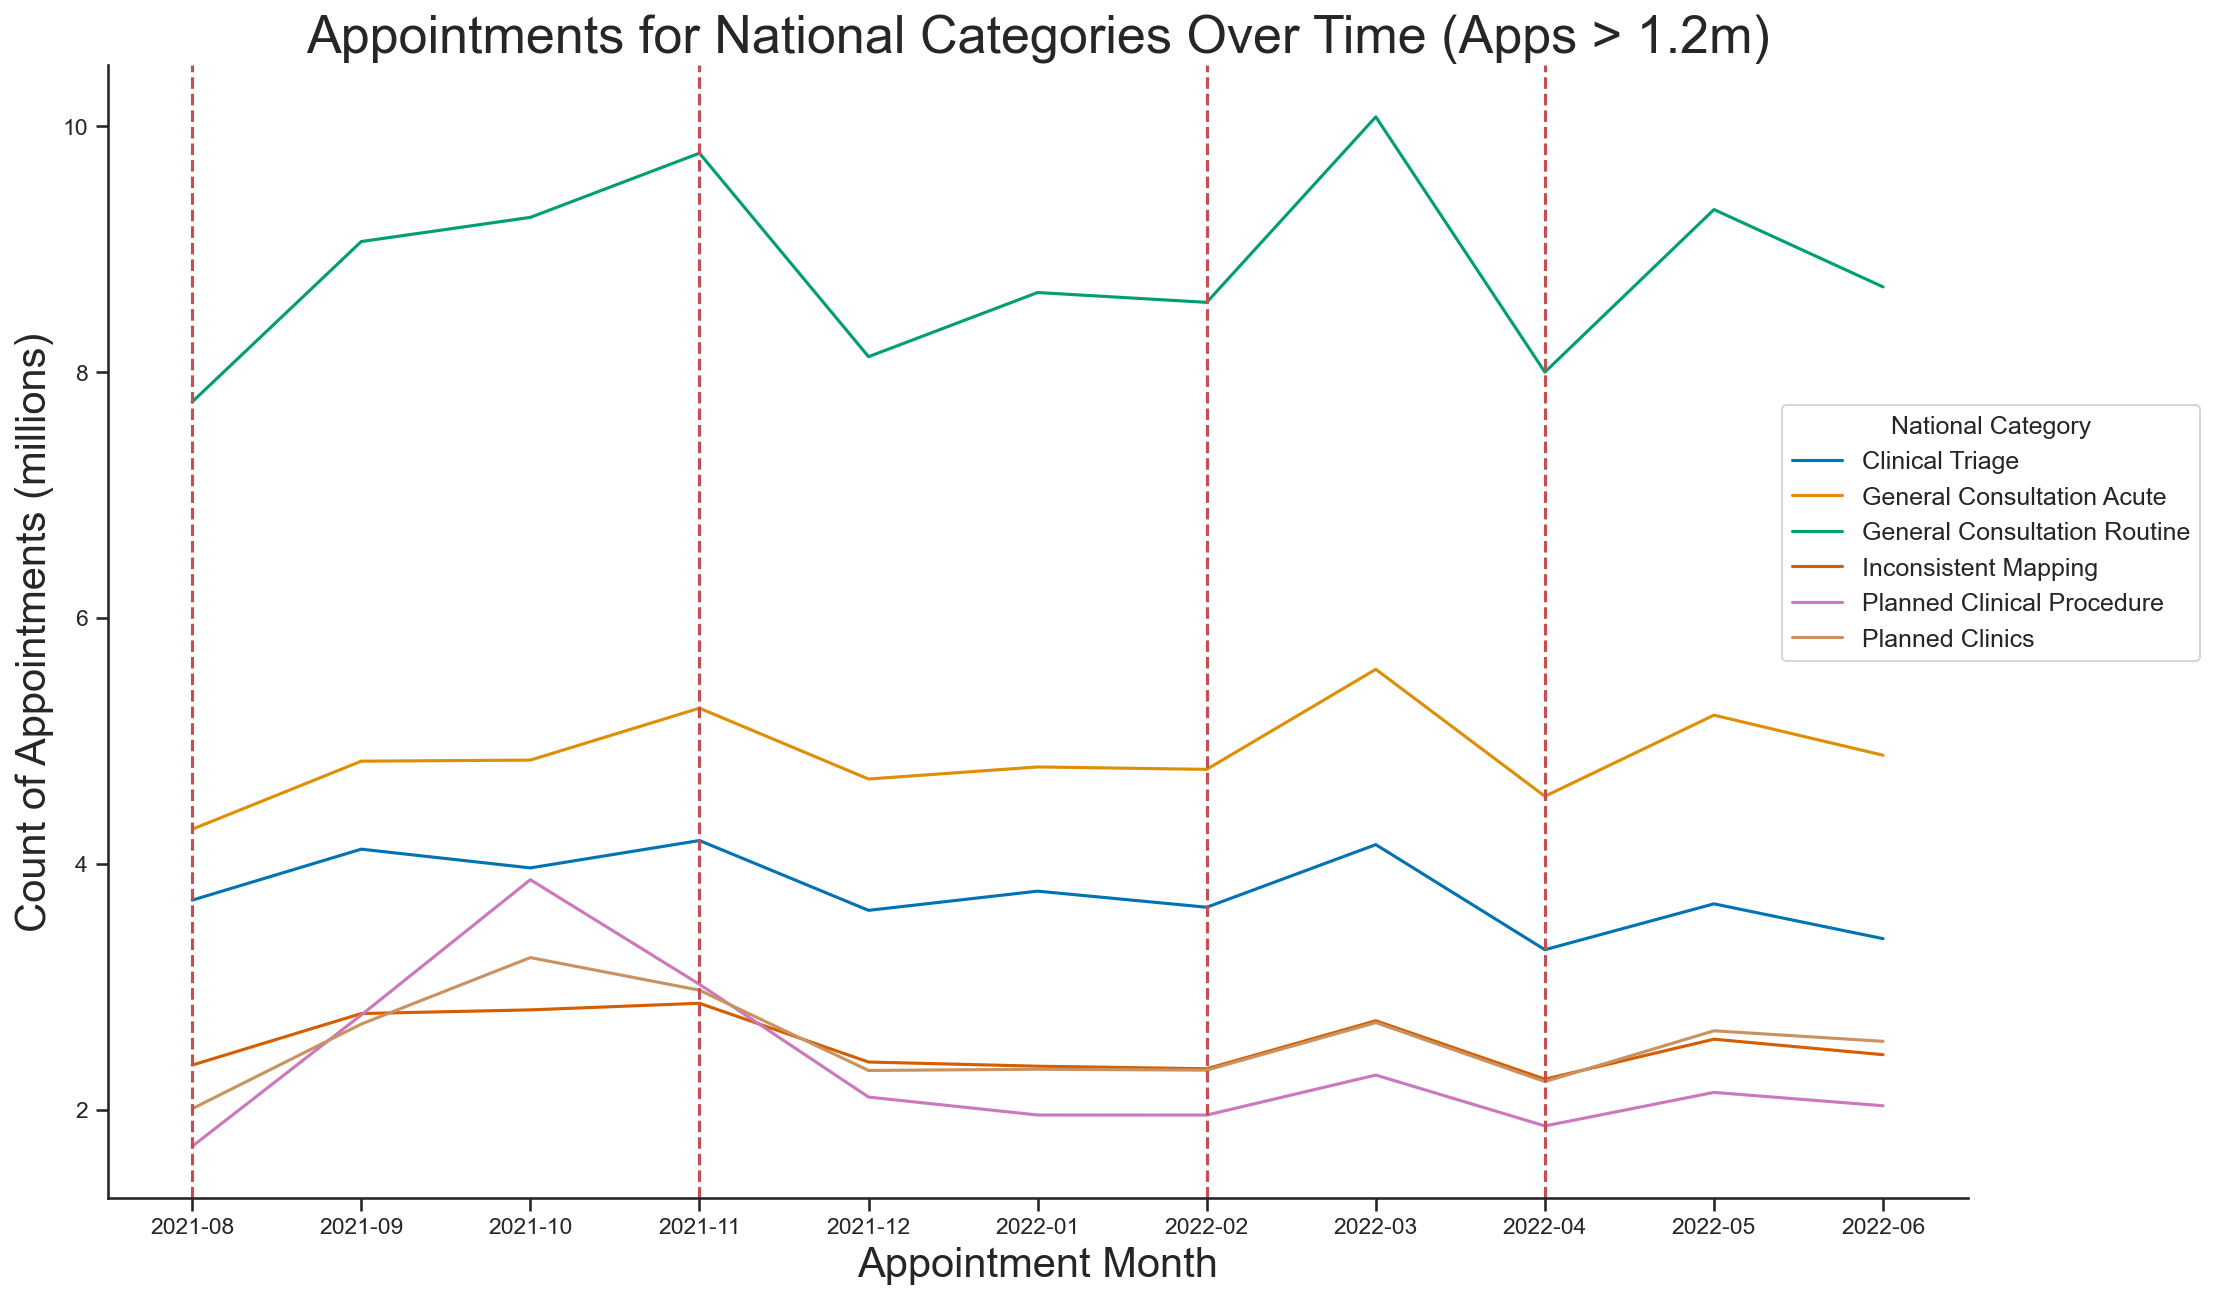

In [72]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'national_category', ci = None,
             palette = 'colorblind',
             data = nc_nc[nc_nc['count_of_appointments'] > 1500000])

# Format figure attributes.
plt.title('Appointments for National Categories Over Time (Apps > 1.2m)',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Count of Appointments (millions)', fontsize = 20)
plt.legend(title = 'National Category', fontsize = 12,
           bbox_to_anchor = (.9, .7), loc = 'upper left', borderaxespad = 0)
plt.axvline(x = '2021-08', color = 'r', linestyle = '--')
plt.axvline(x = '2021-11', color = 'r', linestyle = '--')
plt.axvline(x = '2022-02', color = 'r', linestyle = '--')
plt.axvline(x = '2022-04', color = 'r', linestyle = '--')
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('Appointments for National Categories Over Time (Apps > 1.2m).jpg')

We can clearly see spikes in appointments for each **National Category**, particularly **General Consultation Routine** and **Planned Clinical Procedure** in the run-up to Christmas 2021 and in **March 2022**.

Perhaps the reason for the trend for each of the **service settings**, **context types** and most of the **national categories** having dips in the number of appointments in **December 2021** could be explained by the NHS having restricted availability of appointments due to the Christmas holiday period.

### <div align = "center"> Create four visualisations indicating the number of appointments for service setting per season.
#### <div align = "center"> The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

In [122]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_ss_season = nc.groupby(['appointment_month',
                           'appointment_date',
                           'service_setting'])\
                          ['count_of_appointments'].agg('sum').reset_index()

### Summer 2021

**Using between()**

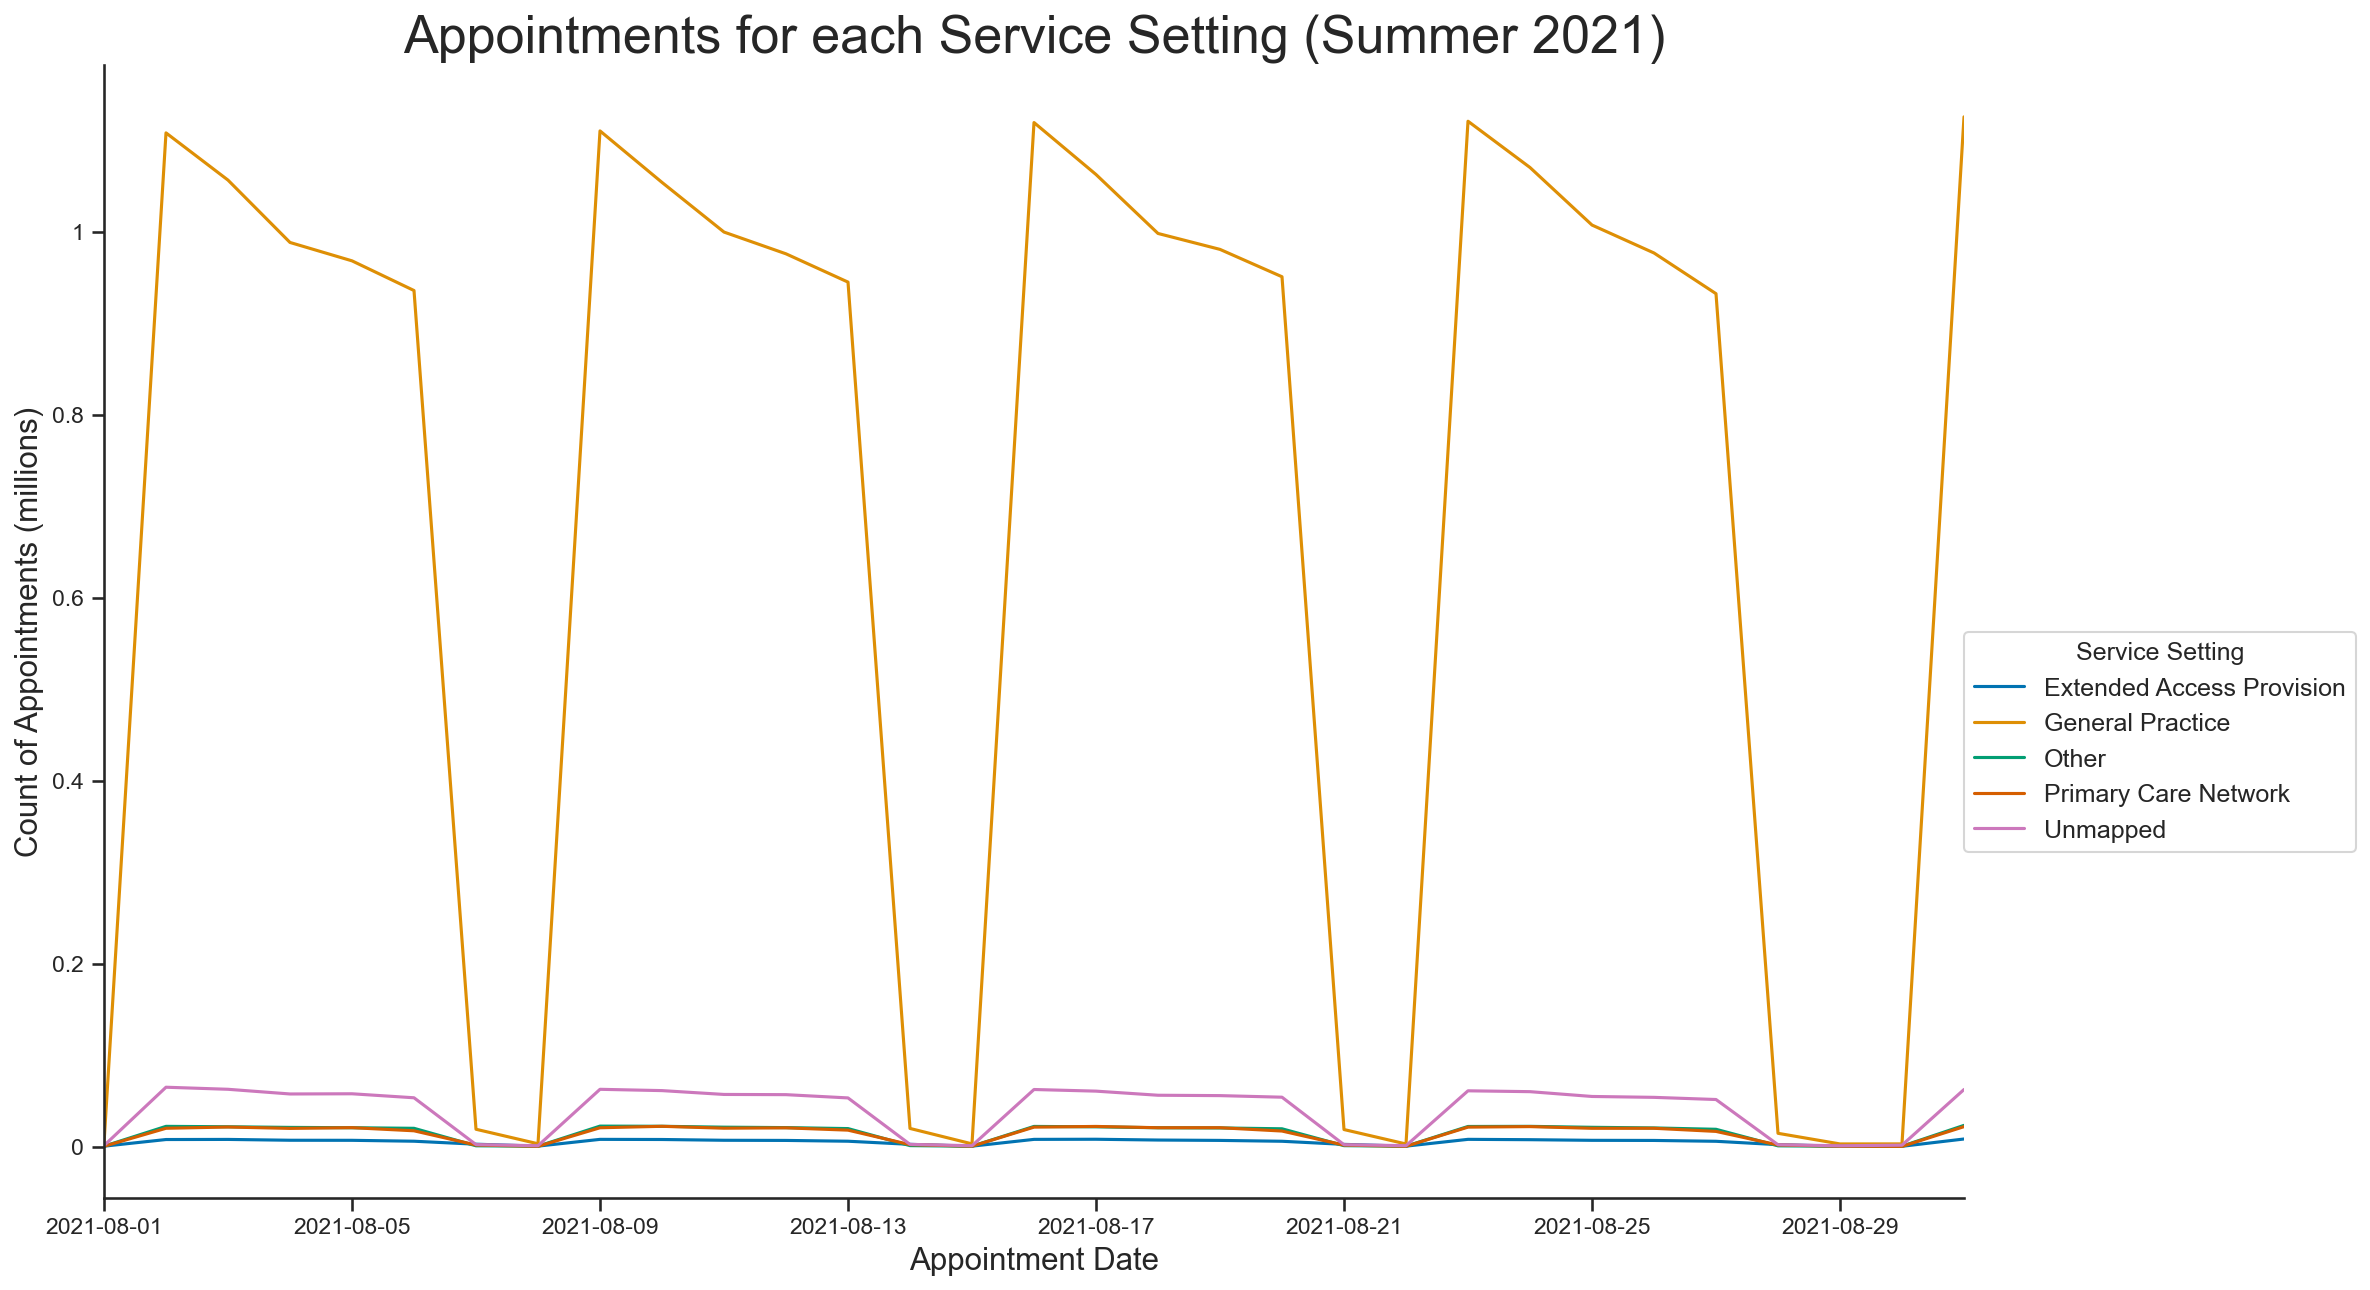

In [74]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot filtering for Summer 2021 (August 2021).
sns.lineplot(x = 'appointment_date', y = 'count_of_appointments',
             hue = 'service_setting', ci = None,
             palette = 'colorblind',
             data = nc_ss_season[nc_ss_season['appointment_date']\
                                 .between('2021-08-01', '2021-08-31')])

# Format figure attributes.
plt.title('Appointments for each Service Setting (Summer 2021)',
          fontsize = 25)
plt.xlabel('Appointment Date', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
plt.legend(title = 'Service Setting', fontsize = 12,
           bbox_to_anchor = (1, .5), loc = 'upper left', borderaxespad = 0)
ax.set_xlim(['2021-08-01'], ['2021-08-31'])
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

The dips (gaps) in appointments are weekends (Sundays have no records).

The spikes in appointments are Mondays (particularly high for the **GP** service setting).

Appointments are booked mainly for earlier in each week and are consistent throughout the month.

### Autumn 2021

**Using isin()**

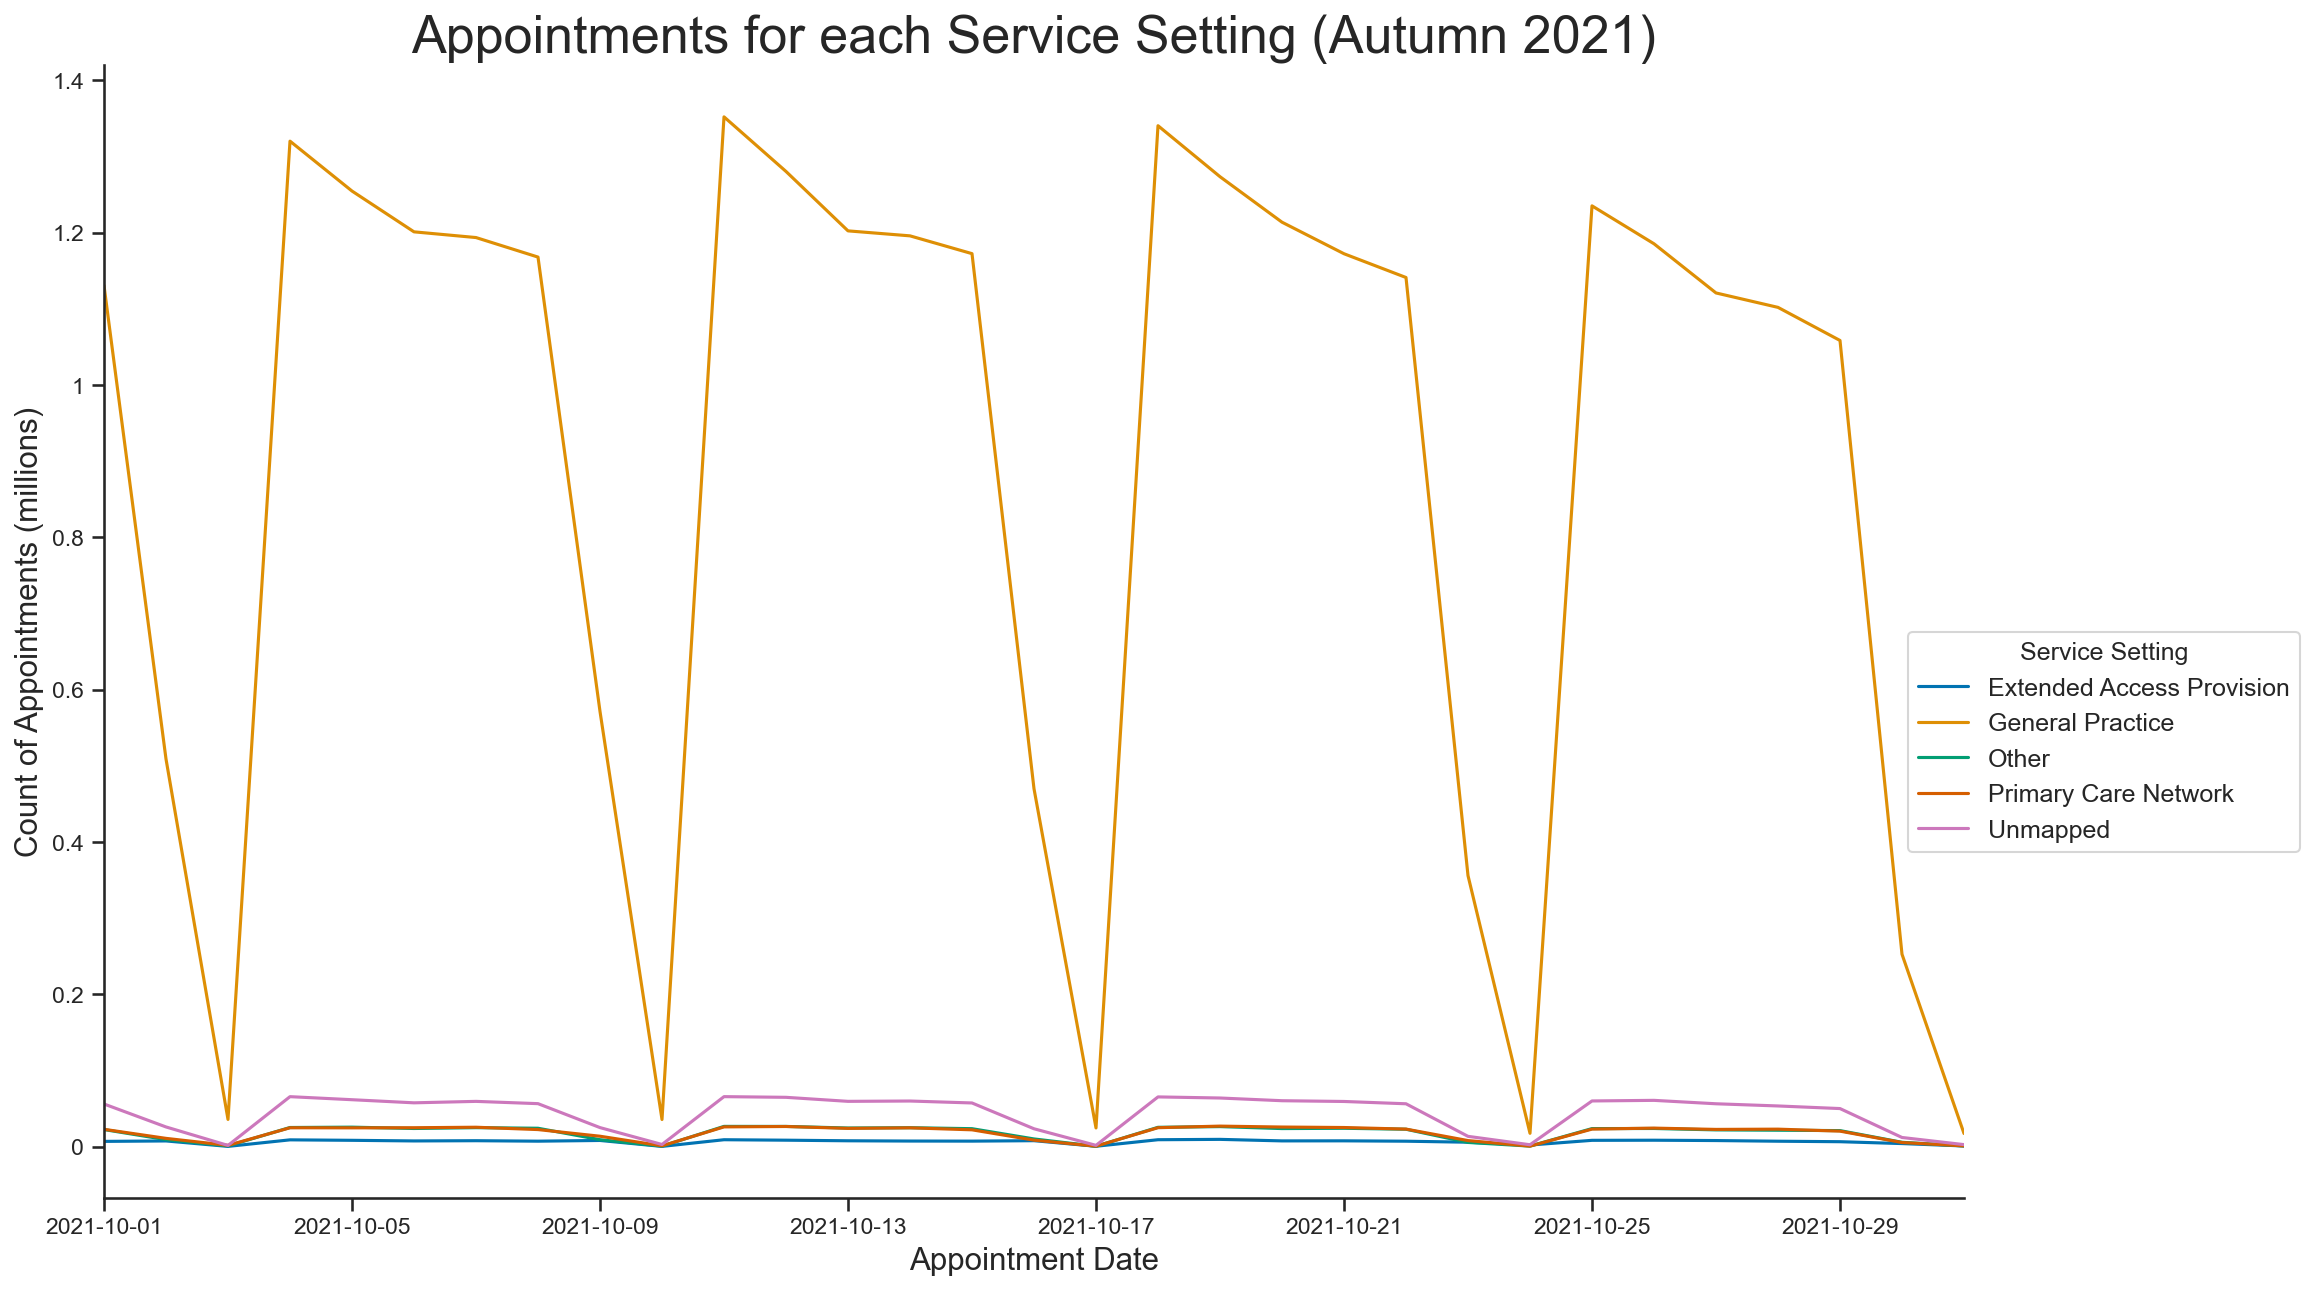

In [75]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot filtering for Autumn 2021 (October 2021).
sns.lineplot(x = 'appointment_date', y = 'count_of_appointments',
             hue = 'service_setting', ci = None, palette = 'colorblind',
             data = nc_ss_season[nc_ss_season['appointment_month']\
                                 .isin(['2021-10'])])

# Format figure attributes.
plt.title('Appointments for each Service Setting (Autumn 2021)',
          fontsize = 25)
plt.xlabel('Appointment Date', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
plt.legend(title = 'Service Setting', fontsize = 12,
           bbox_to_anchor = (.97, .5), loc = 'upper left',
           borderaxespad = 0)
ax.set_xlim(['2021-10-01'], ['2021-10-31'])
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

### Winter 2021

**Using ==**

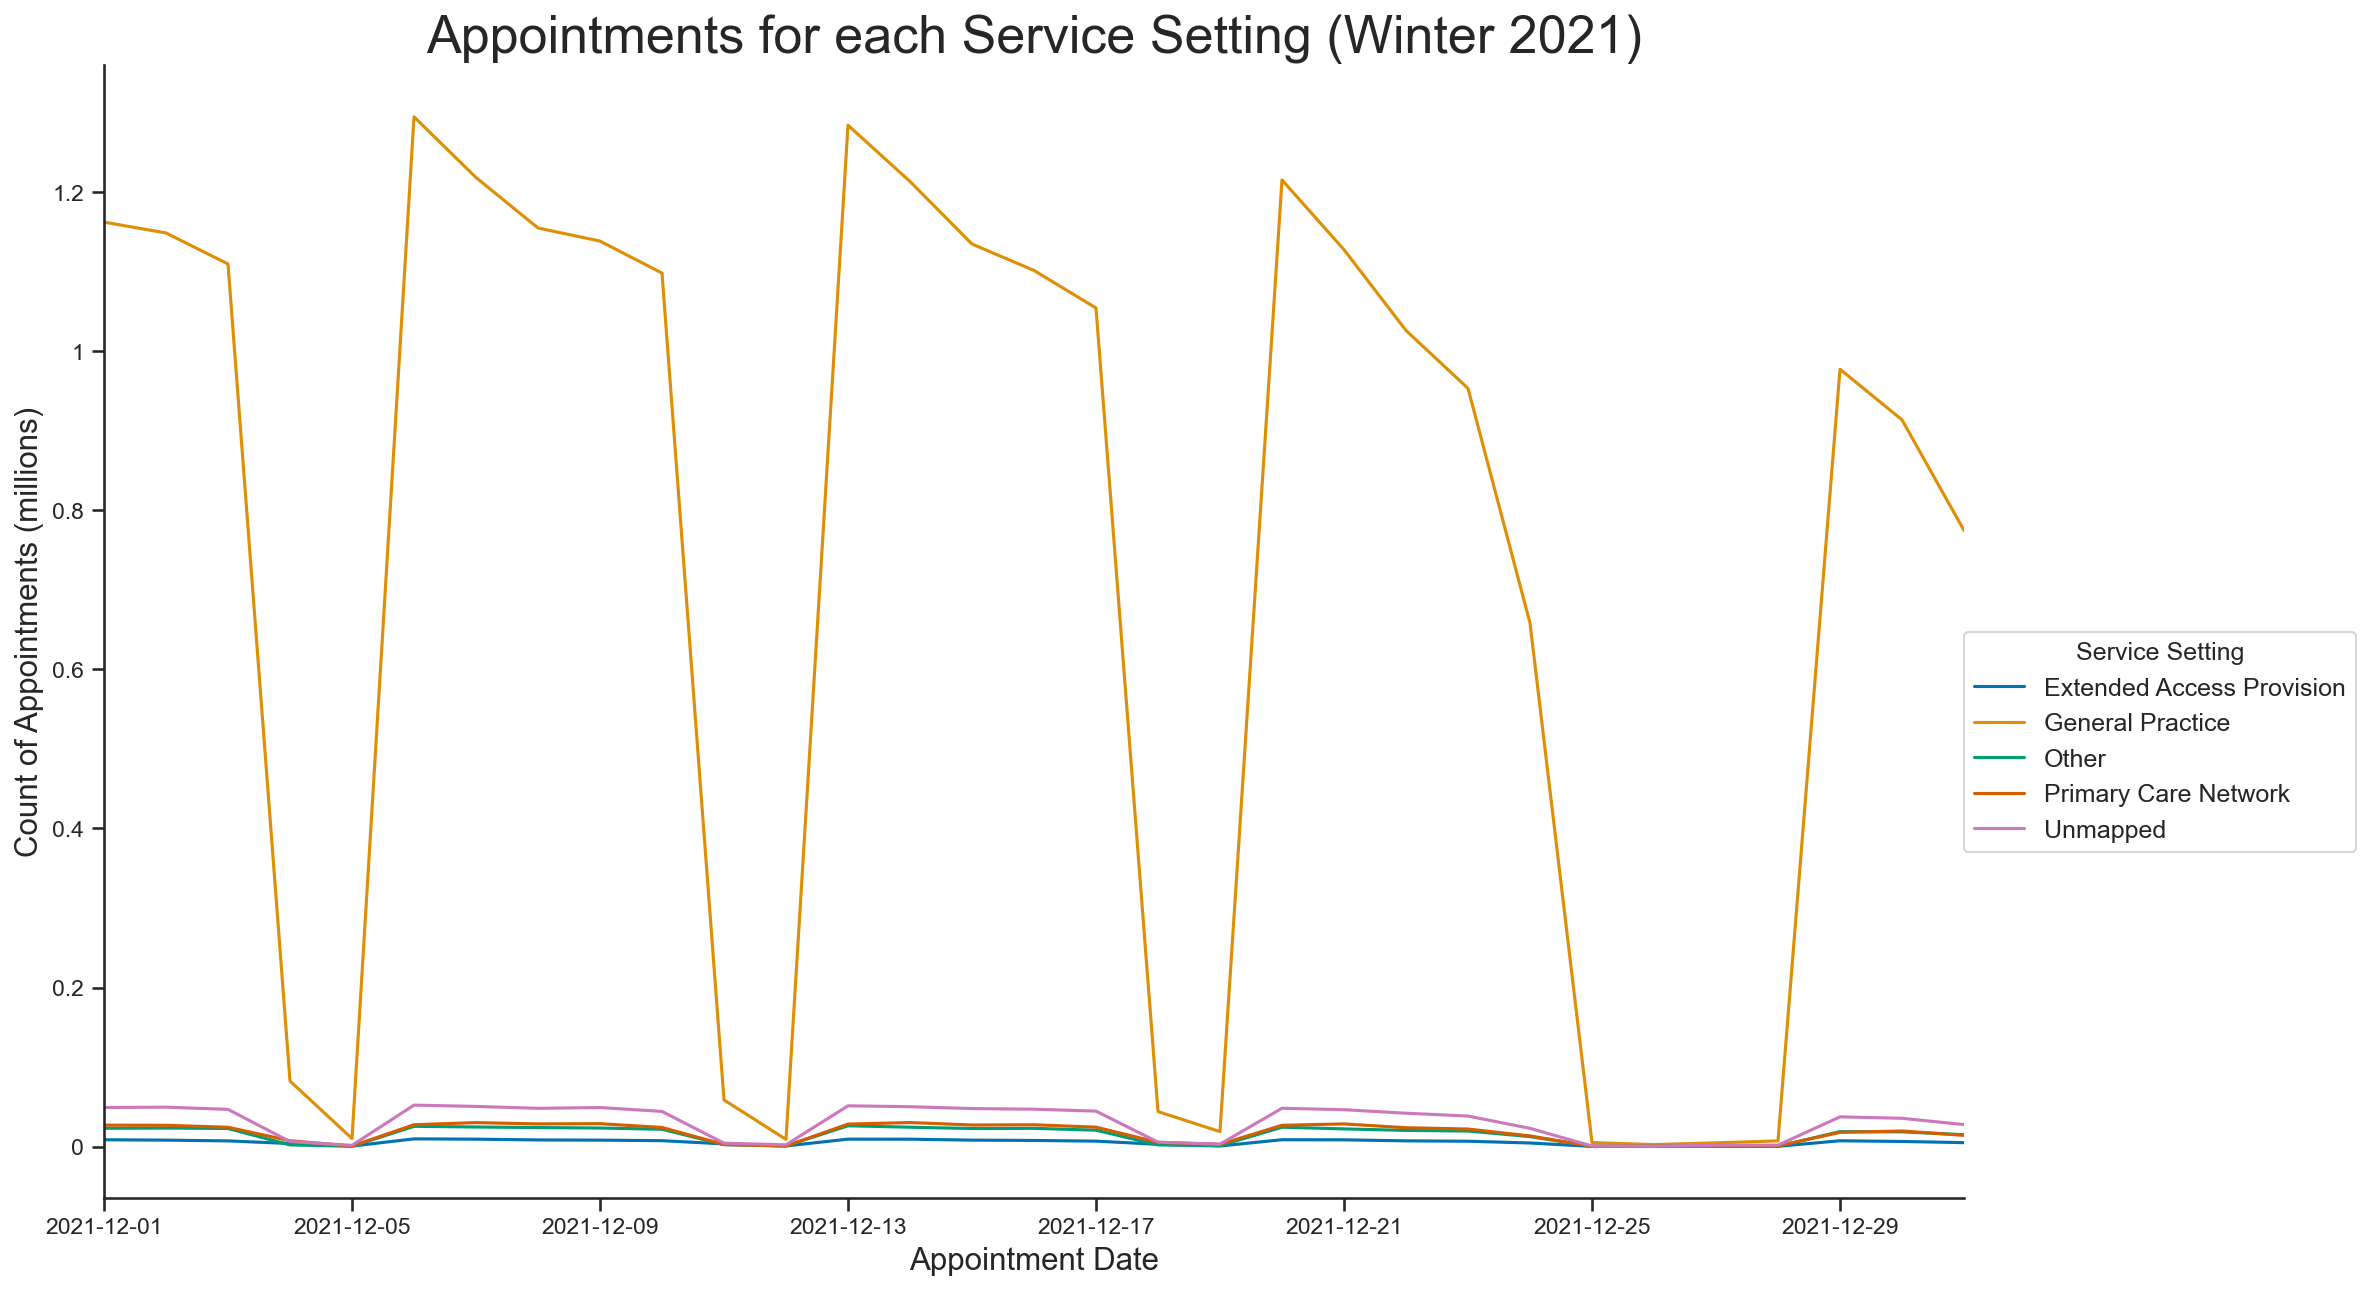

In [76]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot filtering for Winter 2021 (January 2021).
sns.lineplot(x = 'appointment_date', y = 'count_of_appointments',
             hue = 'service_setting', ci = None, palette = 'colorblind',
             data = nc_ss_season[nc_ss_season['appointment_month'] == '2021-12'])

# Format figure attributes.
plt.title('Appointments for each Service Setting (Winter 2021)', fontsize = 25)
plt.xlabel('Appointment Date', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
plt.legend(title = 'Service Setting', fontsize = 12,
           bbox_to_anchor = (1, .5), loc ='upper left', borderaxespad = 0)
ax.set_xlim(['2021-12-01'], ['2021-12-31'])
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

As expected, we can see a decrease in the number of appointments for each **service setting**, particularly for **General Practice**, as December progresses.

There is also seemingly a gap in records between December 25 and December 28, which can most likely be explained by GP Christmas holiday hours.

### Spring 2022

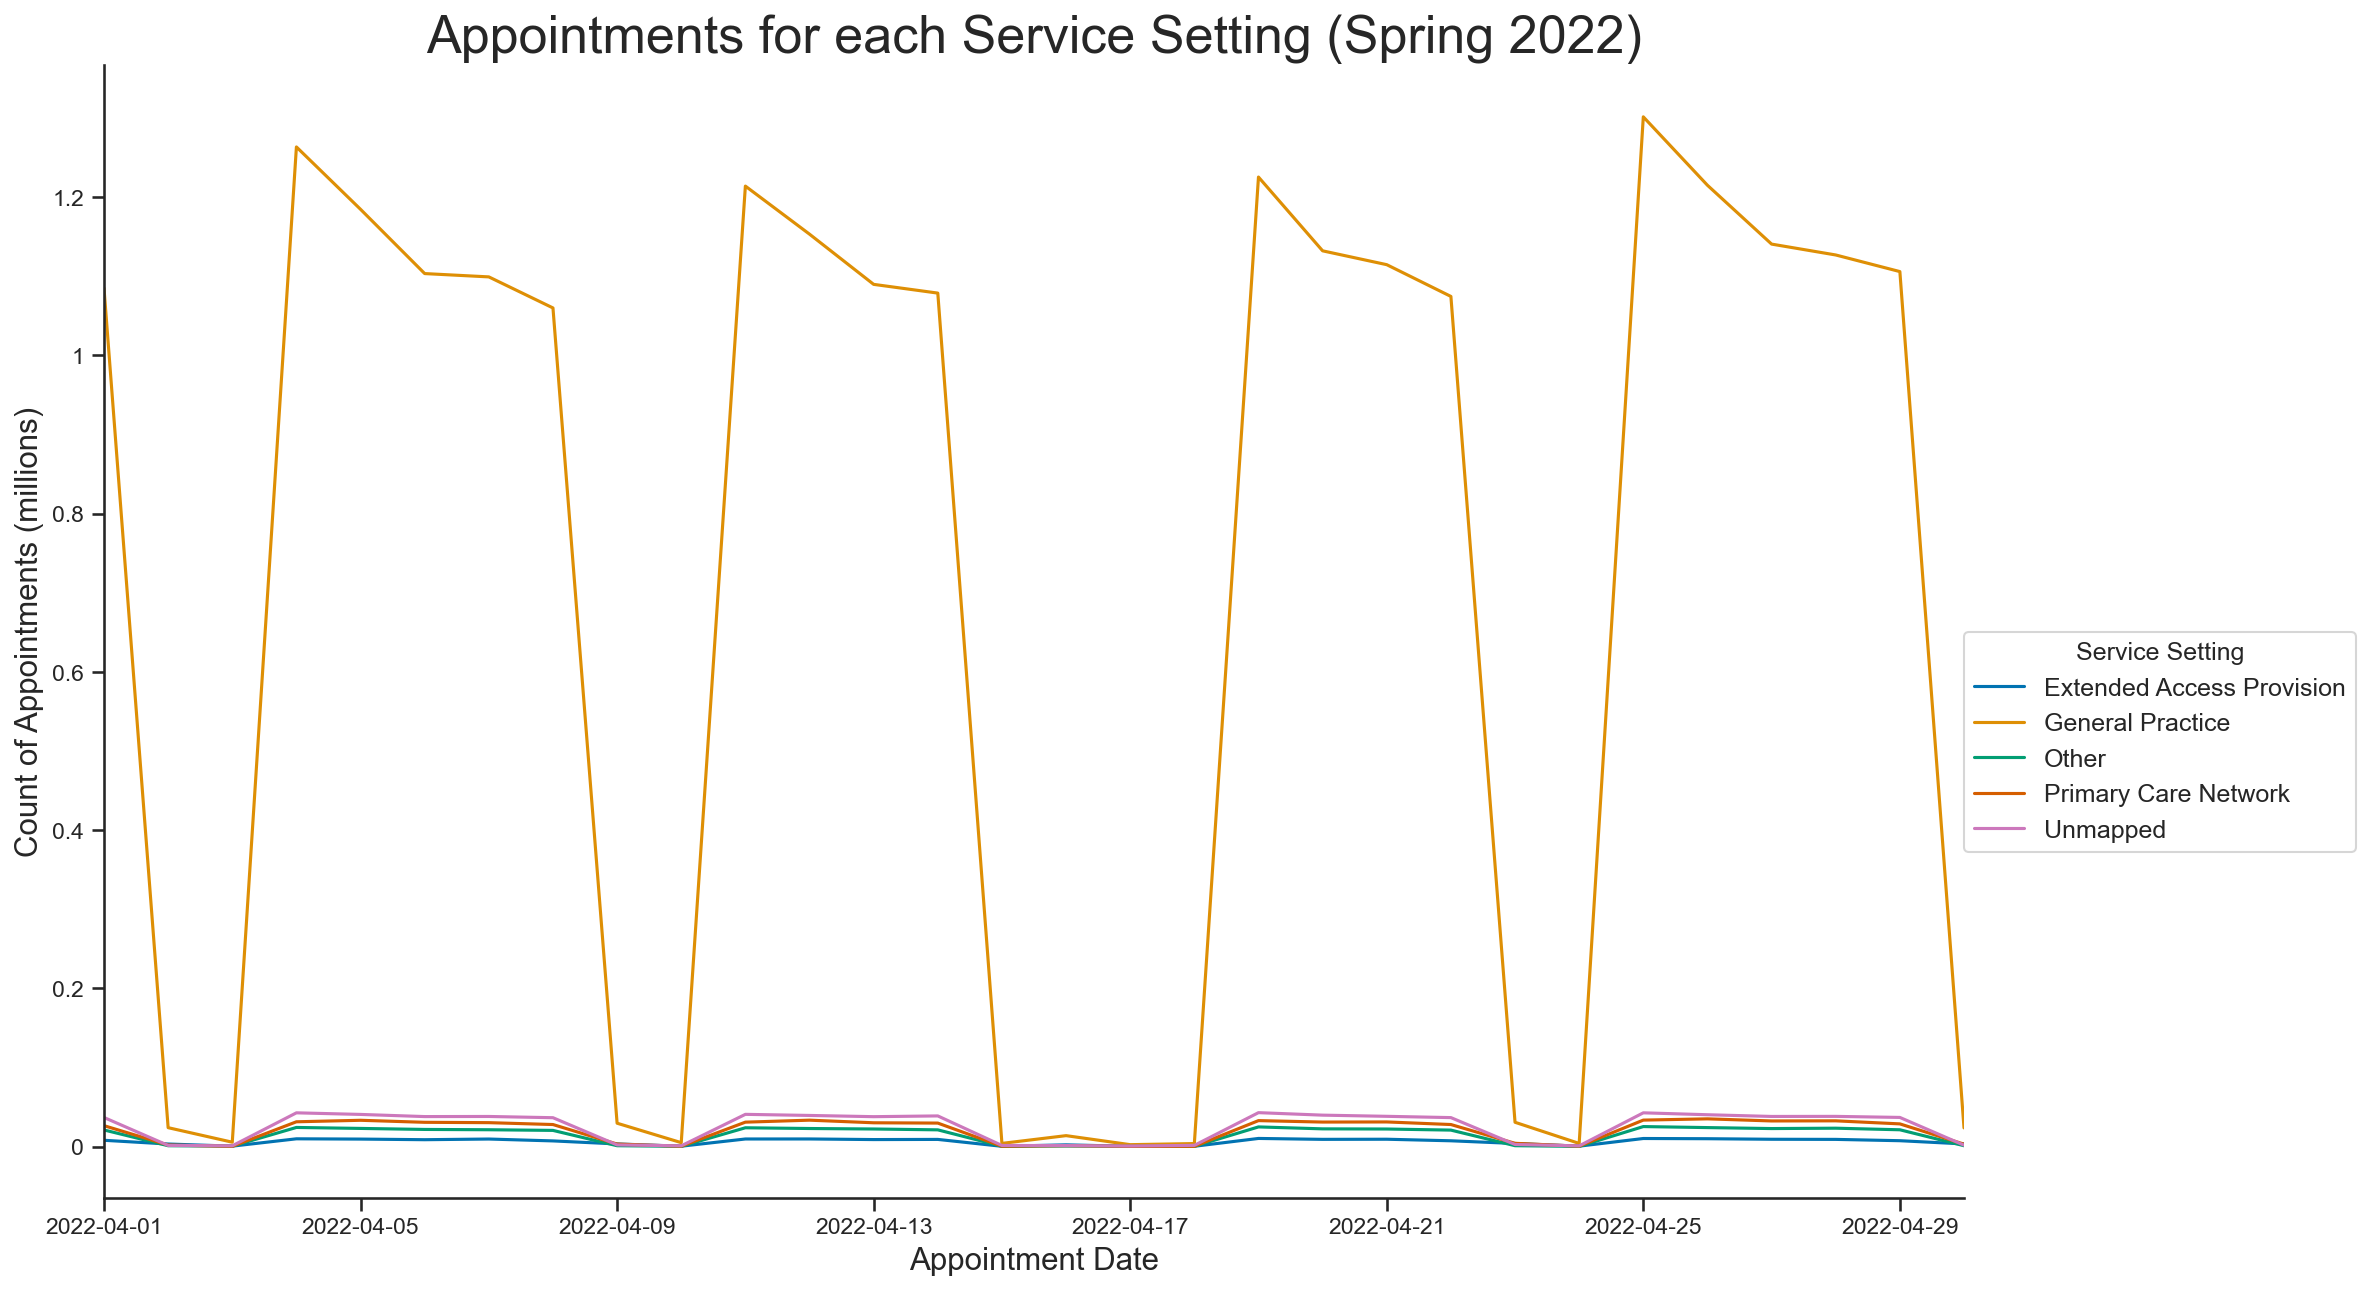

In [77]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot filtering for Spring 2022 (April 2022).
sns.lineplot(x = 'appointment_date', y = 'count_of_appointments',
             hue = 'service_setting', ci = None, palette = 'colorblind',
             data = nc_ss_season[nc_ss_season['appointment_month'] == '2022-04'])

# Format figure attributes.
plt.title('Appointments for each Service Setting (Spring 2022)', fontsize = 25)
plt.xlabel('Appointment Date', fontsize = 15)
plt.ylabel('Count of Appointments (millions)', fontsize = 15)
plt.legend(title = 'Service Setting', fontsize = 12,
           bbox_to_anchor=(1, .5), loc='upper left', borderaxespad=0)
ax.set_xlim(['2022-04-01'], ['2022-04-30'])
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

## <div align="center"> Further Exploration

### <div align="center"> Create a Line Plot showing the change in number of appointments during the run-up to Christmas 2021.

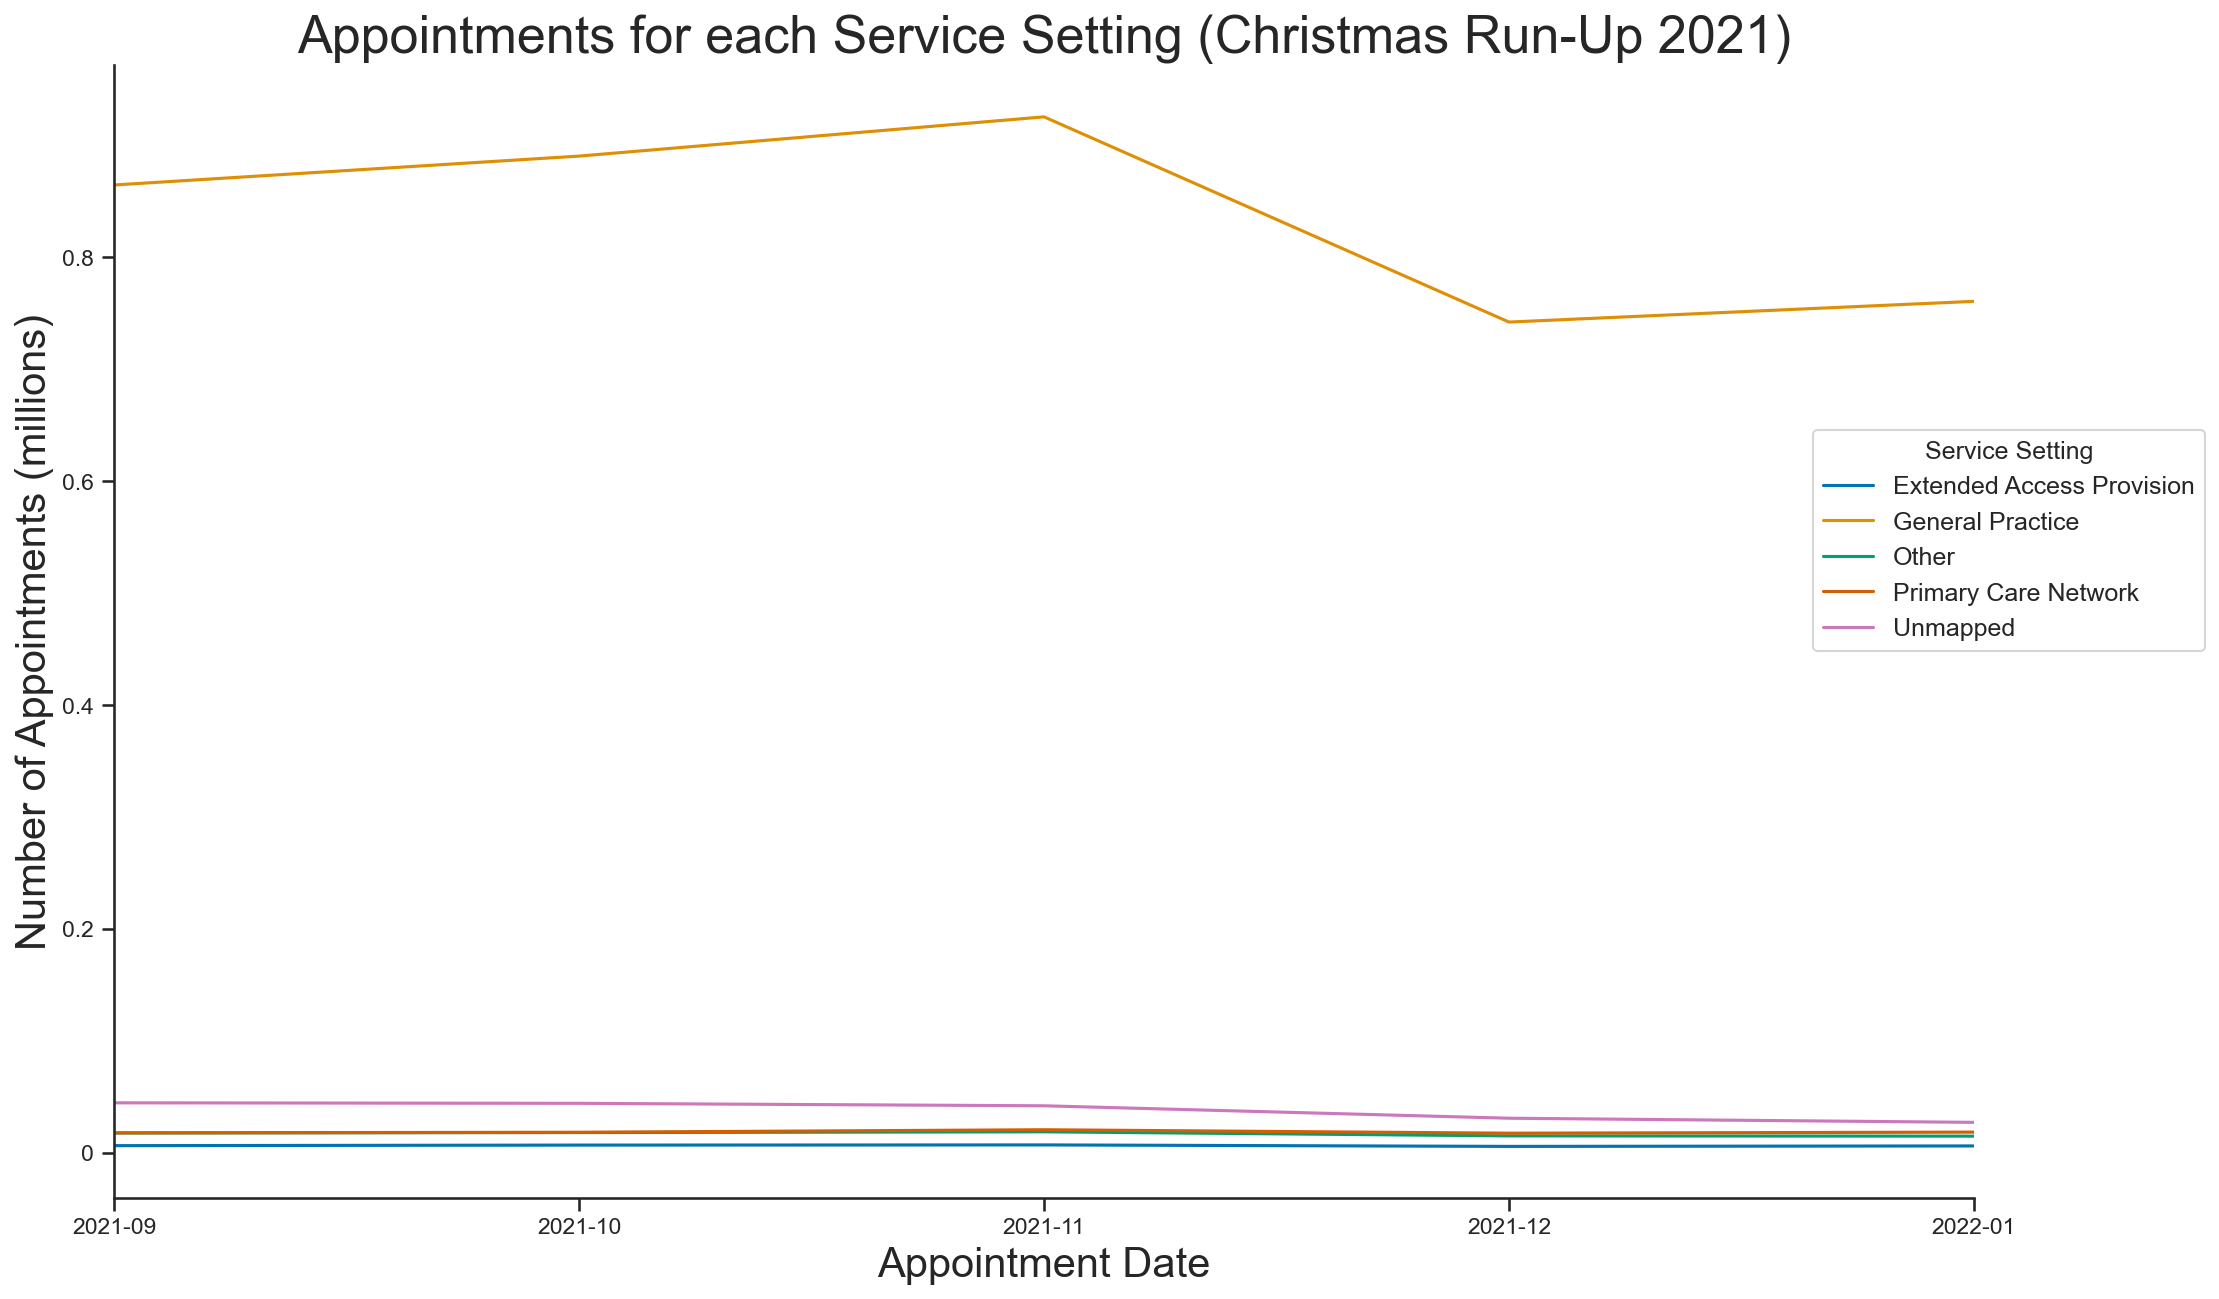

In [78]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot filtering for Christmas Run-Up 2021 (Sept 2021 - Jan 2022).
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'service_setting', ci = None, palette = 'colorblind',
             data = nc_ss_season[nc_ss_season['appointment_month']\
                                 .between('2021-09', '2022-01')])

# Format figure attributes.
plt.title('Appointments for each Service Setting (Christmas Run-Up 2021)',
          fontsize = 25)
plt.xlabel('Appointment Date', fontsize = 20)
plt.ylabel('Number of Appointments (millions)', fontsize = 20)
plt.legend(title = 'Service Setting', fontsize = 12,
           bbox_to_anchor = (.9, .7), loc = 'upper left', borderaxespad = 1)
ax.set_xlim(['2021-09'], ['2022-01'])
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('Appointments for each Service Setting (Christmas Run-Up 2021.jpg')

The busy period of **October - December** may be explained by:

- "The NHS is always under considerable pressure over the winter period as demand for services tends to increase significantly with the onset of cold weather and flu."
    - [NHS Providers](https://nhsproviders.org/topics/delivery-and-performance/winter-pressures#:~:text=The%20NHS%20frontline%20is%20always,of%20cold%20weather%20and%20flu.)


- Perhaps the decrease in appointment numbers in **December** was due, in part, to the shortages in staff across the NHS over the Christmas period.
    - [The Independent](https://www.independent.co.uk/news/health/nhs-mass-staff-shortage-christmas-b1981961.html)

### <div align="center"> How do the Healthcare Professional Types differ over time?

In [79]:
# Subset the ar DataFrame, aggregating the hcp_type
# with count_of_appointments.
ar_hcp = ar.groupby(['hcp_type', 'appointment_month'])\
                    ['count_of_appointments'].agg('sum').reset_index()

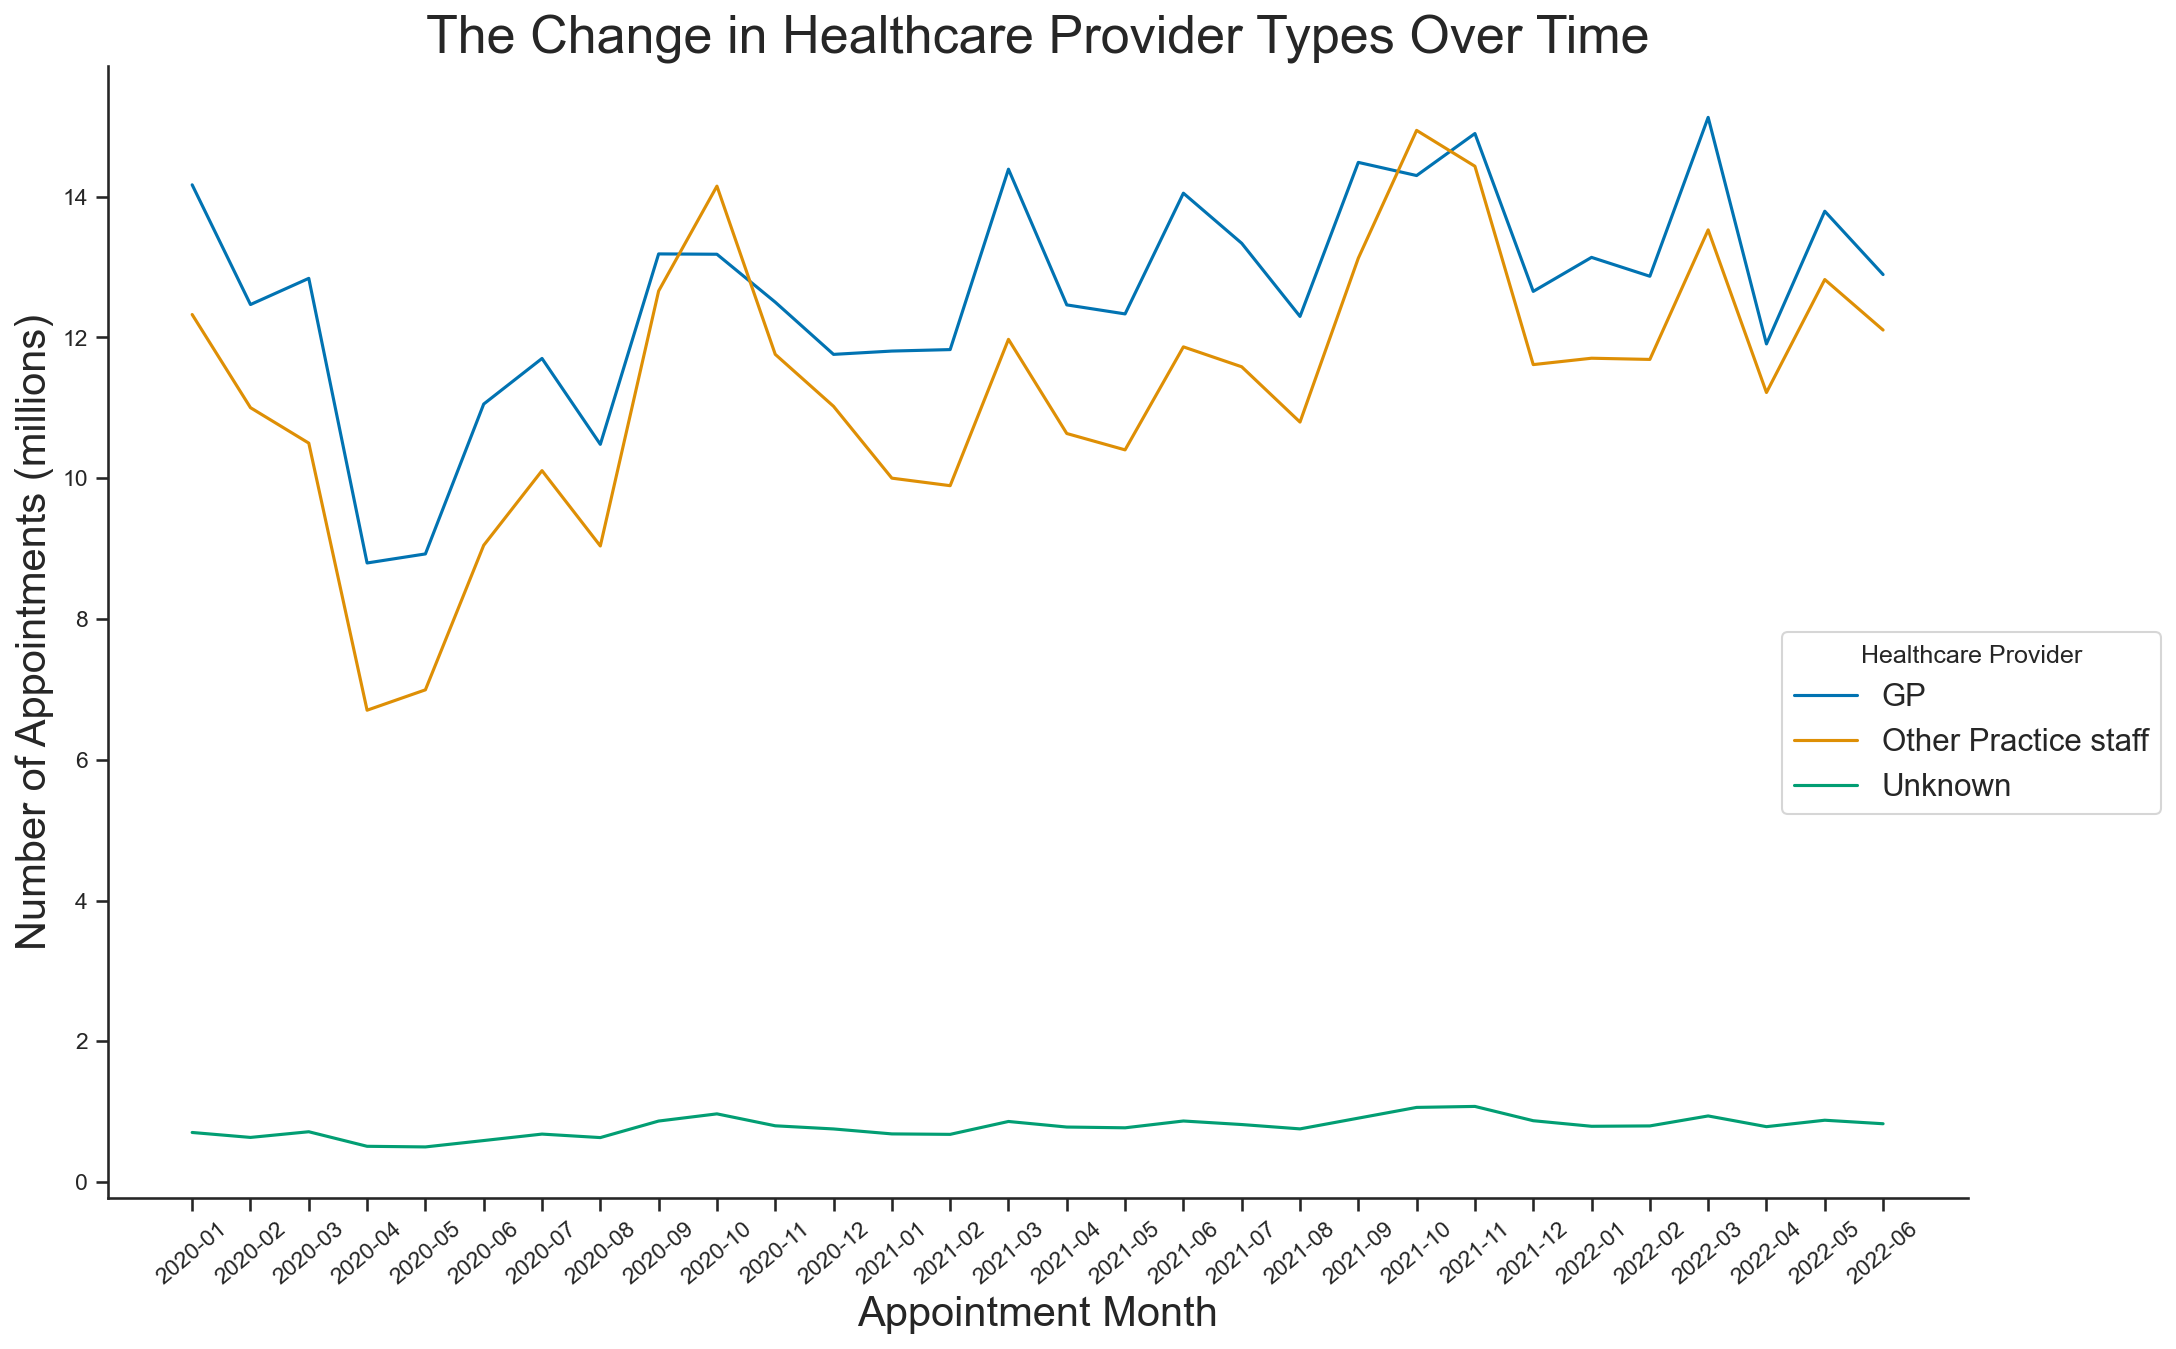

In [80]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'hcp_type', ci = None, palette = 'colorblind',
             data = ar_hcp)

# Format figure attributes.
plt.title('The Change in Healthcare Provider Types Over Time',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Number of Appointments (millions)', fontsize = 20)
plt.legend(title = 'Healthcare Provider', fontsize = 15,
           bbox_to_anchor = (.9, .5), loc = 'upper left', borderaxespad = 0)
plt.xticks(rotation = 40)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('The Change in Healthcare Provider Types Over Time.jpg')

**GP** and **Other Practice Staff** seem to follow a similar trajectory.

- In **October 2020** and **2021** the **Other Practice Staff** category exceeds **GP** in the number of appointmets.
    - It would be useful to access more specific staff data to break the Other Practice Staff category into its contained roles and see how in-demand they are during busy periods.


We can see that there was a significant drop in appointments for both **GP** and **Other Practice Staff** between **January 2020** and **April 2020** which may be explained by the fact that these first few months of 2020 were when media and government coverage of the COVID-19 pandemic was taking hold in the UK, leading ultimately to the first of the nation-wide lockdowns, which meant that most people wouldn't have been able to attend appointments.

- This plot does not necessarily mean that all appointments dropped in number during this time.
    - I would like to investigate whether all modes of appointments decreased in number during this period or was it just those which were Face-to-Face.

### <div align="center"> Display the change in number of appointments for each appointment mode over time.

In [81]:
# Create a subset of the ar DataFrame, aggregating the
# appointment mode and count of appoinntments.
ar_mode = ar.groupby(['appointment_mode', 'appointment_month'])\
                     ['count_of_appointments'].agg('sum').reset_index()

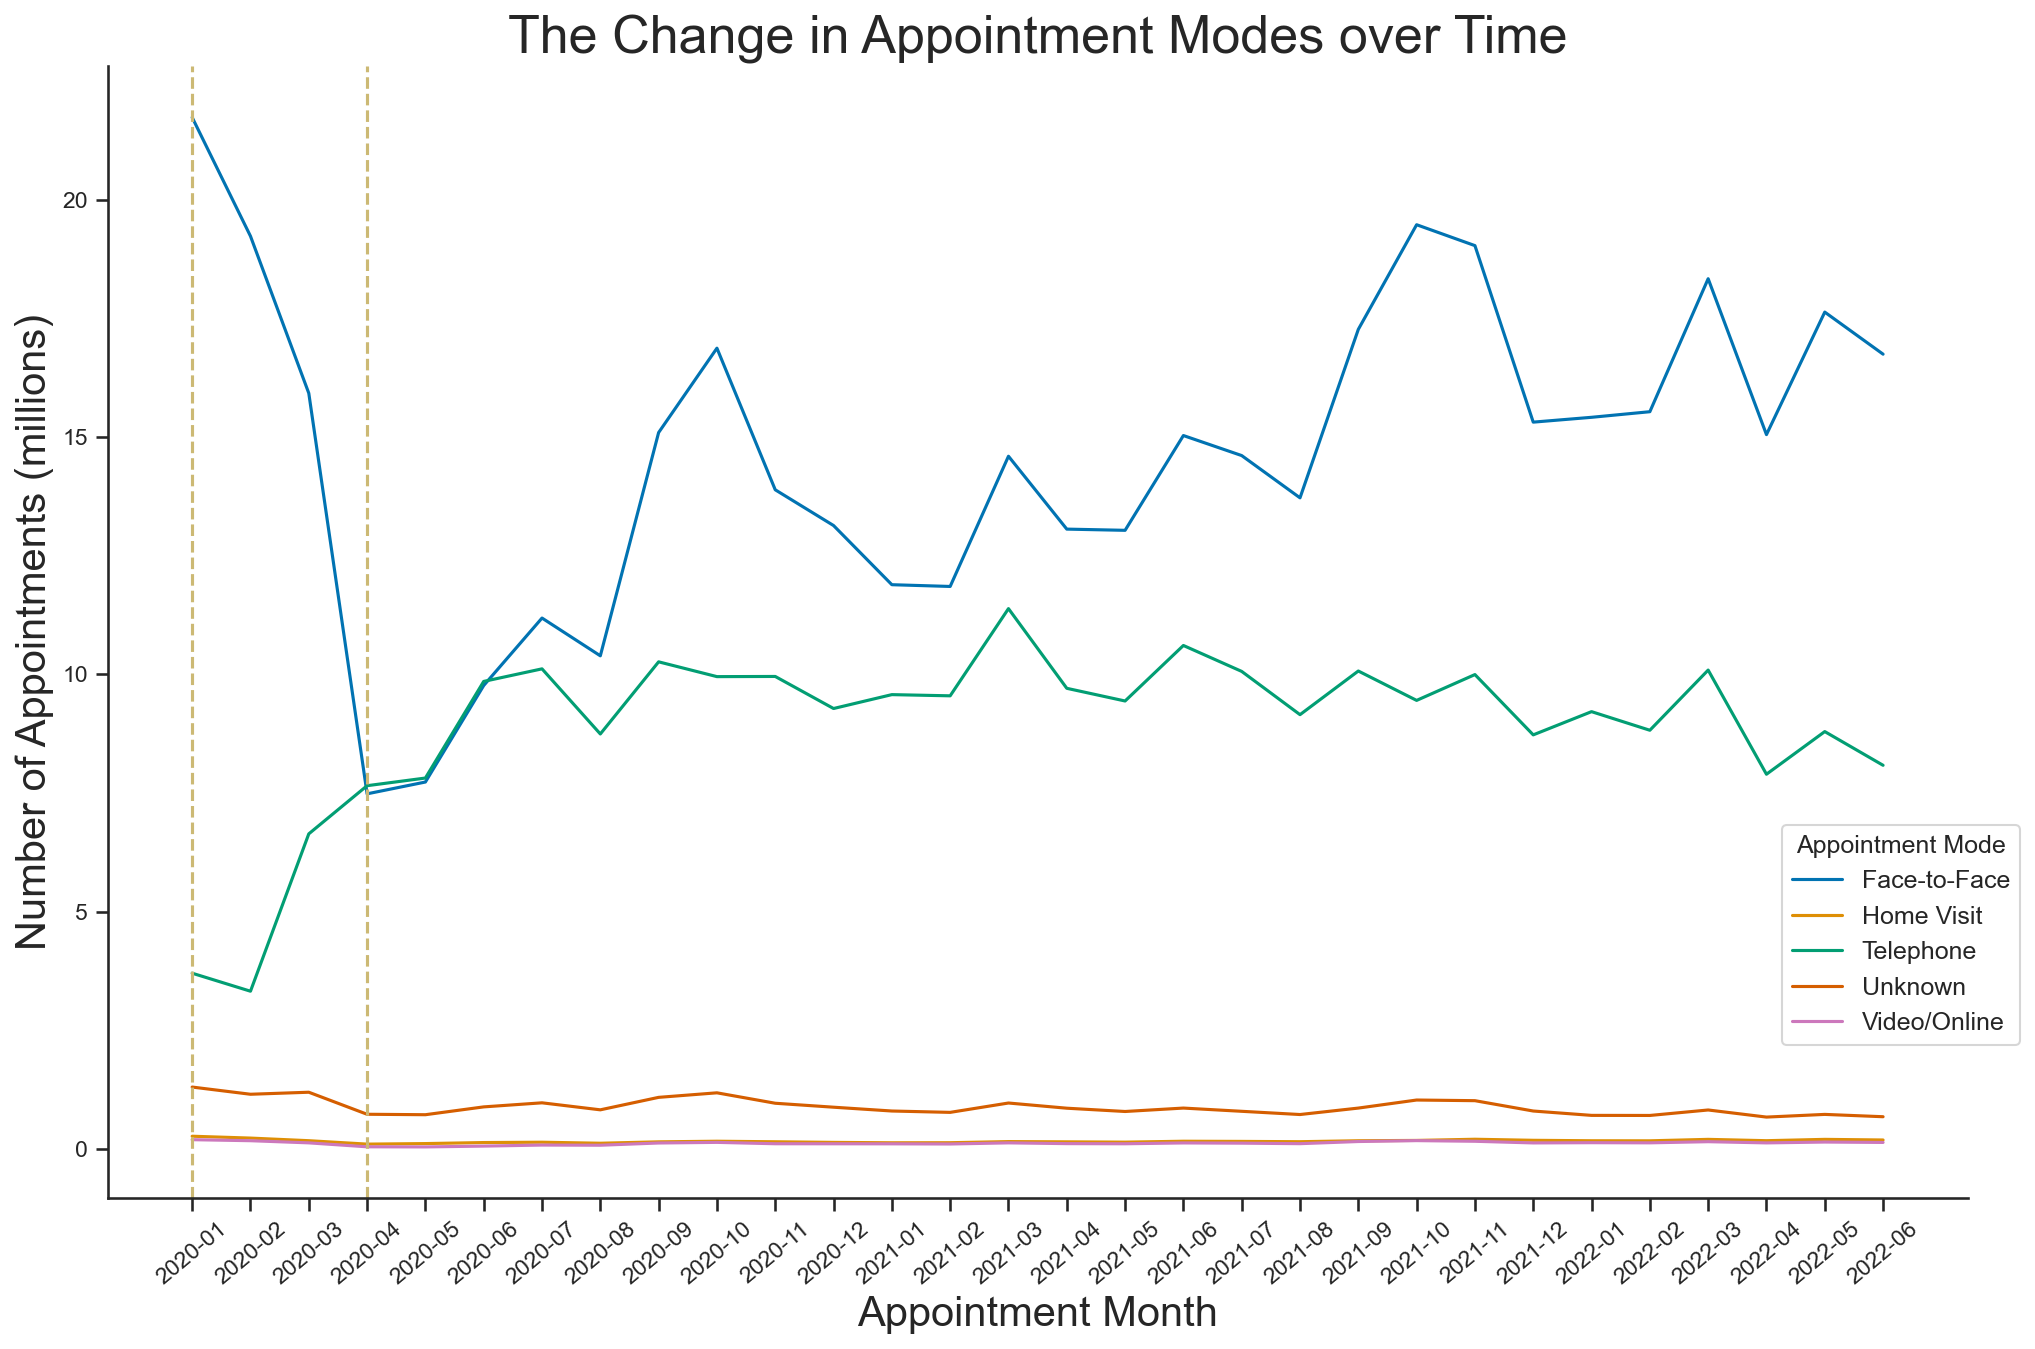

In [82]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'appointment_mode', ci = None,
             palette = 'colorblind',
             data = ar_mode)

# Format figure attributes.
plt.title('The Change in Appointment Modes over Time',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Number of Appointments (millions)', fontsize = 20)
plt.legend(title = 'Appointment Mode', fontsize = 12,
           bbox_to_anchor = (.9, .33), loc = 'upper left',
           borderaxespad = 0)
plt.xticks(rotation = 40)
plt.axvline(x = '2020-01', color = 'y', linestyle = '--')
plt.axvline(x = '2020-04', color = 'y', linestyle = '--')
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('The Change in Appointment Modes over Time.jpg')

Here we can see that as the UK entered lockdown, people were unable to physically attend appointments. Therefore, we could surmise that appointments via **telephone** were where patients turned to, as it is the only **mode** to rise, and they rose dramatically during this period and beyond.

As the vaccine was rolled out in the UK in late 2020 / early 2021 and the government eased lockdown restrictions, we can see the resulting gradual fall in **telephone** appointments and rise in those which were **Face-to-Face**.

It is also apparent that during the busiest months (**September - November 2021** and **March 2022**) the number of **Face-to-Face** appointments rose significantly.
   - This seems to be a clear indication of where the NHS' resources are being utilised in busy periods.
   
- Was the NHS prepared for this rise in telephone appointments?

### <div align="center"> Should the NHS look at increasing staff levels?

In [83]:
# Create a new DataFrame with only the appointment month
# and the aggregated sum of appointments.
ar_sub = ar.groupby('appointment_month')\
         ['count_of_appointments'].agg('sum').reset_index()

# Add a column to the new DataFrame indicating the average
# utilisation of service per day.
ar_sub['utilisation'] = ar_sub.count_of_appointments / 30

# Round the output to 2 decimal places.
ar_sub['utilisation'] = ar_sub['utilisation'].round(decimals = 1)

# View the output.
ar_sub

appointment_month  count_of_appointments  utilisation
0            2020-01               27199296     906643.2
1            2020-02               24104621     803487.4
2            2020-03               24053468     801782.3
3            2020-04               16007881     533596.0
4            2020-05               16417212     547240.4
5            2020-06               20690805     689693.5
6            2020-07               22491437     749714.6
7            2020-08               20150520     671684.0
8            2020-09               26714255     890475.2
9            2020-10               28301932     943397.7
10           2020-11               25061602     835386.7
11           2020-12               23535936     784531.2
12           2021-01               22492069     749735.6
13           2021-02               22399569     746652.3
14           2021-03               27225424     907514.1
15           2021-04               23879932     795997.7
16           2021-05               23508395     783613.2
17           2021-06               26784182     892806.1
18           2021-07               25739219     857974.0
19           2021-08               23852171     795072.4
20           2021-09               28522501     950750.0
21           2021-10               30303834    1010127.8
22           2021-11               30405070    1013502.3
23           2021-12               25140776     838025.9
24           2022-01               25635474     854515.8
25           2022-02               25355260     845175.3
26           2022-03               29595038     986501.3
27           2022-04               23913060     797102.0
28           2022-05               27495508     916516.9
29           2022-06               25828078     860935.9

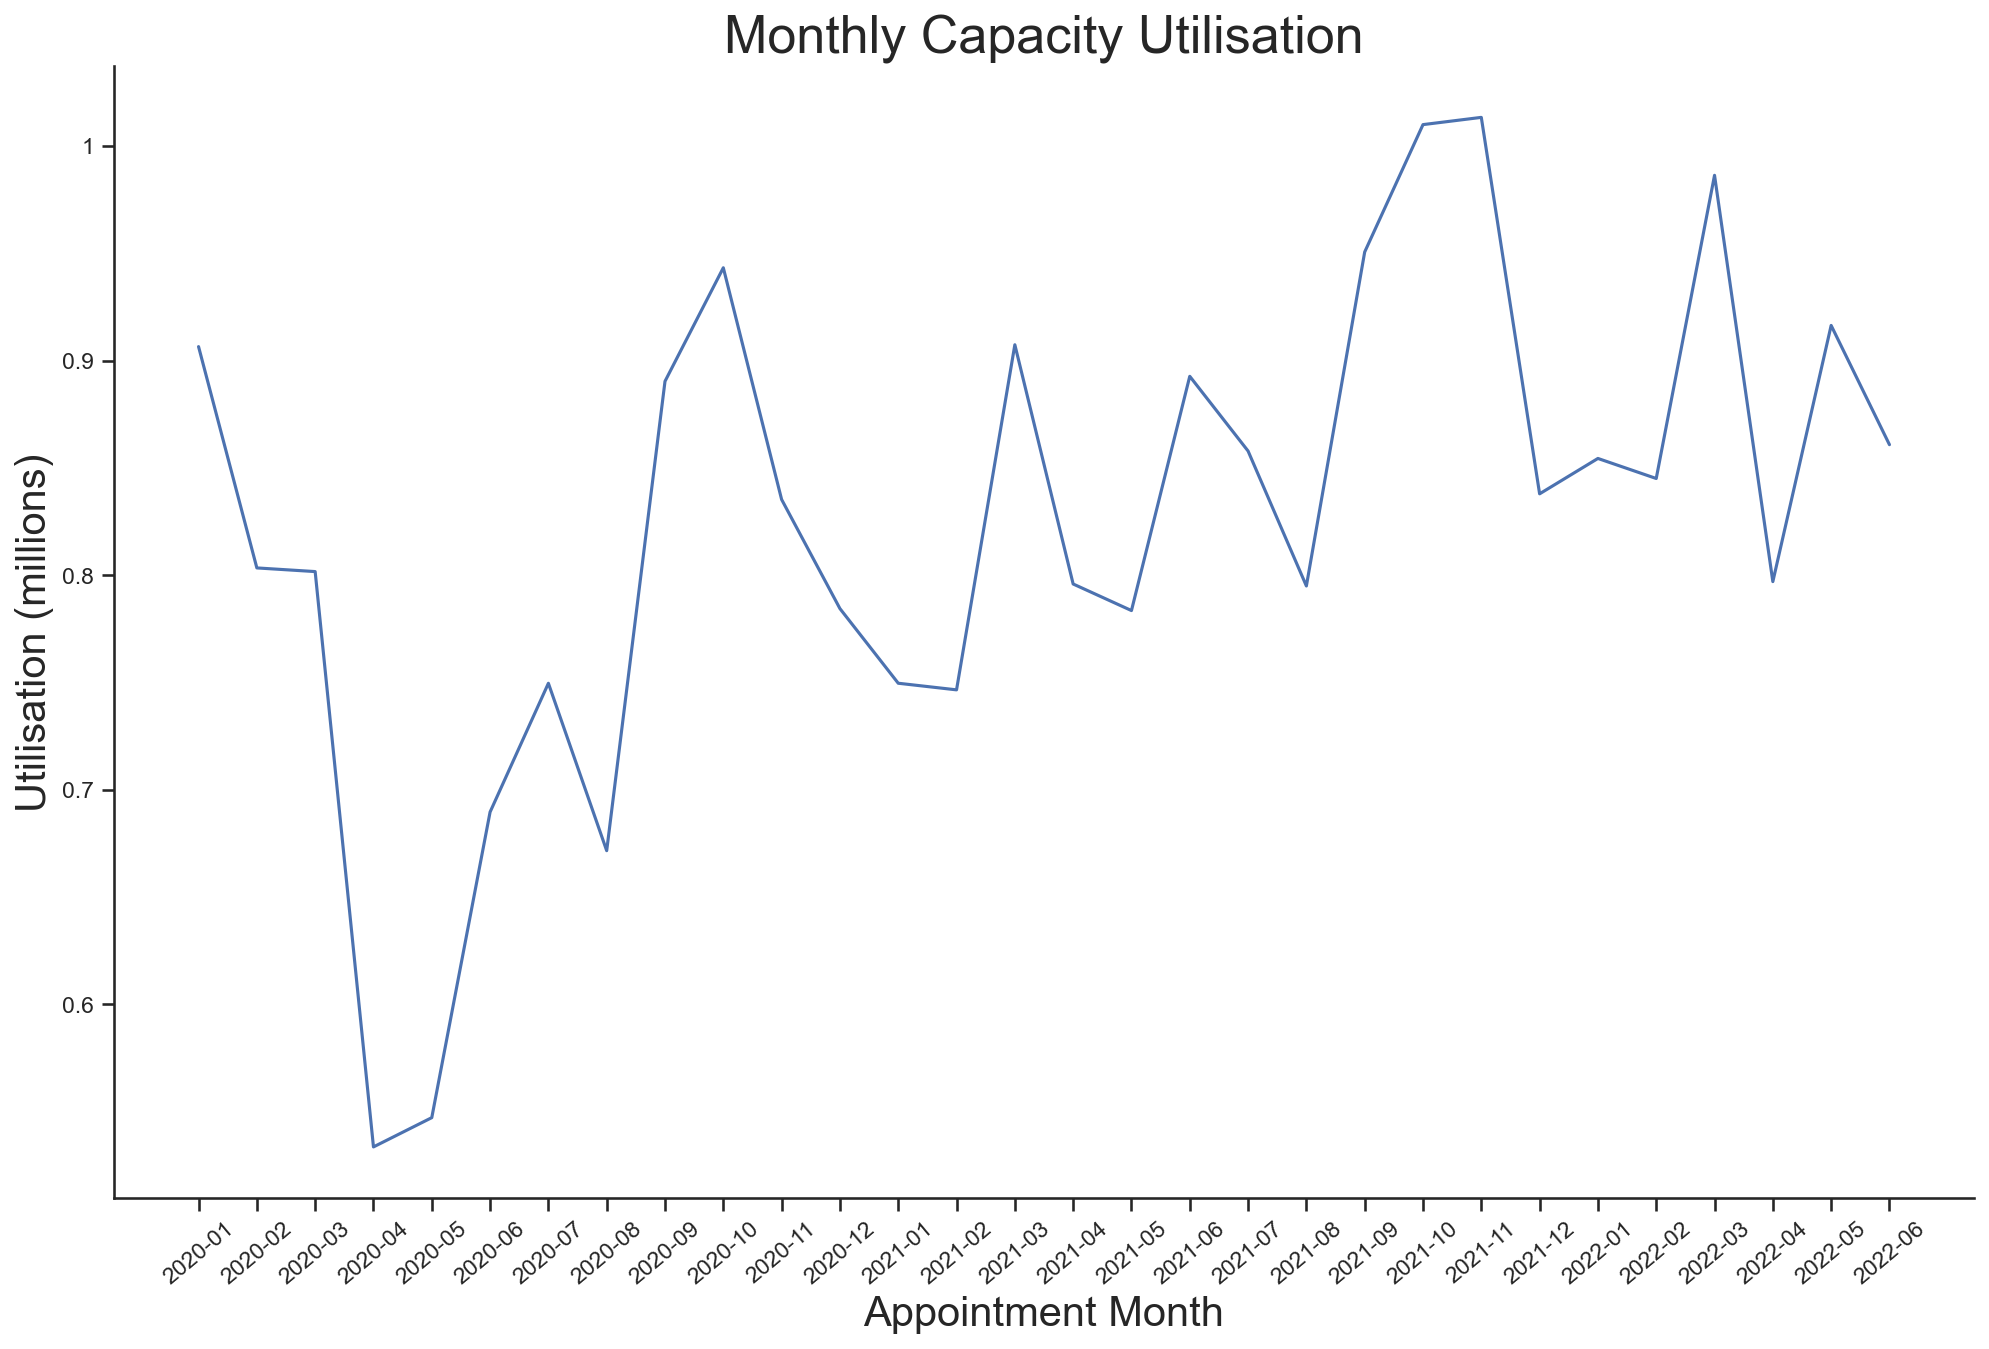

In [84]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'utilisation',
             data = ar_sub)

# Format figure attributes.
plt.title('Monthly Capacity Utilisation',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Utilisation (millions)', fontsize = 20)
plt.xticks(rotation = 40)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

In [85]:
# Create a new DataFrame with only the appointment month
# and the aggregated sum of appointments.
ar_sub_2 = ar.groupby(['appointment_month', 'appointment_mode'])\
         ['count_of_appointments'].agg('sum').reset_index()

# Add a column to the new DataFrame indicating the average
# utilisation of service per day.
ar_sub_2['utilisation'] = ar_sub_2.count_of_appointments / 30

# Round the output to 2 decimal places.
ar_sub_2['utilisation'] = ar_sub_2['utilisation'].round(decimals = 1)

# View the output.
ar_sub_2.sort_values(by = 'utilisation', ascending = False)

appointment_month appointment_mode  count_of_appointments  utilisation
0             2020-01     Face-to-Face               21733394     724446.5
105           2021-10     Face-to-Face               19471561     649052.0
5             2020-02     Face-to-Face               19230573     641019.1
110           2021-11     Face-to-Face               19031327     634377.6
130           2022-03     Face-to-Face               18333743     611124.8
..                ...              ...                    ...          ...
34            2020-07     Video/Online                  80764       2692.1
39            2020-08     Video/Online                  77183       2572.8
29            2020-06     Video/Online                  59057       1968.6
19            2020-04     Video/Online                  44213       1473.8
24            2020-05     Video/Online                  41650       1388.3

[150 rows x 4 columns]

Although the following plot is a scaled down version of the previous plot viewing the change in **appointment modes** overe time, it is also worth viewing the monthly capacity **utilisation** of each **appointment mode**.

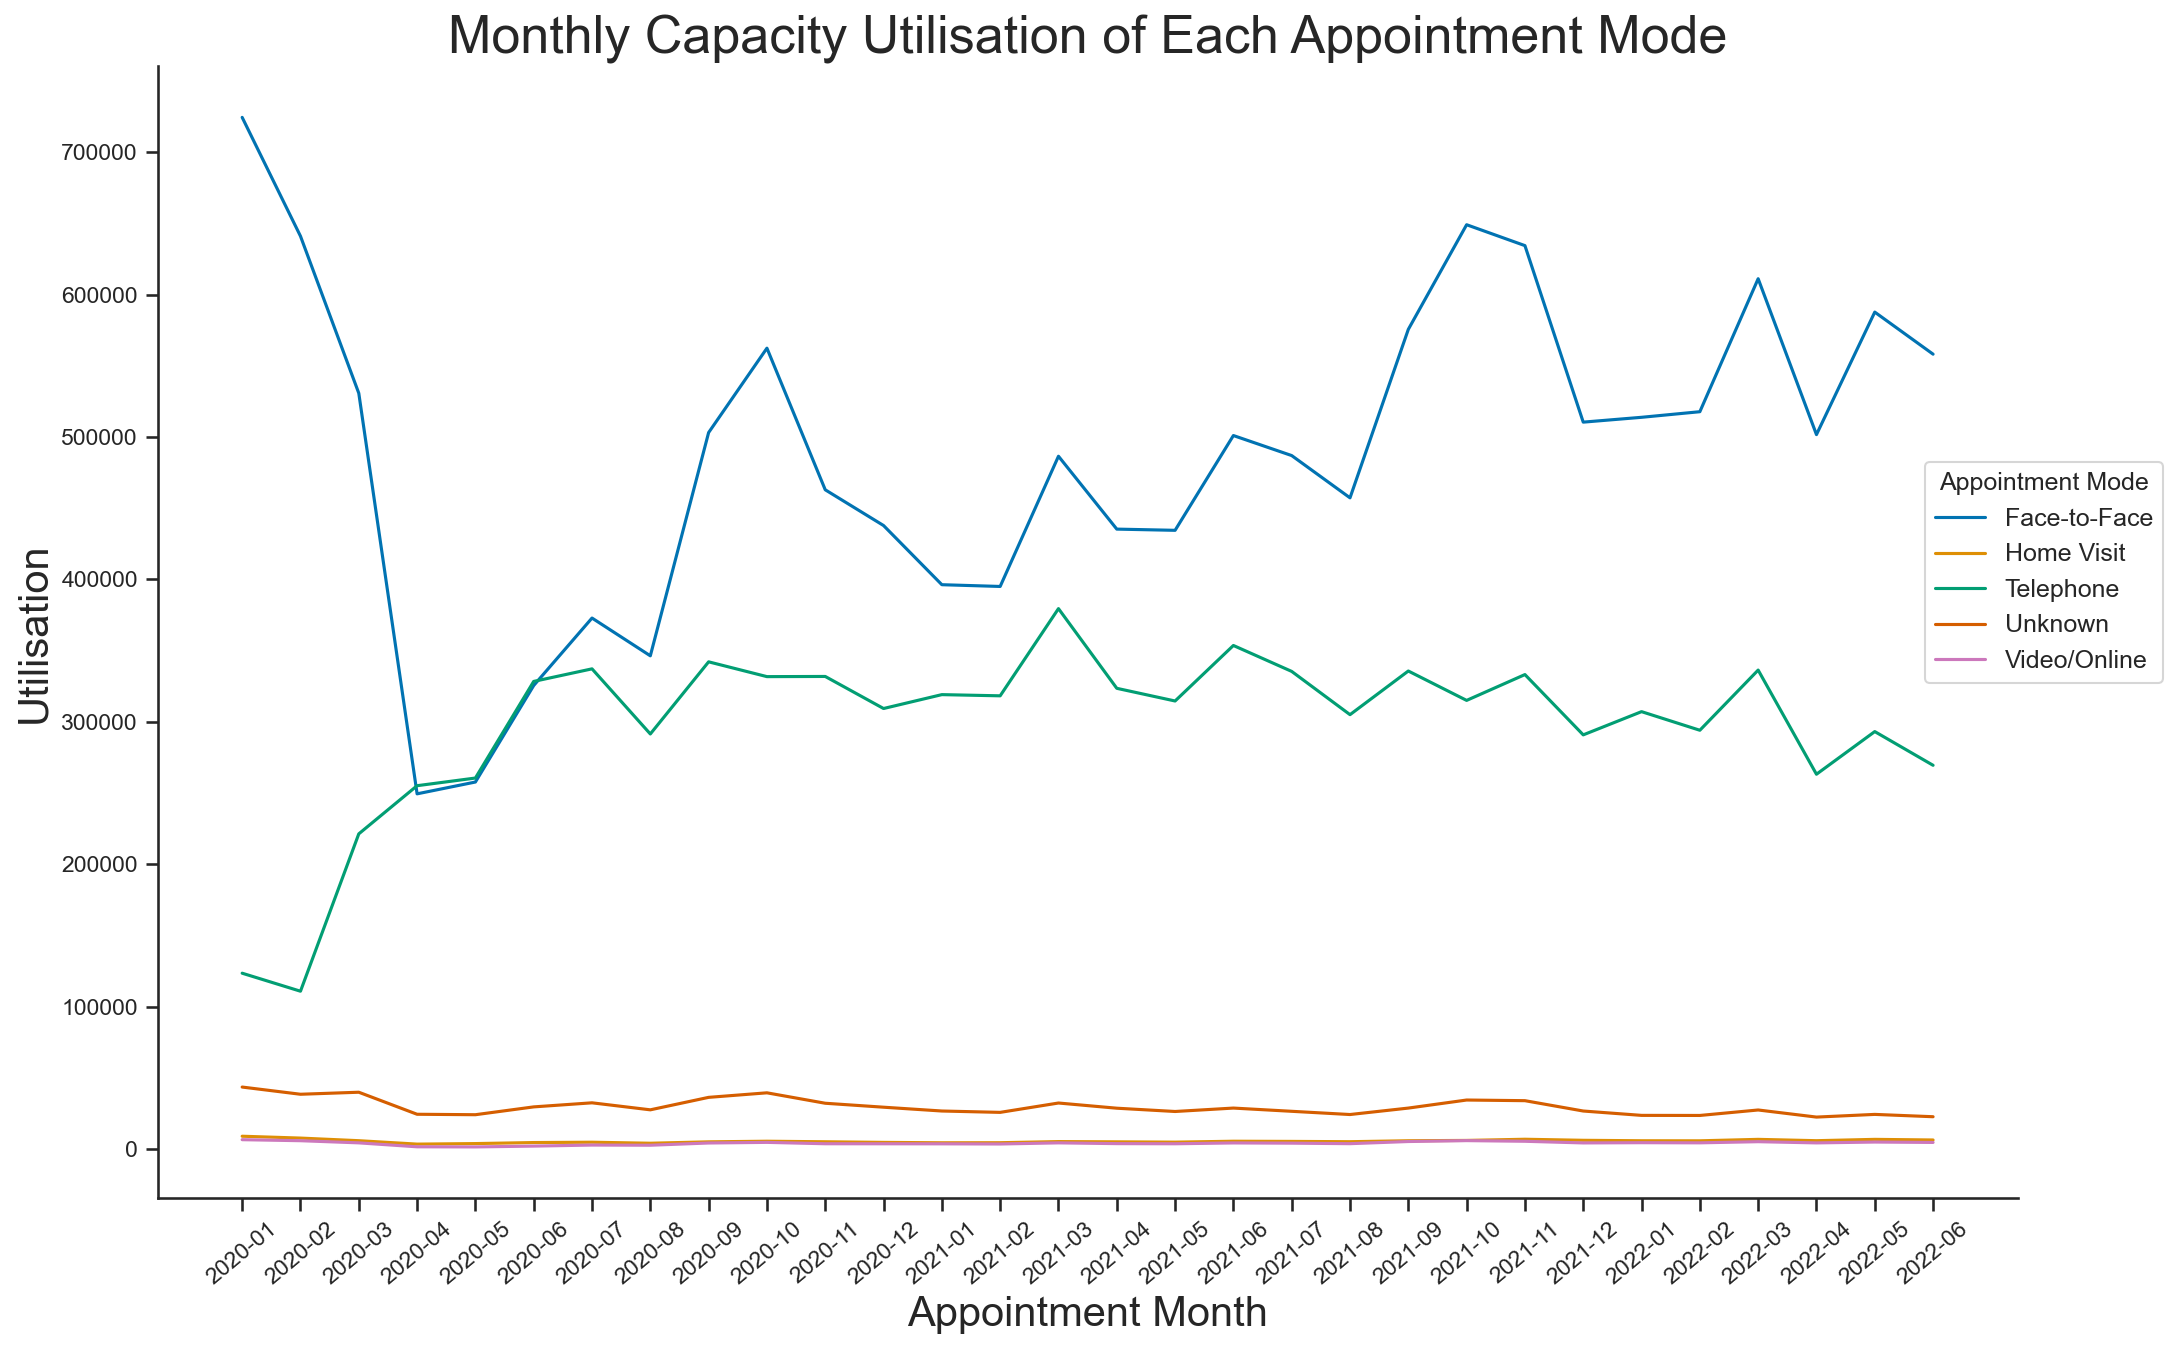

In [86]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'utilisation',
             hue = 'appointment_mode', palette = 'colorblind',
             data = ar_sub_2)

# Format figure attributes.
plt.title('Monthly Capacity Utilisation of Each Appointment Mode',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Utilisation', fontsize = 20)
plt.legend(title = 'Appointment Mode', fontsize = 12,
           bbox_to_anchor = (.95, .65), loc = 'upper left',
           borderaxespad = 0)
plt.xticks(rotation = 40)
sns.despine()

I have also created a chart focusing specifically on the utilisation of resources for **telephone** appointments to highlight the sharp rise in resource allocation.

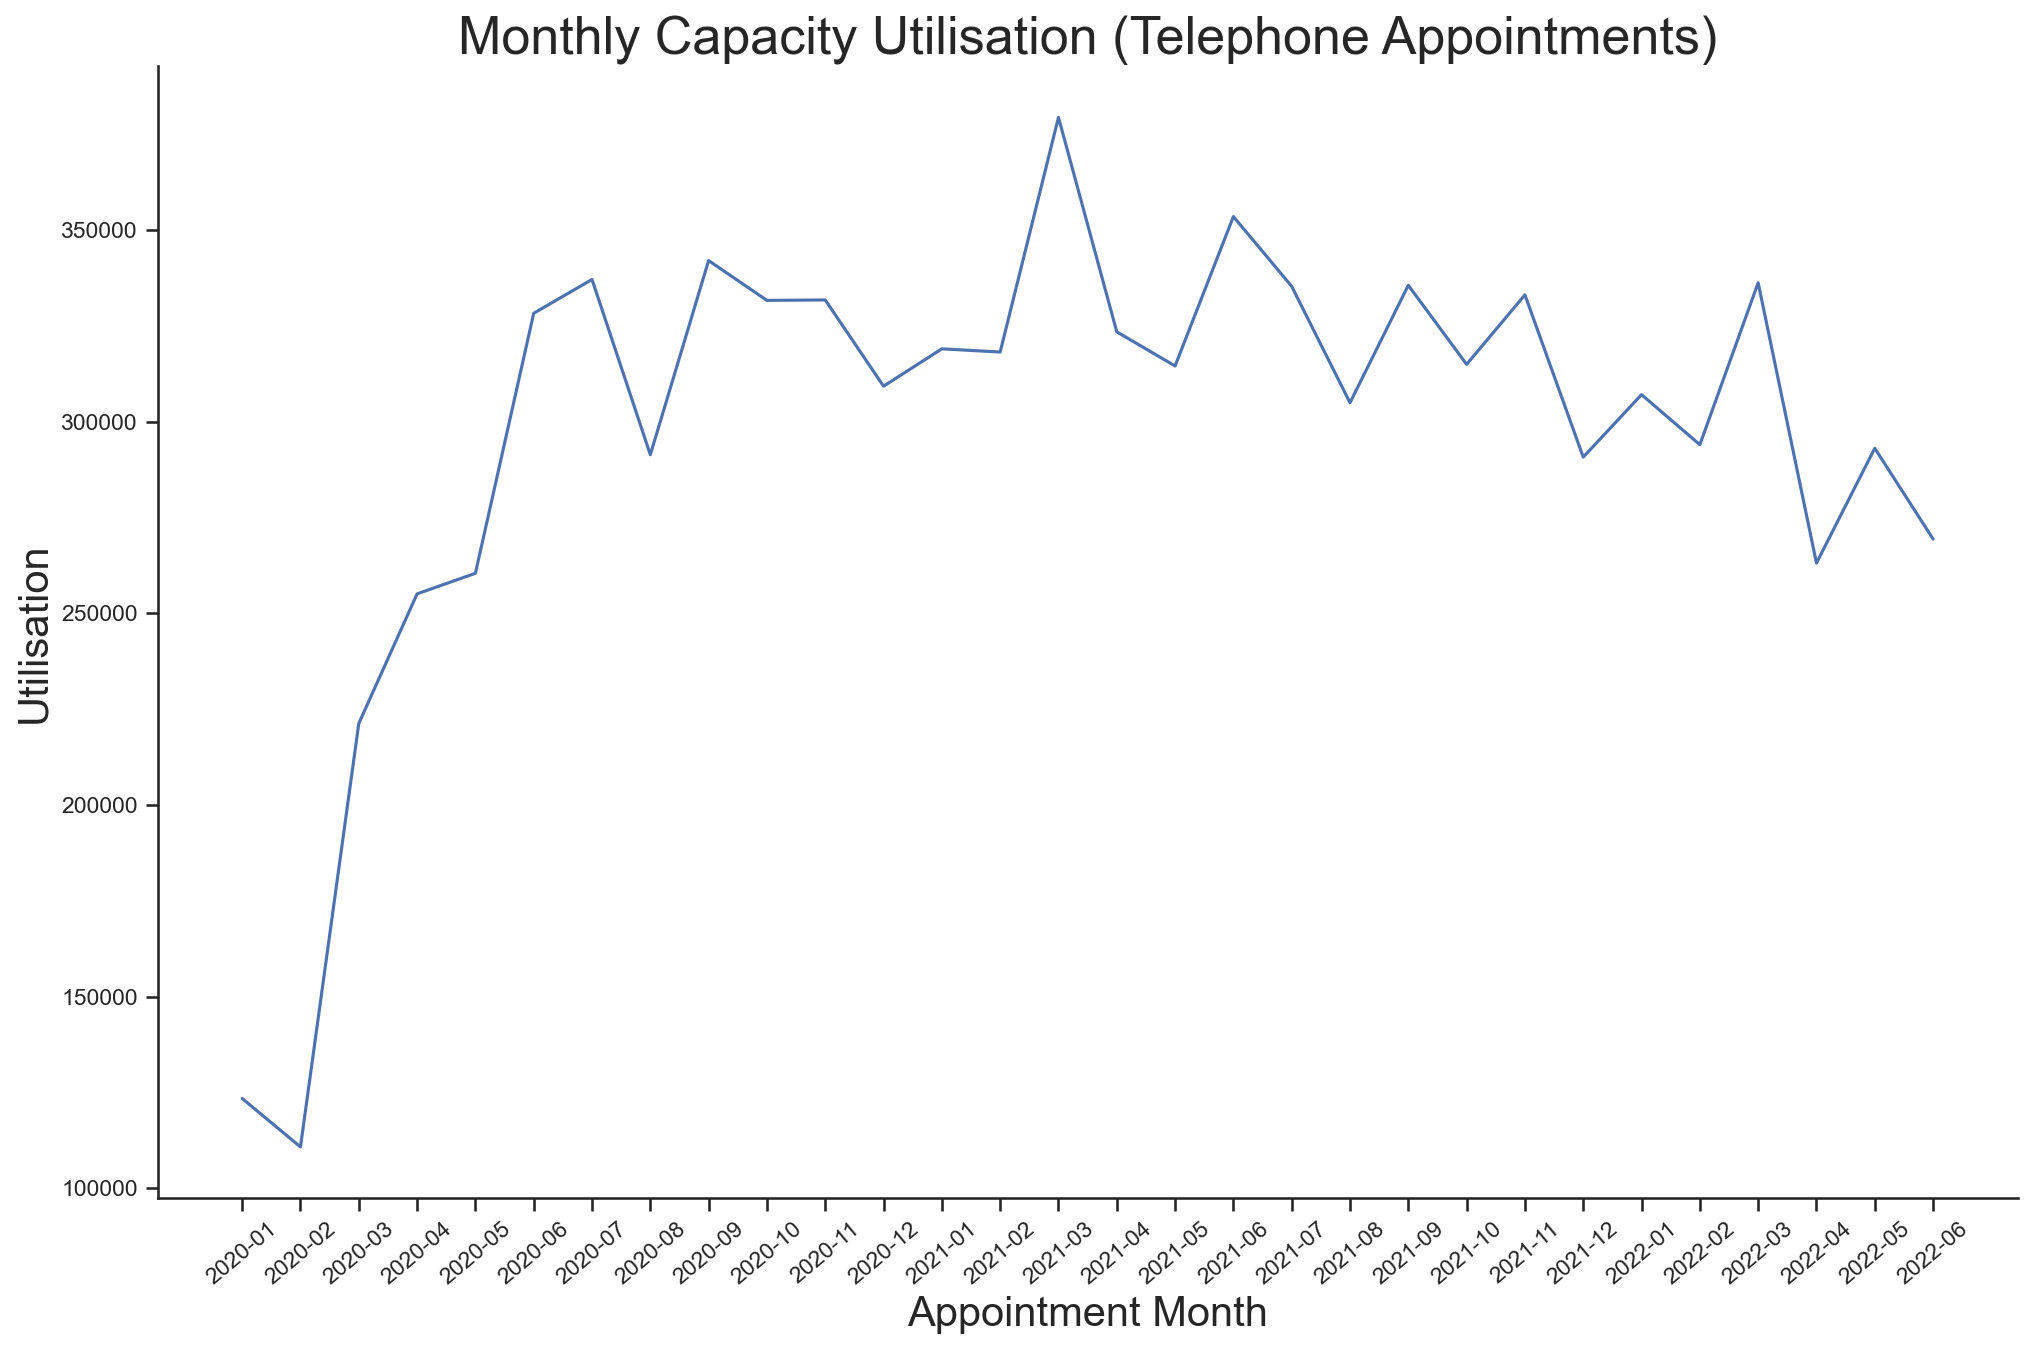

In [87]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'utilisation',
             data = ar_sub_2[ar_sub_2['appointment_mode'] == 'Telephone'])

# Format figure attributes.
plt.title('Monthly Capacity Utilisation (Telephone Appointments)',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Utilisation', fontsize = 20)
sns.set_style('ticks')
plt.xticks(rotation=40)
sns.despine()

I also thought it pertinent to display the NHS resource utilisation using the larger data set within the **National Categories** DataFrame, which highlights, quite starkly, the demands on the NHS during the busiest months.

In [88]:
# Create a new DataFrame with only the appointment month
# and the aggregated sum of appointments.
nc_sub = nc.groupby('appointment_month')\
         ['count_of_appointments'].agg('sum').reset_index()

# Add a column to the new DataFrame indicating the average
# utilisation of service per day.
nc_sub['utilisation'] = nc_sub.count_of_appointments / 30

# Round the output to 2 decimal places.
nc_sub['utilisation'] = nc_sub['utilisation'].round(decimals = 1)

# View the output.
nc_sub.sort_values(by = 'utilisation', ascending = False)

appointment_month  count_of_appointments  utilisation
3            2021-11               30405070    1013502.3
2            2021-10               30303834    1010127.8
7            2022-03               29595038     986501.3
1            2021-09               28522501     950750.0
9            2022-05               27495508     916516.9
10           2022-06               25828078     860935.9
5            2022-01               25635474     854515.8
6            2022-02               25355260     845175.3
4            2021-12               25140776     838025.9
8            2022-04               23913060     797102.0
0            2021-08               23852171     795072.4

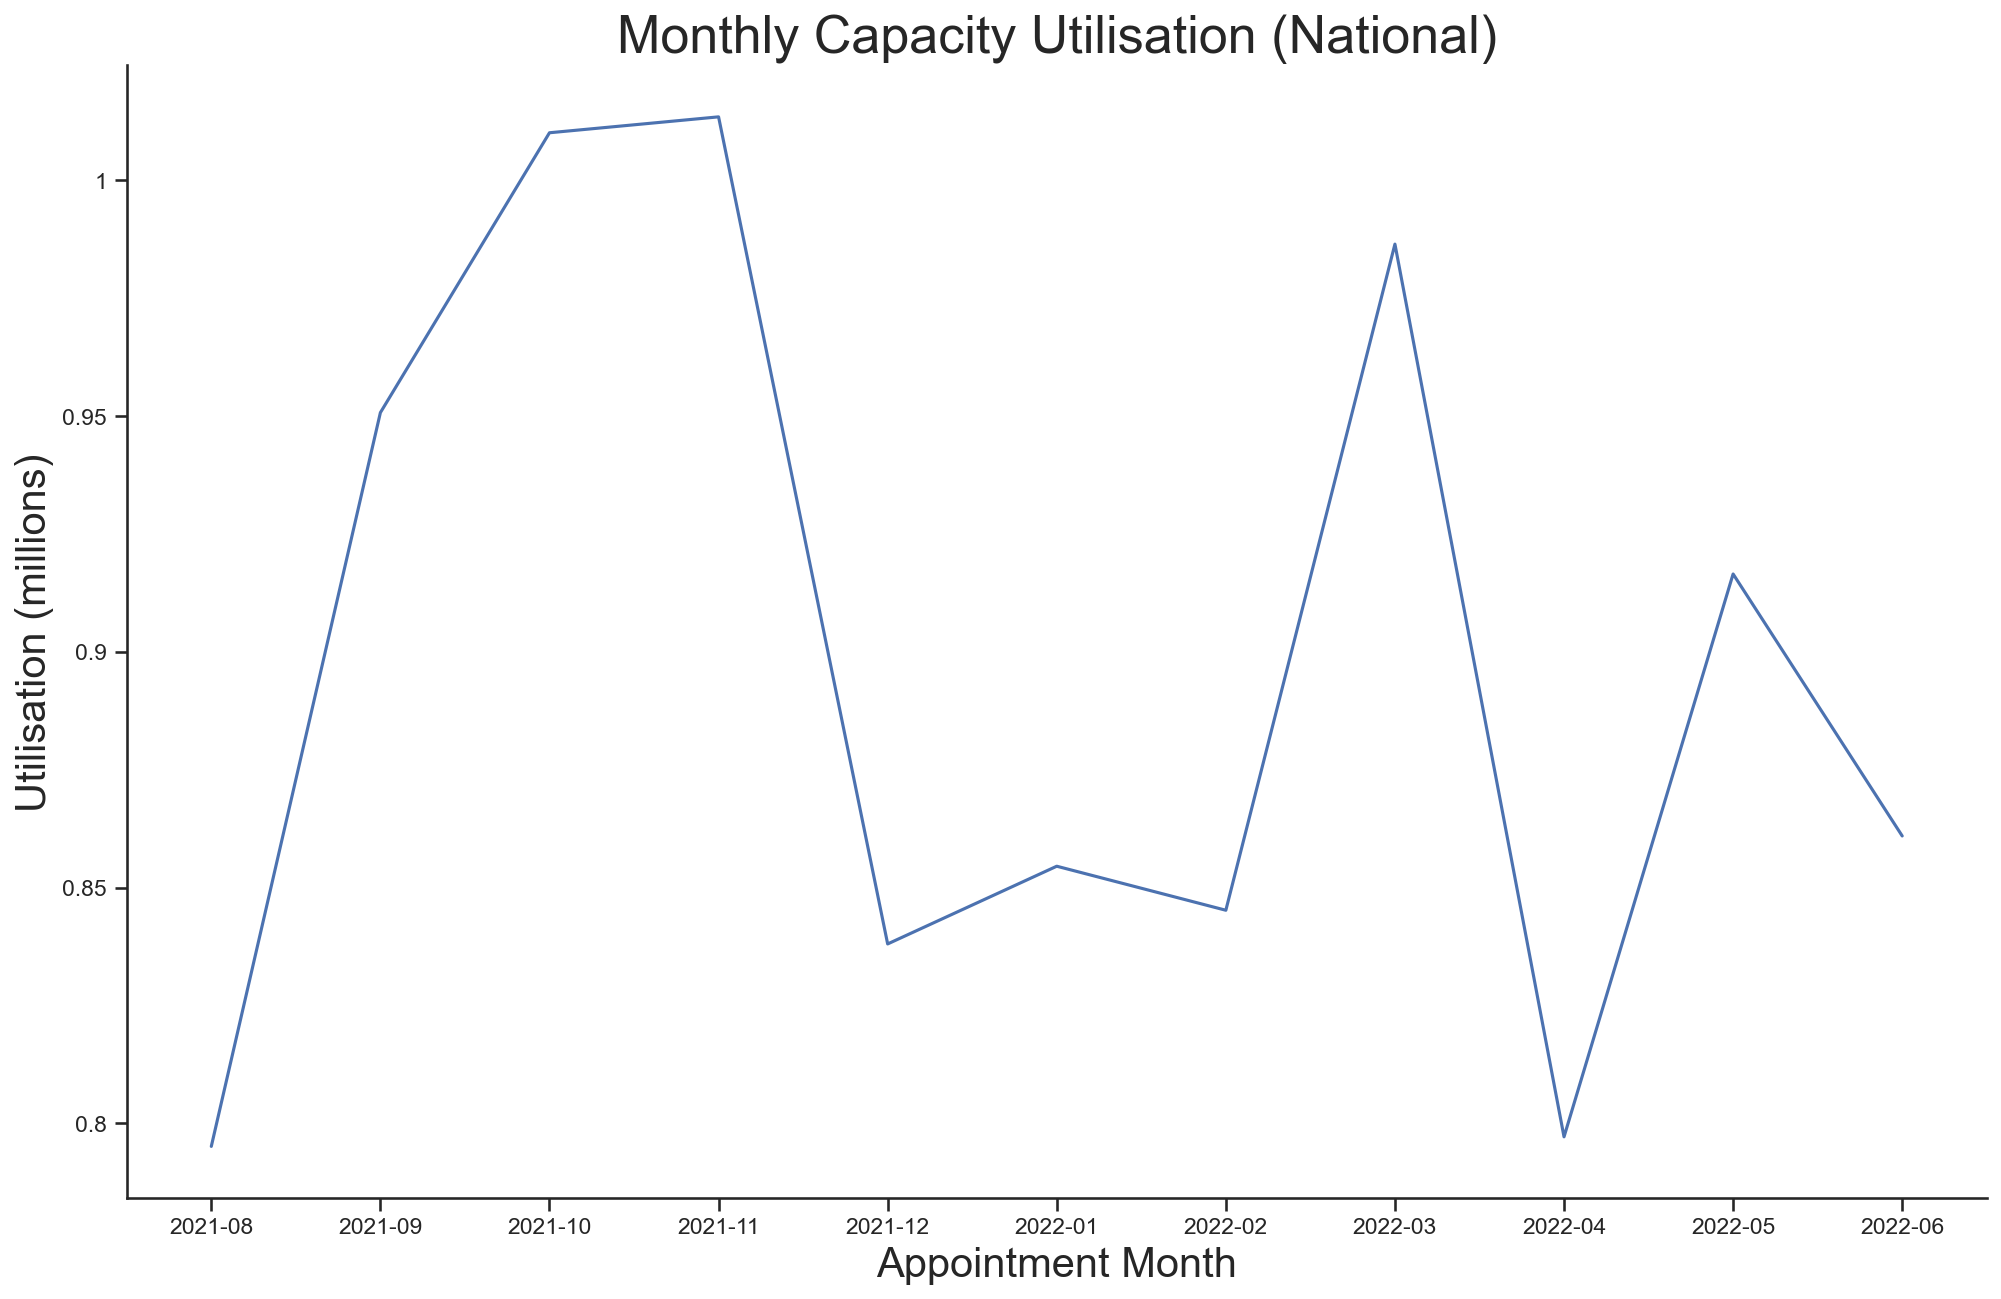

In [89]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'utilisation',
             data = nc_sub)

# Format figure attributes.
plt.title('Monthly Capacity Utilisation (National)',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Utilisation (millions)', fontsize = 20)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

### <div align="center"> Display the proportion of appointments in relation to the time between booking and appointment.

In [90]:
# Create a subset of the ar DataFrame, aggregating the
# 'time_between_book_and_appointment' and count_of_appointments.
ar_book = ar.groupby(['time_between_book_and_appointment',
                      'appointment_month'])\
                     ['count_of_appointments'].agg('sum').reset_index()

# Determine the unique category names for the
# 'time_between_book_and_appointment' column.
ar_book['time_between_book_and_appointment'].unique()

array(['1 Day', '15  to 21 Days', '2 to 7 Days', '22  to 28 Days',
       '8  to 14 Days', 'More than 28 Days', 'Same Day',
       'Unknown / Data Quality'], dtype=object)

In [91]:
# Convert the values in the subset to categorical.
ar_book['time_between_book_and_appointment'] =\
        pd.Categorical(ar_book['time_between_book_and_appointment'],
                       ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days',
                        '15  to 21 Days', '22  to 28 Days', 'More than 28 Days',
                        'Unknown / Data Quality'])

# View the data types.
print(ar_book.dtypes)

time_between_book_and_appointment    category
appointment_month                      object
count_of_appointments                   int64
dtype: object


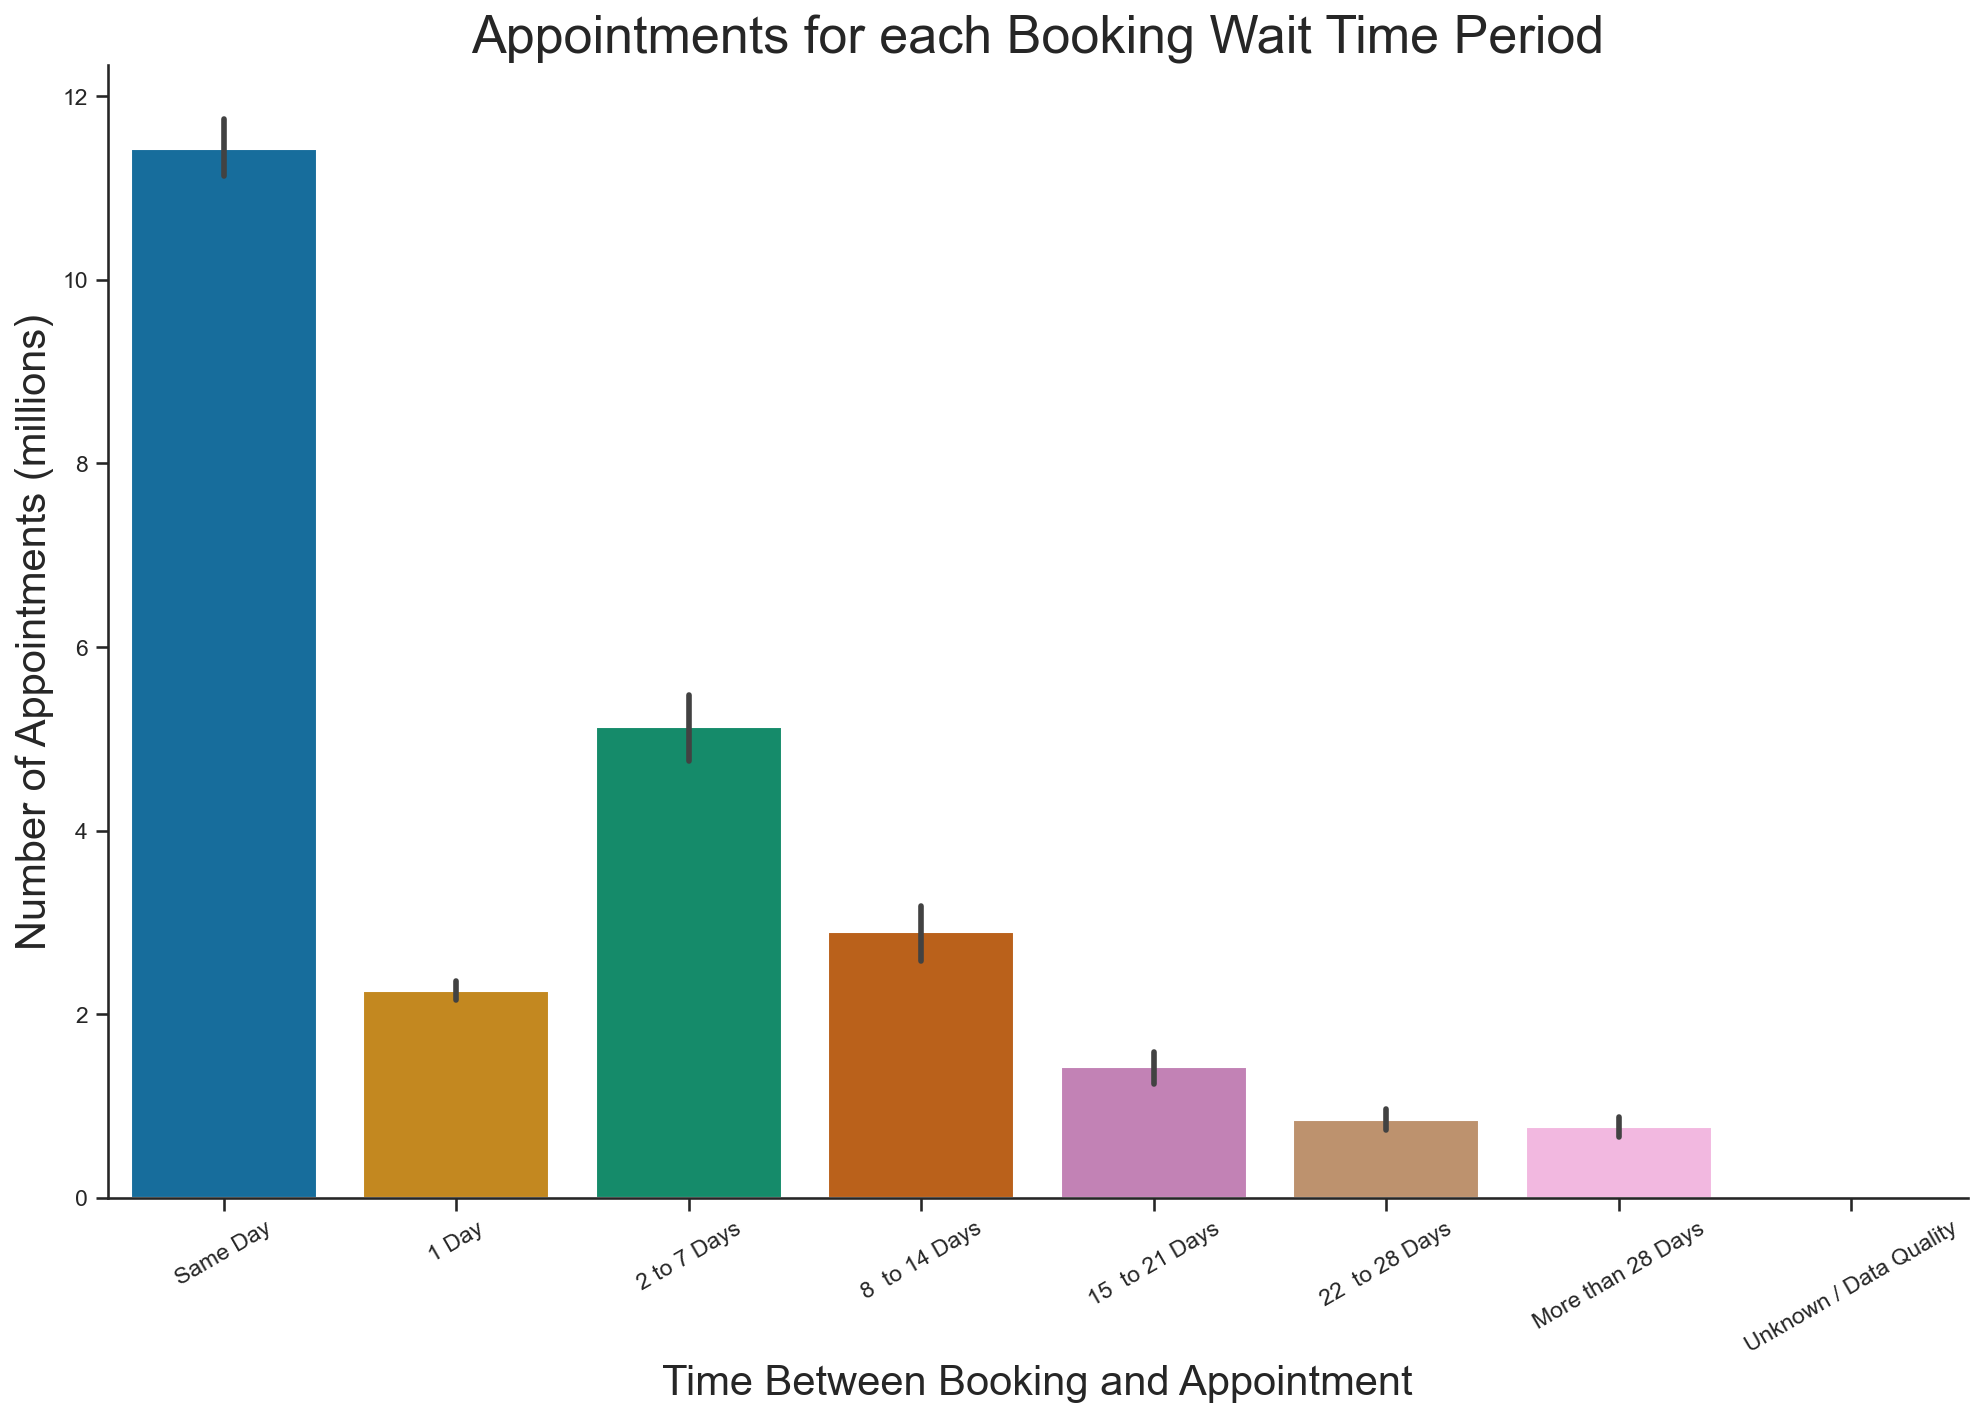

In [92]:
# Use the unique category values to create a chronological order.
my_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days',
            '15  to 21 Days', '22  to 28 Days', 'More than 28 Days',
            'Unknown / Data Quality']

# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a bar plot.
sns.barplot(x = 'time_between_book_and_appointment',
            y = 'count_of_appointments',
            data = ar_book, order = my_order,
            palette = 'colorblind')

# Format figure attributes.
plt.title('Appointments for each Booking Wait Time Period',
          fontsize = 25)
plt.xlabel('Time Between Booking and Appointment', fontsize = 20)
plt.ylabel('Number of Appointments (millions)', fontsize = 20)
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

We can see that there is a trend of most appointments being booked for the same day, with fewer being booked as the wait time increases.

### <div align="center"> Display the change in time between booking and appointment over time.

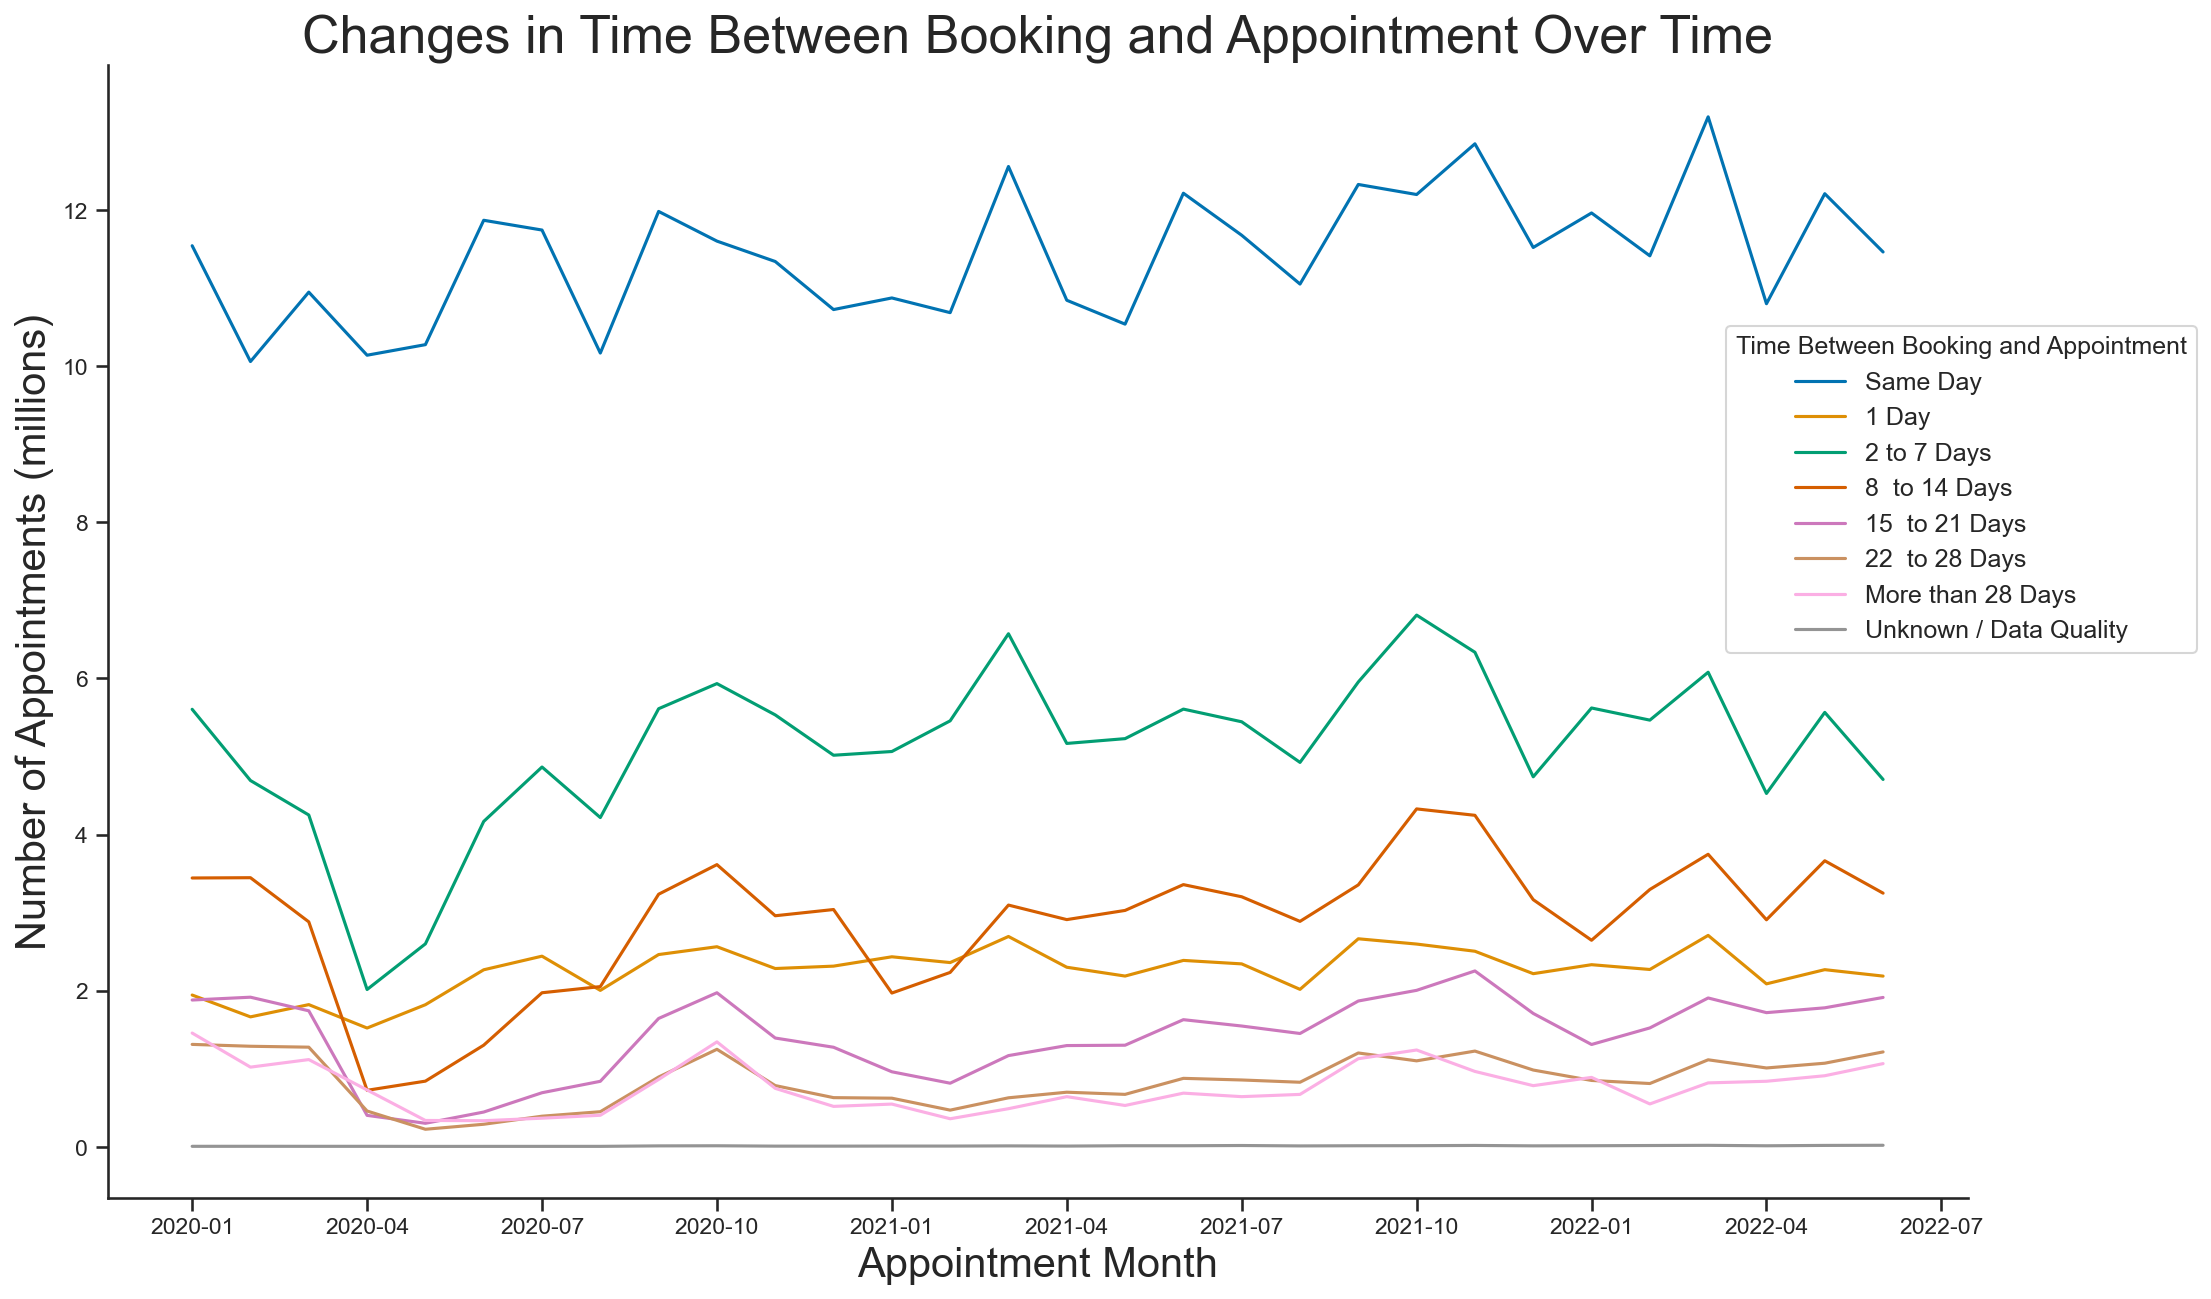

In [93]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
             hue = 'time_between_book_and_appointment',
             hue_order = my_order,
             palette = 'colorblind',
             data = ar_book)

# Format figure attributes.
plt.title('Changes in Time Between Booking and Appointment Over Time',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Number of Appointments (millions)',
           fontsize = 20)
plt.legend(title = 'Time Between Booking and Appointment',
           fontsize = 12,
           bbox_to_anchor = (.87, .77), loc = 'upper left',
           borderaxespad = 0)
plt.xticks(['2020-01', '2020-04', '2020-07', '2020-10',
            '2021-01', '2021-04', '2021-07', '2021-10',
            '2022-01', '2022-04', '2022-07'])
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

# Save the plot.
fig.savefig('Changes in Time Between Booking and Appointment Over Time.jpg')

We can see that for the categories where the time between booking and appointment is less, the number of appointments see more dramatic increases and decreases.
   - This may be due to the constant changing nature of the COVID-19 pandemic, with regards to how severe people may view their health issues in relation to the virus.
   
- Was appointment attendance affected by the time between booking and appointment?

### <div align="center"> Display the proportion of appointment status in relation to the time between booking and appointment.

In [94]:
# Create a subset of the ar DataFrame, aggregating the
# time_between_book_and_appointment and count_of_appointments.
ar_book_2 = ar.groupby(['time_between_book_and_appointment',
                        'appointment_status'])\
                       ['count_of_appointments'].agg('sum').reset_index()

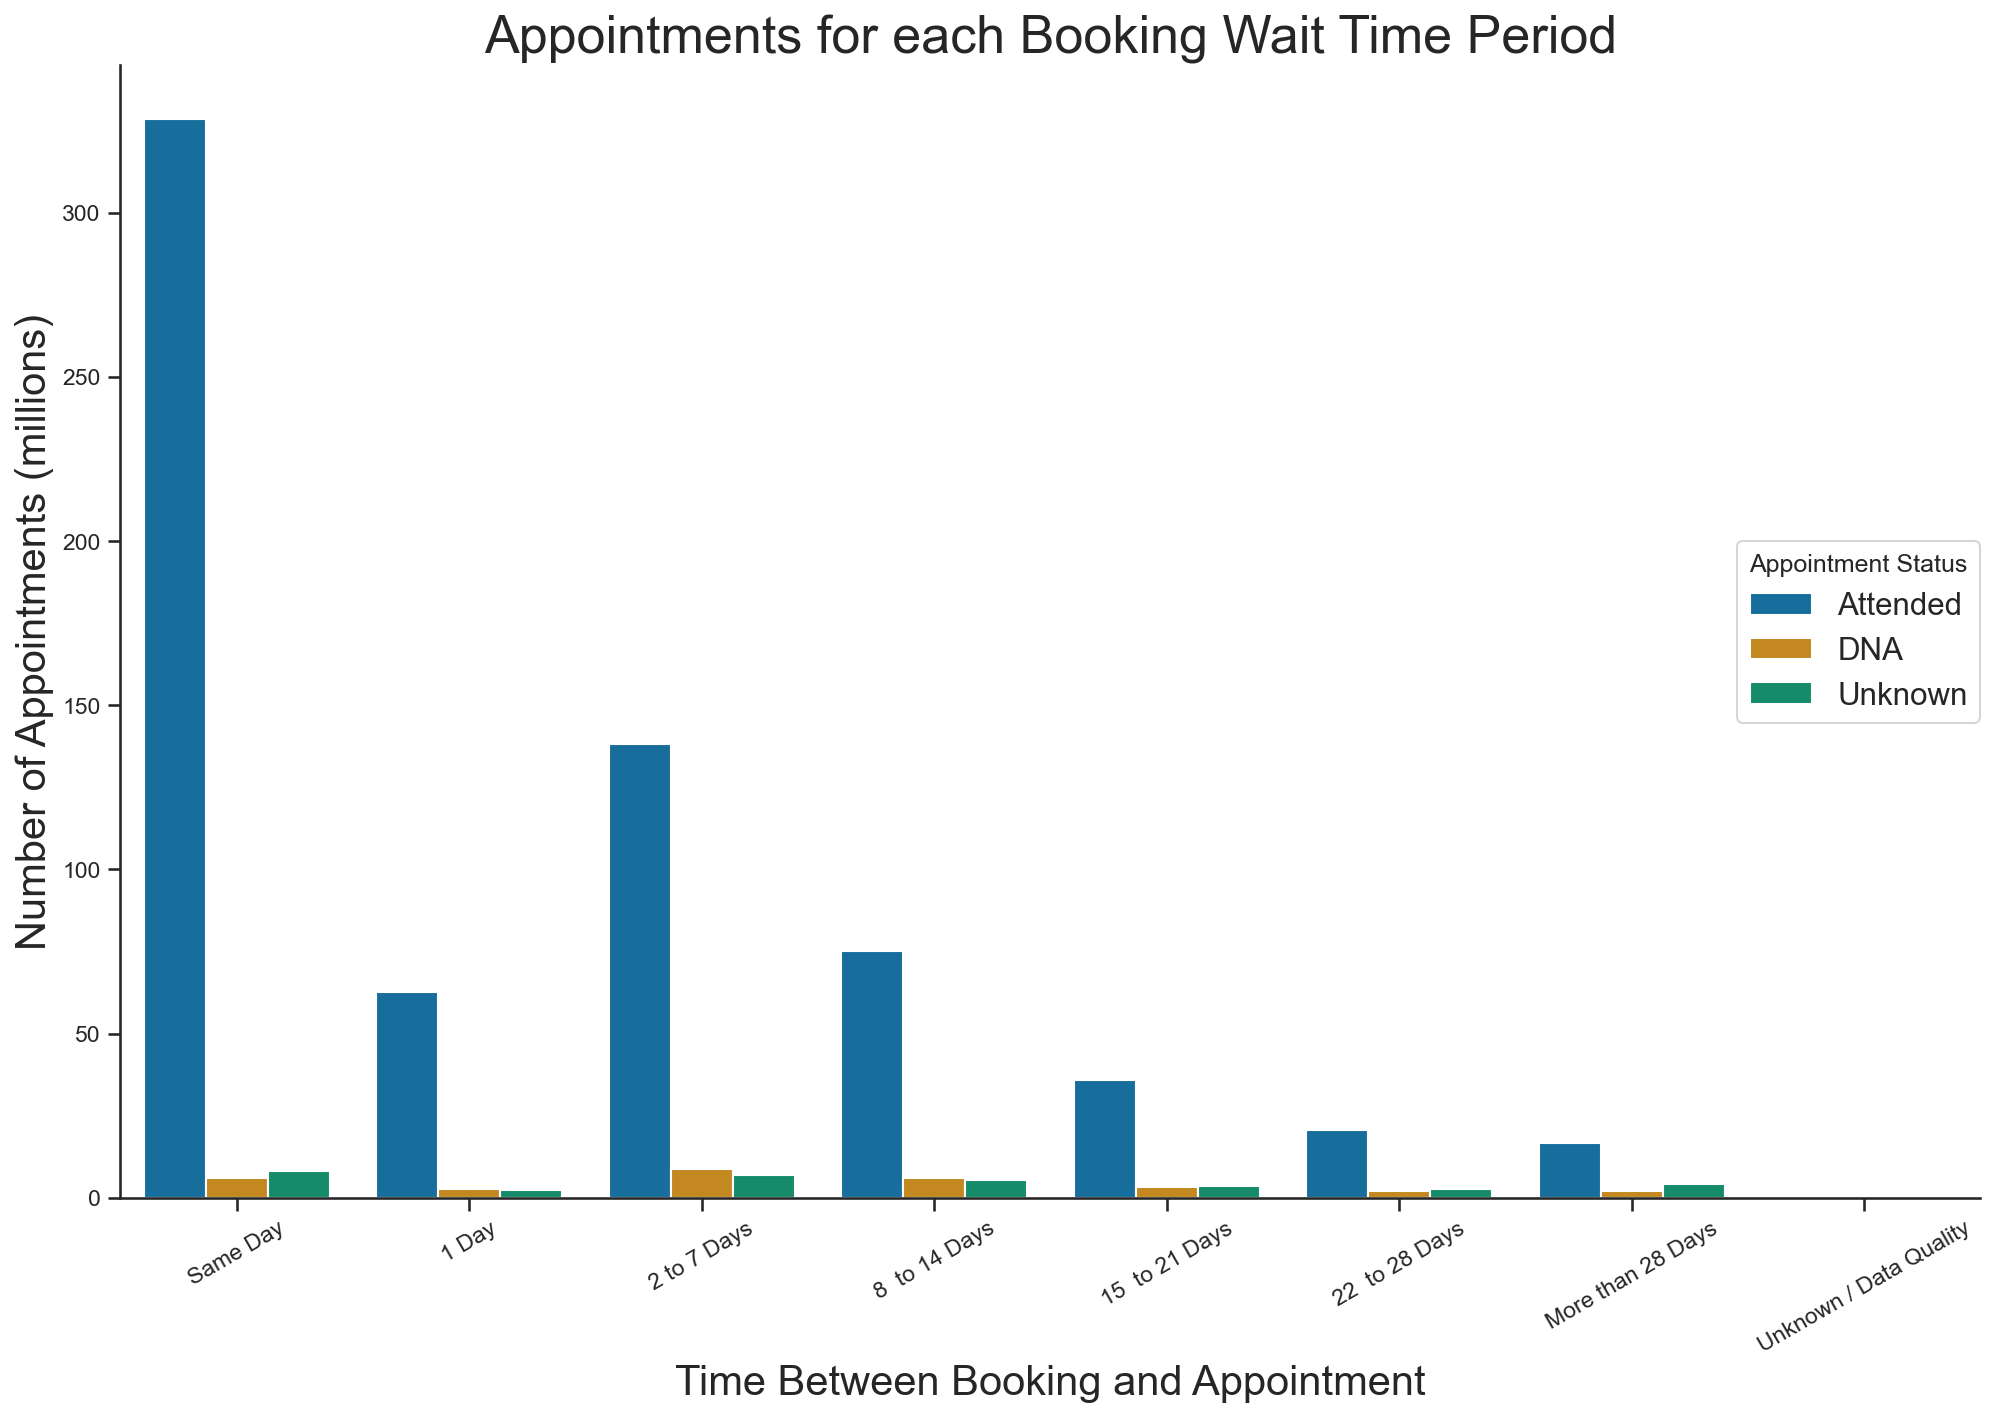

In [95]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a bar plot.
sns.barplot(x = 'time_between_book_and_appointment',
            y = 'count_of_appointments', hue = 'appointment_status',
            order = my_order, palette = 'colorblind',
            data = ar_book_2)

# Format figure attributes.
plt.title('Appointments for each Booking Wait Time Period',
          fontsize = 25)
plt.xlabel('Time Between Booking and Appointment', fontsize = 20)
plt.ylabel('Number of Appointments (millions)', fontsize = 20)
plt.legend(title = 'Appointment Status', fontsize = 15,
           loc = 'right', borderaxespad = 0)
plt.xticks(rotation = 30)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

There doesn't appear to be any significant trends with regards to appointment status and the time between booking and appointment.

### <div align="center"> What is the distribution of appointments between the appointment status categories?

In [96]:
# Create a subset of the ar DataFrame, aggregating the
# appointment status with count of appointments.
ar_status = ar.groupby('appointment_status')\
            ['count_of_appointments'].agg('sum').reset_index()

# Sort the subset DataFrame to see the highest number of appointments.
ar_status.sort_values(by = 'count_of_appointments', ascending = False)

appointment_status  count_of_appointments
0           Attended              677755876
2            Unknown               34137416
1                DNA               30911233

There are more appointment statuses recorded as **Unknown** than **DNA (Did Not Attend)**.
- Why is this?
    - Could it be due to poor data collection? Was data collection only poor during the months recorded in these datasets?
        - Perhaps analysing data of this nature from preceding and succeeding months could answer this question.

In [97]:
# Create a subset of the ar DataFrame using
# appointment_month and appointment_status.
ar_month_stat = ar.groupby(['appointment_month', 'appointment_status'])\
                        ['count_of_appointments'].agg('sum').reset_index()

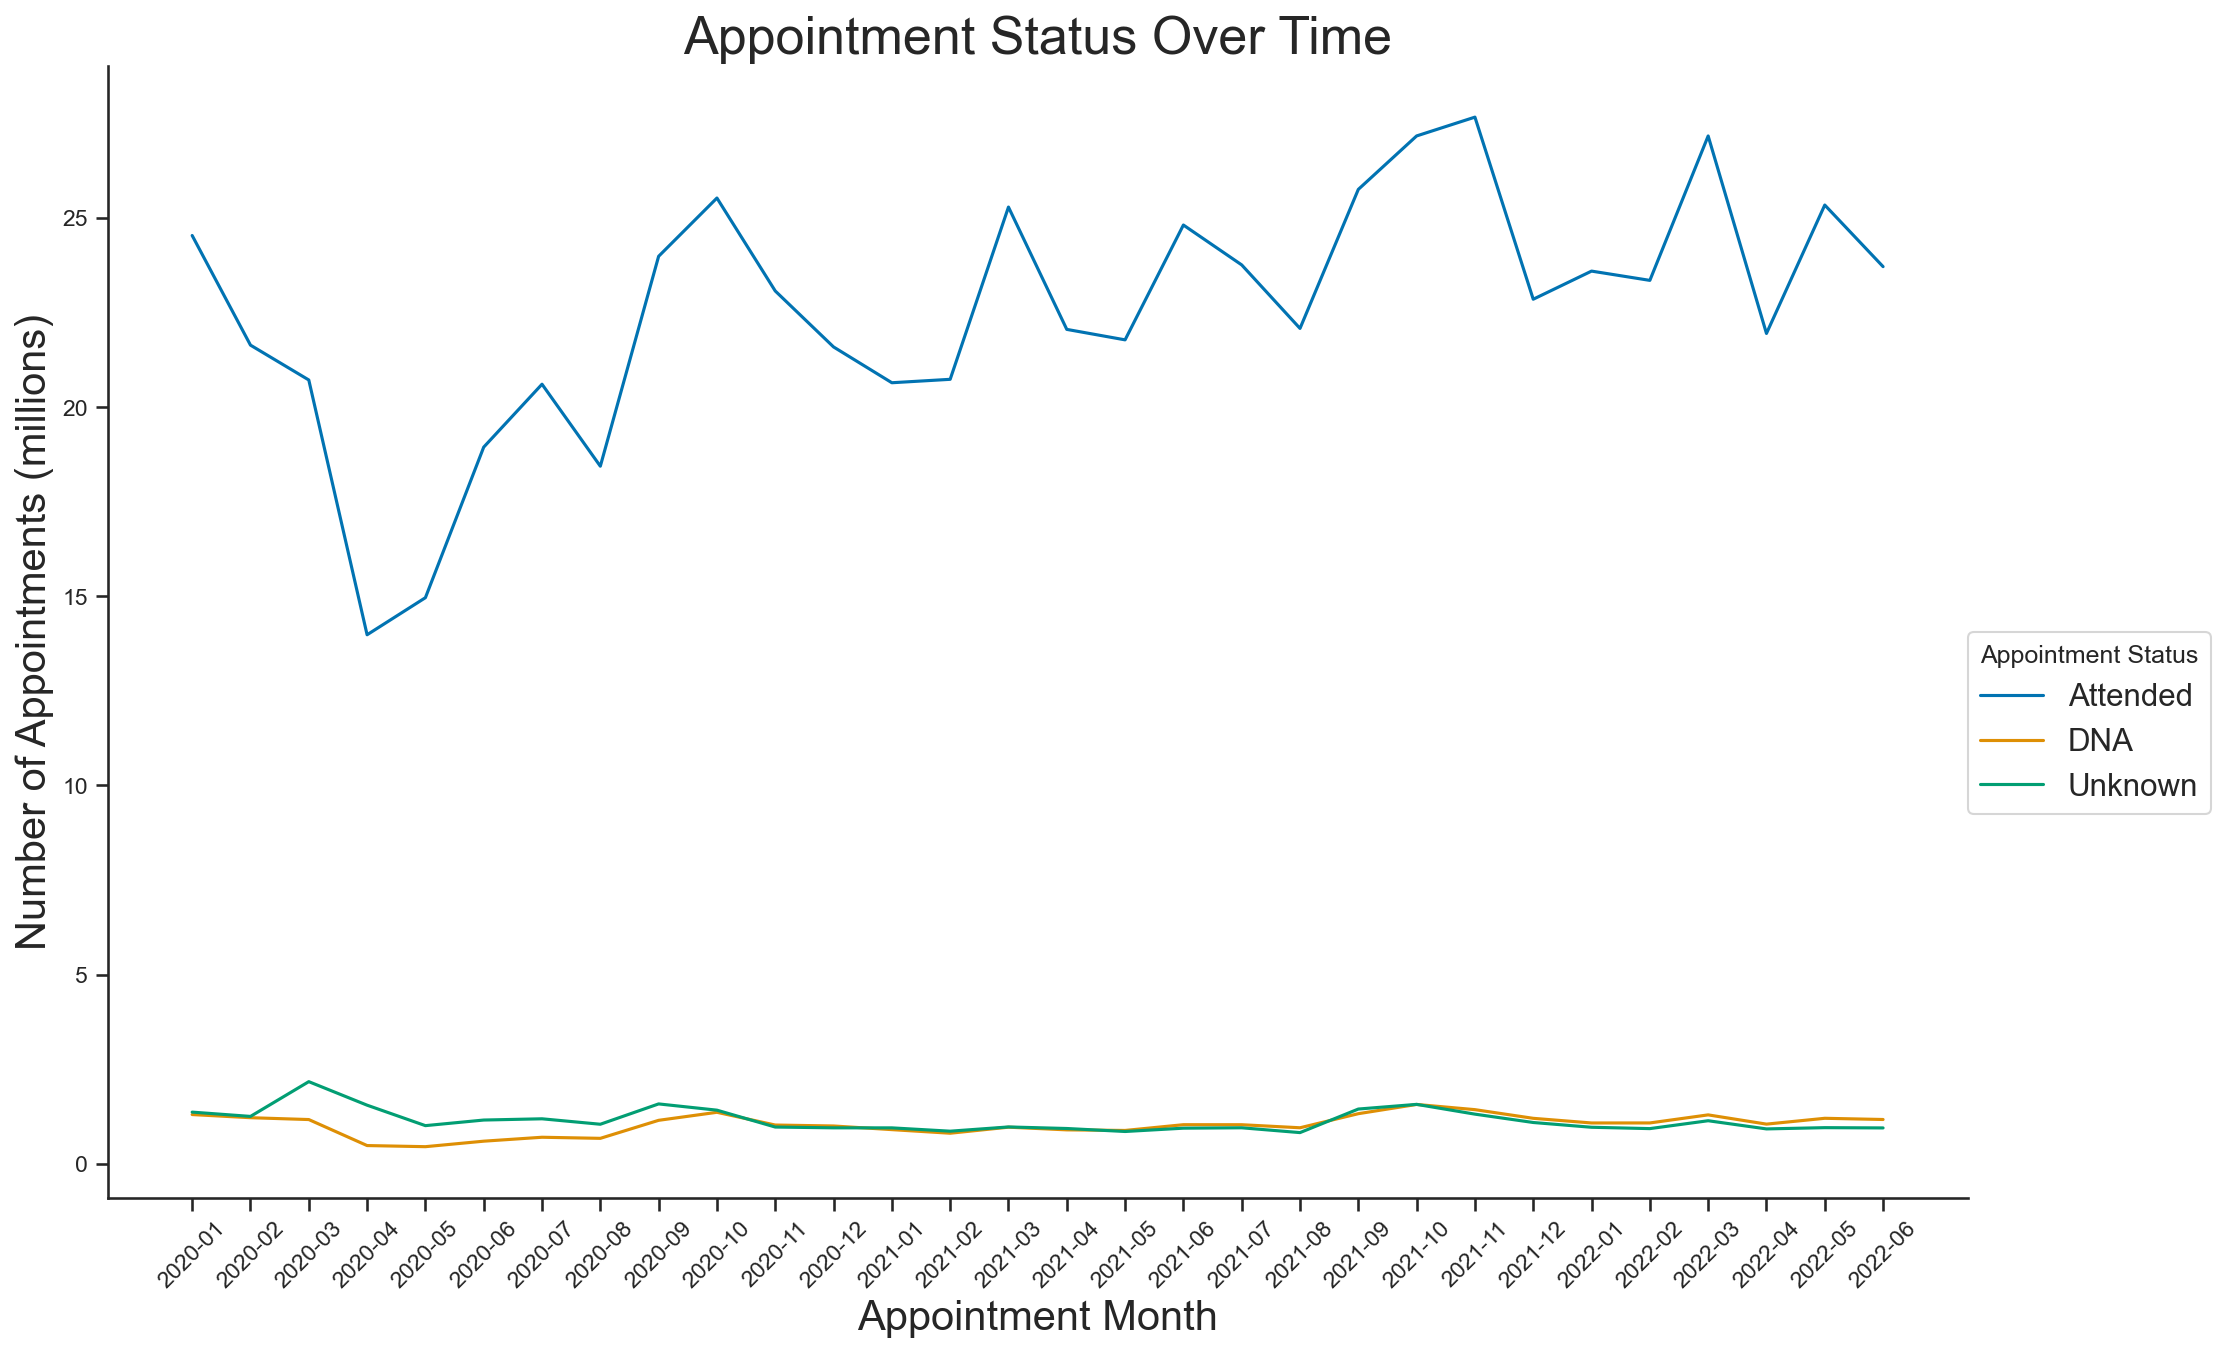

In [98]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Create a line plot.
sns.lineplot(x = 'appointment_month', y = 'count_of_appointments',
            hue = 'appointment_status', ci = None,
            palette = 'colorblind',
            data = ar_month_stat)

# Format figure attributes.
plt.title('Appointment Status Over Time',
          fontsize = 25)
plt.xlabel('Appointment Month', fontsize = 20)
plt.ylabel('Number of Appointments (millions)', fontsize = 20)
plt.legend(title = 'Appointment Status', fontsize = 15,
           bbox_to_anchor = (1, .5), loc = 'upper left',
           borderaxespad = 0)
plt.xticks(rotation = 45)
ax.yaxis.set_major_formatter(ticks_y)
sns.despine()

There is a higher proportion of **DNA** and **Unknown** in **September** and **October** in both **2020** and **2021**.
   - These are the busier months for the NHS.
       - Could this trend be due to appointment cancellations or reschedules?
   
There is a significant spike in the **Unknown** category in **March 2020**.
   - This lack of record documentation could be due to the NHS being under significant pressure during March 2020 with the outbreak of COVID-19 in the UK and thee newly-introduced lockdown.

# <div align="center"> Twitter data

In [99]:
# Set the maximum column width to display.
pd.options.display.max_colwidth = 200

In [100]:
# View the tweets DataFrame.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [101]:
# Explore the overview of the DataFrame.
print(tweets.info())

# View descriptive statistics of retweets and favourites.
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB
None


tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

In [102]:
# Assess the value counts for how many times tweets were retweeted.
tweets.value_counts('tweet_retweet_count', ascending = False)

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
53       5
10       5
63       4
44       4
150      4
85       3
41       3
76       3
62       3
207      3
68       3
24       2
23       2
72       2
78       2
16       2
107      1
79       1
169      1
39       1
57       1
54       1
49       1
48       1
40       1
20       1
19       1
15       1
14       1
13       1
303      1
dtype: int64

In [103]:
# Assess the value counts for how many times tweets were favourited.
tweets.value_counts('tweet_favorite_count', ascending = False)


tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
13       1
28       1
20       1
18       1
17       1
14       1
10       1
12       1
11       1
9        1
8        1
7        1
42       1
dtype: int64

**Retweet** is a more utilised feature of twitter than **Favourite** and these statistics show that to be true.
   - While it is certainly worth looking at them both, the **retweet** column would perhaps provide more insight.

In [104]:
# Order the DataFrame by retweet counts.
tweets_re = tweets.sort_values(['tweet_retweet_count'], ascending = False)

tweets_re

tweet_id  \
263   1567649792897032192   
1139  1567585317498003456   
985   1567594301978288130   
330   1567644141726703617   
595   1567621342987718656   
...                   ...   
565   1567623549929783297   
566   1567623492689960960   
569   1567623284690395136   
570   1567623035770765312   
587   1567621978911133697   

                                                                                                                                                                                              tweet_full_text  \
263                                                           RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…   
1139                                                             RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
985                                                              RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
330                                                              RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
595                                                              RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
...                                                                                                                                                                                                       ...   
565   Do you enjoy helping patients reach their goals? Let us help you reach yours! We are hiring for a Occupational Therapist - PRN in Winchester, MA to join our dedicated team of #healthcare and #reha...   
566                                                  Medicare Advantage lobby rebuts senator’s inquiry into ‘potentially deceptive’ marketing tactics https://t.co/ceexJGDGOx via @healthcaredive #healthcare   
569                                                                                                     Interested in a job in #Hillsboro, TX? This could be a great fit: https://t.co/7QE4K131jE #Healthcare   
570                                                         @CP24 Privatization erodes universal #healthcare &amp; clogs public system/arteries, just like #Highway407 vs 401 #onpoli https://t.co/Kc10FoF1s0   
587   @CBCHereandNow  so the @angusreidorg finding is that we r feeling that our system is getting worse while Americans feel theirs is getting better - VERY diff than we thinking our #healthcare system...   

                                                                                                                                                                                               tweet_entities  \
263   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': "Ultima Lions' Den", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...   
1139  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
985   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
330   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
595   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', '

Looking at **tweets_re** we can immediately see what looks like duplicate tweets. Therefore I decided to investigate to determine if there are in fact absolute duplicates using the **tweet_full_text** and **tweet_id** columns.

In [105]:
# Create a new DataFrame and use the .duplicated() function to find duplicates.
tweets_duplicated = tweets[tweets['tweet_full_text'].duplicated()]

tweets_duplicated.shape

(213, 10)

In [106]:
# Create a new DataFrame and use the .duplicated() function to find duplicates.
tweets_duplicated_id = tweets[tweets['tweet_id'].duplicated()]

tweets_duplicated_id.shape

(0, 10)

Even though the second code snippet reveals there to be no duplicates for **tweet_id**, tweet IDs are not unique identifiers in the sense that each belongs to a unique account or individual.

Tweet IDs incorporate a time-stamp digit sequence and, therefore, it may still be assumed that there are duplicates in the Data Set.
   - [Twitter IDs](https://developer.twitter.com/en/docs/twitter-ids#:~:text=Today%2C%20Twitter%20IDs%20are%20unique,number%2C%20and%20a%20sequence%20number.)

#### Remove Duplicates

In [107]:
# Before removing duplicates, check that the 'tweet_full_text' column
# does not have any mixed data types that could prevent .drop_duplicates()
# from working.
def check_obj_columns(dfx):
    tdf = tweets.select_dtypes(include = ['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column '{}' has mixed object types.".format(col))

# Check for mixed data types in the DataFrame.
check_obj_columns(tweets)

Column 'tweet_entities_hashtags' has mixed object types.


In [108]:
# Drop the duplicates.
                      # subset = tells Python to look specifically in the tweet_full_text column.
                                                                  # inplace = True tells Python to apply the
                                                                  # duplicate drop to the original DataFrame.
tweets.drop_duplicates(subset = 'tweet_full_text', keep = 'first', inplace = True)

In [109]:
# Check that the duplicates have been dropped.
tweets_duplicated = tweets[tweets['tweet_full_text'].duplicated()]

tweets_duplicated.shape

(0, 10)

In [110]:
# Order the amended DataFrame by retweet counts.
tweets_re = tweets.sort_values(['tweet_retweet_count'], ascending = False)

tweets_re

tweet_id  \
263   1567649792897032192   
27    1567581274088566785   
1130  1567585858546532355   
779   1567609685074759686   
790   1567609182001545221   
...                   ...   
530   1567626668692635648   
531   1567626499850752001   
533   1567626388143759361   
535   1567626223874101248   
1172  1567582892892782592   

                                                                                                                                                                                              tweet_full_text  \
263                                                           RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…   
27                                                               RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
1130                                                           RT @imedverse: I.V Drug Calculations Cheat Sheet\n\n@Pharma_Connect @imedverse #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicar…   
779                                                          RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…   
790                                                           RT @Khulood_Almani: #Healthcare #DigitalTransformation Starts with This 6⃣Step Process\n\nv/@uptophealth\n#digitalhealth #AI #Python #DataScie…   
...                                                                                                                                                                                                       ...   
530   We provide fast, friendly service and offer various convenient options to ensure you get the prescriptions you need when you need them. \n\nContact us today!\nhttps://t.co/R3R4Xjw7N0\nCall 📞(215) ...   
531                                                                               @drscottjensen your new add is an actual joke. YOU have chosen to weaponize the issue of #healthcare in more ways than one.   
533   The different types of TeleHealth\n\nhttps://t.co/lpmztfyUCv\n\n#telehealth #telemedicine #healthcare #nyc #therapy #primarycare  #home #digitalhealth #covid19 #usa #selfcare #coronavirus #photoof...   
535   Are you looking for a rewarding career that values you as an individual and welcomes your ideas for continuous improvement? You can find it at Thompson Health! Join us today! Patient Care Technici...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   

                                                                                                                                                                                               tweet_entities  \
263   {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'UltimaLionsDen', 'name': "Ultima Lions' Den", 'id': 973581329119039488, 'id_str': '973581329119039488', 'indices': [3, 18]}], 'ur...   
27    {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
1130  {'hashtags': [{'text': 'TipsForNewDocs', 'indices': [77, 92]}, {'text': 'MedEd', 'indices': [93, 99]}, {'text': 'MedTwitter', 'indices': [100, 111]}, {'text': 'medicine', 'indices': [112, 121]}, {...   
779   {'hashtags': [{'text': 'Applications', 'indices': [21, 34]}, {'text': 'AI', 'indices': [38, 41]}, {'text': 'healthcare', 'indices': [45, 56]}, {'text': 'digitalhealth', 'indices': [76, 90]}, {'tex...   
790   {'hashtags': [{'text': 'Healthcare', 'indices': [20, 31]}, {'text': 'DigitalTransformation', 'indices': [32,

In [111]:
# Order the amended DataFrame by favourite counts.
tweets_fav = tweets.sort_values(['tweet_favorite_count'], ascending = False)

tweets_fav

tweet_id  \
1156  1567583855422611461   
9     1567582427719282689   
442   1567634936341069826   
84    1567579049043832832   
1122  1567586306607423488   
...                   ...   
403   1567637865882058752   
407   1567637856184840194   
408   1567637842511159296   
409   1567637733237047298   
569   1567623284690395136   

                                                                                                                                                                                              tweet_full_text  \
1156  Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...   
9                                                                                                                        You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥   
442                                                                                                                    How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb   
84    Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...   
1122  Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...   
...                                                                                                                                                                                                       ...   
403                                                              RT @VizientInc: Many #healthcare organizations have committed to helping newly licensed #nurses transition from students to professionals v…   
407                                                              RT @_timos_: iECURE Receives FDA Orphan Drug Designation for GTP-506, an Investigational Gene Editing Product Candidate for the Treatment o…   
408                                                              RT @childrensasthma: More #learning today … #supervision #healthcare #model @jill67lockhart @moragdixon @TrudiMarshall1 @VictoriaCauser htt…   
409   It’s official - CommunityMed is now open in Heath, TX!\nWe are located at 529 Laurence Dr. in front of Tom Thumb grocery store. Register online for your visit at https://t.co/4SJJnzdUa5\n\n#health...   
569                                                                                                     Interested in a job in #Hillsboro, TX? This could be a great fit: https://t.co/7QE4K131jE #Healthcare   

                                                                                                                                                                                               tweet_entities  \
1156  {'hashtags': [{'text': 'TipsForNewDocs', 'indices': [22, 37]}, {'text': 'MedEd', 'indices': [38, 44]}, {'text': 'MedTwitter', 'indices': [45, 56]}, {'text': 'medicine', 'indices': [57, 66]}, {'tex...   
9     {'hashtags': [{'text': 'Healthcare', 'indices': [33, 44]}], 'symbols': [{'text': 'JCO', 'indices': [14, 18]}, {'text': 'DAG', 'indices': [76, 80]}], 'user_mentions': [{'screen_name': '_JennyCo', '...   
442   {'hashtags': [{'text': 'comedy', 'indices': [31, 38]}, {'text': 'adulting', 'indices': [39, 48]}, {'text': 'healthcare', 'indices': [49, 60]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'med...   
84                                                    {'hashtags': [{'text': 'healthcare', 'indices': [22, 33]}, {'text': 'cdnpoli', 'indices': [270, 278]}], 'symbols': [], 'user_mentions': [], 'urls': []}   
1122  {'hashtags': [{'text': 'TipsForNewDocs', 'indices': [64, 79]}, {'text': 'MedEd', 'indices': [80, 86]}, {'tex

In [112]:
# Create a new DataFrame with only text values.
tweets_text = tweets['tweet_full_text']

tweets_text.head()

0    As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...
1                                                                RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…
2                                                             RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3                                                               RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4    ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take 

In [113]:
# Create variable with an empty list.
tags = []

# Use a for loop and specify the iterator_variable and the sequence.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())

# Create a Pandas Series to count the values in the list.
# Set the Series equal to tags.
tweets_text = pd.Series(tags)

# View the hashtags list.
tags

['#healthcare',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '🚨#new:🚨',
 'look!\n\n#blogs',
 '#digitaltransformation',
 '#cybersecurity',
 '#accounting',
 '#finance',
 '#healthcare',
 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna',
 '#cnaexam',
 '#cnaexampreparation',
 '#jacksonville',
 '#cnatraining',
 '#nurse',
 '#nursing',
 '#nurselife',
 '#nursepractitioner',
 '#nurseproblems',
 '#nursingschool',
 '#healthcare',
 '🚨#new:🚨',
 '#disparities.',
 '@karahartnett\n#healthcare',
 '#alert',
 '#insurance',
 '#data\nhttps://t.co/h9hlamr7p9',
 '#healthcare',
 '#healthcare',
 '❤️\n\n#healthcare',
 '#healthcare',
 '#hcldr',
 '#premisehealth',
 '#hiring',
 '#healthcare',
 '#qualitypatientcare',
 '#jobs',
 '#job',
 '#ascp2022',
 '#ascp100.',
 '#healthcare',
 '#healthsecretary',
 '#healthcare',
 '#ai,',
 '#sdoh,',
 '#healthcare',
 '\nhttps://t.co/ewe7jntj1e\n#tropicana',
 '#real',
 '#juice',
 '#healthcare',
 '#watch',
 '#worms',
 '#fruits',
 '#healthtips',
 '#tips',
 '#healthcare',
 '#thewoodland

In [114]:
# Count the values in the list.
hashtags_c = tweets_text.value_counts(normalize = False, sort = True,
                         ascending = False, bins = None, dropna = True)

# Show the first 30 rows.
hashtags_c.head(30)

#healthcare                    656
#health                         61
#job                            35
#strategy                       30
#pharmaceutical                 28
#pharma                         25
#marketing                      25
#competitiveintelligence        24
#biotech                        24
#ai                             24
#medicine                       22
#digitalhealth                  22
#medical                        21
#news                           17
#competitivemarketing           16
#hiring                         16
#wellness                       15
#doctorofveterinarymedicine     14
#technology                     14
#healthcare.                    13
#patientcare                    13
#covid19                        13
#hospitals                      12
#telemedicine                   12
#doctor                         12
#healthtech                     12
#mentalhealth                   12
#usa                            11
#covid              

## <div align="center"> Identify the top trending hashtags with a visualisation

In [115]:
# Create a DataFrame with the hashtags_c data.
hashtags = pd.DataFrame(hashtags_c).reset_index()

# View the DataFrame.
hashtags

index    0
0                         #healthcare  656
1                             #health   61
2                                #job   35
3                           #strategy   30
4                     #pharmaceutical   28
...                               ...  ...
1749                         #dentist    1
1750                         #surgeon    1
1751          #healthcare\n#physician    1
1752  #winthemediainterview\n#scicomm    1
1753                         \n#csjmu    1

[1754 rows x 2 columns]

In [116]:
# Rename the columns to word and count.
hashtags.columns = ['word', 'count']

# View the updated DataFrame.
print(hashtags.dtypes)
hashtags

word     object
count     int64
dtype: object


word  count
0                         #healthcare    656
1                             #health     61
2                                #job     35
3                           #strategy     30
4                     #pharmaceutical     28
...                               ...    ...
1749                         #dentist      1
1750                         #surgeon      1
1751          #healthcare\n#physician      1
1752  #winthemediainterview\n#scicomm      1
1753                         \n#csjmu      1

[1754 rows x 2 columns]

#### Sense-Check

In [117]:
# Check the DataFrame for missing values
hashtags.isnull().sum()

word     0
count    0
dtype: int64

### Barplot the Hashtags

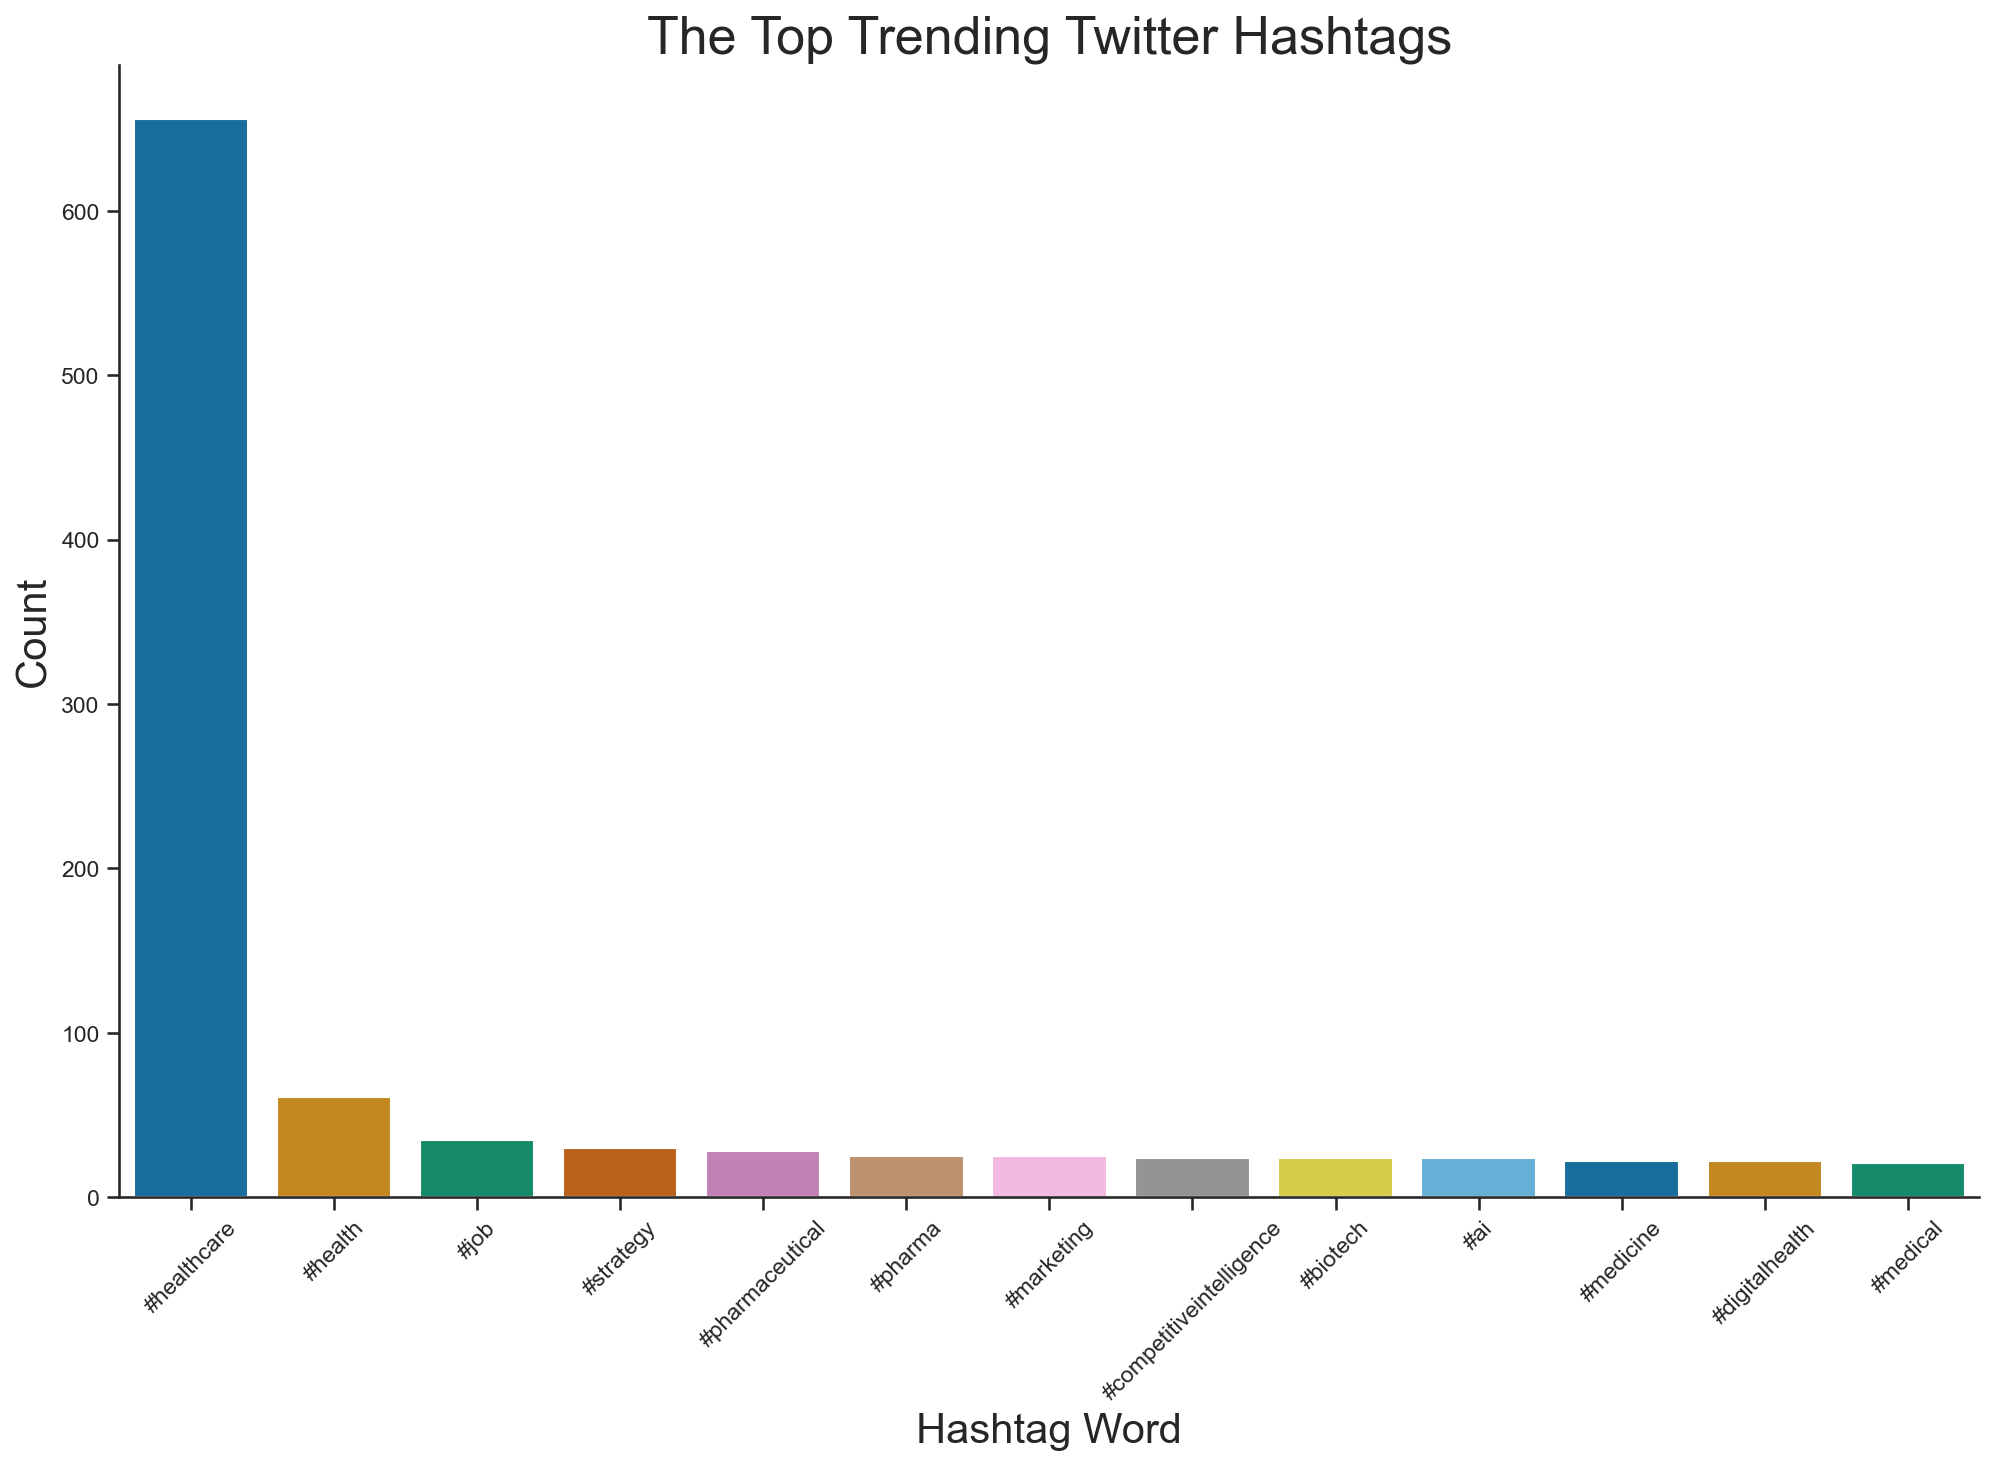

In [118]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Set figure size.
sns.set(rc = {'figure.figsize':(16, 10)})

# Create a bar plot.
sns.barplot(x = 'word', y = 'count',
            palette = 'colorblind',
            data = hashtags[hashtags['count'] > 20])

# Format figure attributes.
plt.title('The Top Trending Twitter Hashtags', fontsize = 25)
plt.xlabel('Hashtag Word', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 45)
sns.despine()
sns.set_style('white')

Although this chart clearly signifies that **#healthcare** is the most used hashtag, it would be beneficial to view the same chart excluding this particular hashtag so as to see how the other top hashtags fair more clearly.

In [119]:
# Create a new DataFrame excluding the #healthcare hashtag.
hashtags_new = hashtags[-(hashtags['word'] == '#healthcare')]

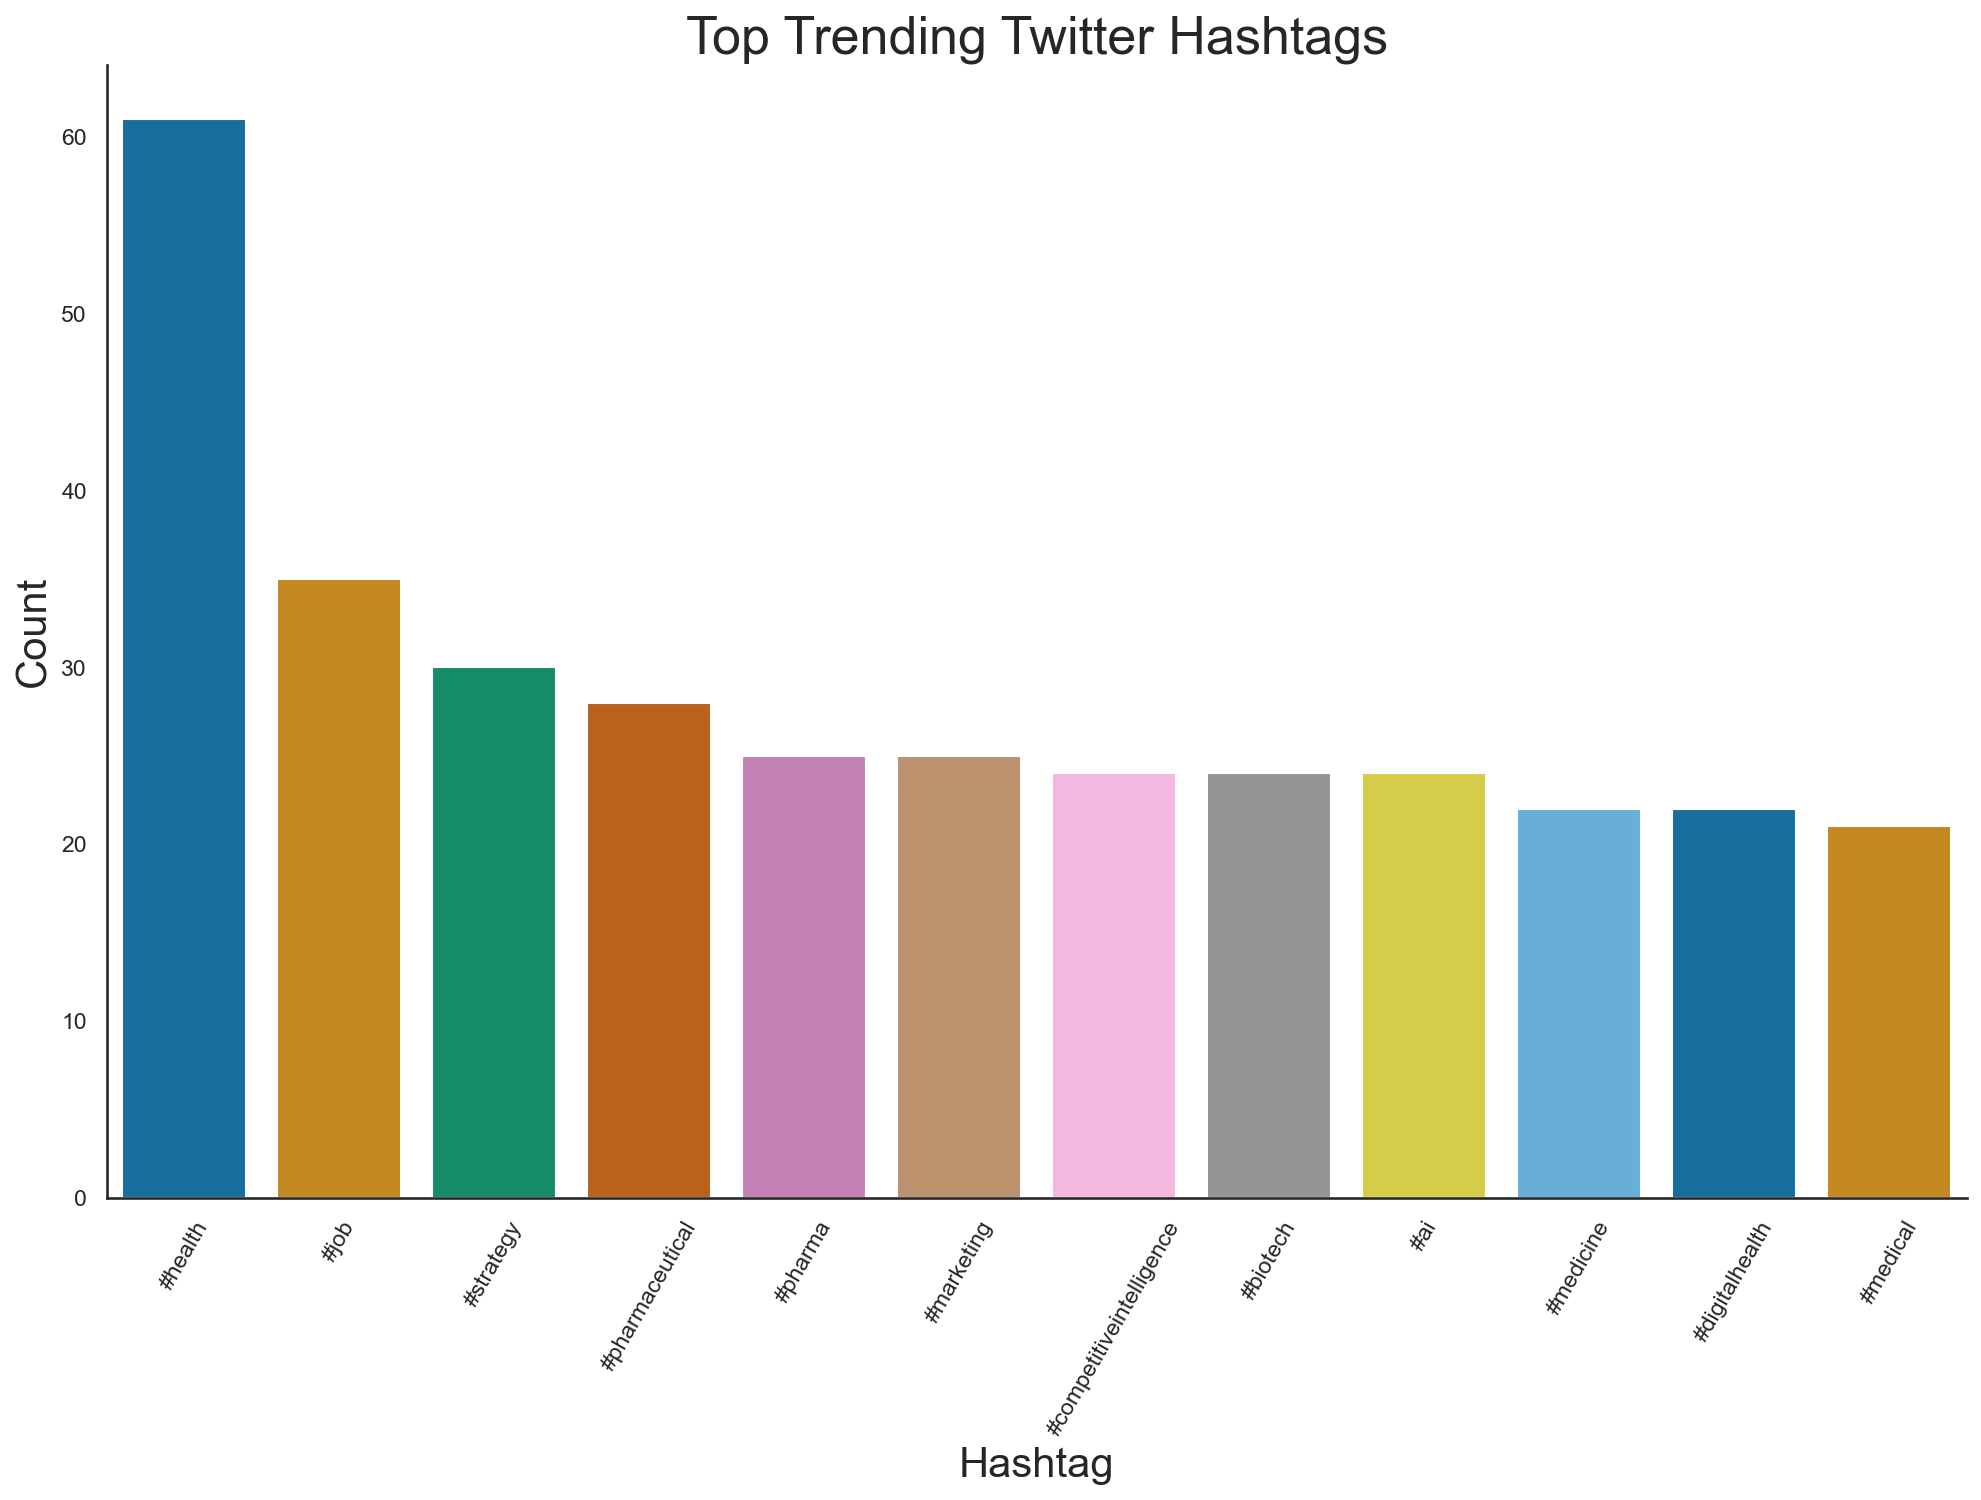

In [120]:
# Define figure.
fig, ax = plt.subplots(dpi = 150)

# Set figure size.
sns.set(rc = {'figure.figsize':(16, 10)})

# Create a bar plot.
sns.barplot(x = 'word', y = 'count',
            palette = 'colorblind',
            data = hashtags_new[hashtags_new['count'] > 20])
                            
# Format figure attributes.
plt.title('Top Trending Twitter Hashtags', fontsize = 25)
plt.xlabel('Hashtag', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 60)
sns.despine()
sns.set_style('white')

# <div align="center"> Summary of Findings

- The run-up to Christmas 2021 (**October - December**) and **March 2022** show to be the busiest periods for the NHS within the data provided.


- The locations with the highest number of appointments were:
   - **North West London** (n = 12142390)
   - **North East London** (n = 9588891)
   - **Kent and Medway** (n = 9286167)
   
   
- Throughout the datasets, most appointments occurred within:
   - The Service Setting of **General Practice**
   - The Context Type of **Care Related Encounter**
   - The National Category of **General Consultation Routine**
   
   
- The most utilised Healthcare Professional Type was **GP**.
   
   
- **Face-to-Face** appointments were favoured by patients for the most part, although during lockdowns, **Telephone** appointments rose signnificantly.


- Appointments with a shorter time between booking and the appointment saw greater fluctuation, particularly during busy periods.


- The change in resource allocation over time seemed to be influenced somewhat by the severity of Covid-19 in the UK and whether government-imposed lockdowns were in place.
   - I have included a link to a graphic detailing the UK's timeline during the peak of the Covid-19 pandemic which may be helpful to reference alongside looking at thee findings.
       - [UK Covid Timeline](https://www.instituteforgovernment.org.uk/sites/default/files/timeline-lockdown-web.pdf)


- I did not find sufficient data to accurately determine staff levels within the NHS and whether they were adequate.